In [1]:
!pip install pycaret

     |████████████████████████████████| 256kB 8.9MB/s 
     |████████████████████████████████| 102kB 8.2MB/s 
     |████████████████████████████████| 6.8MB 15.4MB/s 
     |████████████████████████████████| 276kB 45.0MB/s 
     |████████████████████████████████| 66.3MB 71kB/s 
     |████████████████████████████████| 1.8MB 44.3MB/s 
     |████████████████████████████████| 174kB 49.5MB/s 
     |████████████████████████████████| 148.9MB 86kB/s 
     |████████████████████████████████| 1.6MB 35.2MB/s 
     |████████████████████████████████| 13.9MB 35.6MB/s 
     |████████████████████████████████| 266kB 43.6MB/s 
     |████████████████████████████████| 2.1MB 40.4MB/s 
     |████████████████████████████████| 153kB 36.8MB/s 
     |████████████████████████████████| 81kB 7.2MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 337kB 38.7MB/s 
     |████████████████████████████████| 1.1MB 26.6MB/s 
     |████████████████████████████████| 163kB 40.5MB/s

In [2]:
from pycaret.classification import *

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
url = 'https://raw.githubusercontent.com/jjefferson2006/DSWP_JJ_altera/main/Notebooks/desafio_train.csv'
df_rec_trei = pd.read_csv(url)


In [5]:
url = 'https://raw.githubusercontent.com/jjefferson2006/DSWP_JJ_altera/main/Notebooks/desafio_test.csv'
df_rec_test= pd.read_csv(url)

In [6]:
df_rec_trei.head()

,id,cnae2,rf2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43,target
0,0,86,i,0.090339,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.009247,0.001729,0.000138,0.004412,0.0,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0000,0.00,0.00,0.0000,0.0000,0.0976,0.0333,0.1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,True
1,1,18,z,0.005996,0.019476,0.124770,0.000000,0.038168,0.0,0.029214,0.046445,0.000000,0.049919,0.0,0.149741,0.003186,0.007671,0.006943,0.003589,0.0,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.0,0.0,0.0856,0.0286,0.0,0.0,0.0,0.0,0.0,0.0,0.7625,1.00,1.00,0.1429,0.2857,0.0000,0.4444,0.2222,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,2,74,z,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000209,0.0,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,1.0000,1.00,1.00,1.0000,1.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,3,49,q,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.142568,0.000438,0.000000,0.000042,0.000115,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.25,0.25,0.9167,0.9167,0.7857,0.1667,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4,4,47,i,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.004829,0.006355,0.000719,0.0,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5,False


In [7]:
df_rec_test.head()

,id,cnae2,rf2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43
0,3411,71,s,0.017485,0.004743,0.111771,0.003121,0.003121,0.0,0.005432,0.023085,0.009890,0.011346,0.0,0.131320,0.000176,0.000000,1.442161e-09,0.000917,0.0,0.0326,0.0,1.0,1.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.75,0.75,1.0,1.0,0.0625,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2177,86,y,0.012269,0.005919,0.111803,0.001136,0.000000,0.0,0.006160,0.022035,0.001686,0.000000,0.0,0.132734,0.005597,0.004738,8.343705e-06,0.001462,0.0,0.0135,0.0,0.0,0.0,1.0,1.0000,1.0000,0.0,0.0,0.0,0.0293,0.5883,0.1016,0.0,0.0,0.0,0.0,0.0000,0.0000,1.00,0.00,0.0,0.0,0.0000,1.0000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8400,41,z,0.002325,0.001882,0.109870,0.000000,0.000000,0.0,0.002823,0.020522,0.000000,0.000000,0.0,0.131390,0.000206,0.000000,7.473043e-05,0.000659,0.0,0.0438,0.0,1.0,1.0,1.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,1.0000,1.0000,0.00,0.00,1.0,1.0,0.0000,1.0000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,464,58,z,0.022149,0.042115,0.143274,0.052107,0.005284,0.0,0.042115,0.056179,0.044911,0.004436,0.0,0.145176,0.003389,0.000693,1.104422e-03,0.003108,0.0,0.0000,0.0,0.0,0.0,0.0,0.4810,0.8654,0.0,0.0,0.0,0.3209,0.1926,0.0000,0.0,0.0,0.0,0.0,0.8694,0.9212,0.75,0.75,0.0,0.0,0.3091,0.1389,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6672,86,p,0.011190,0.004536,0.110678,0.002873,0.003131,0.0,0.004536,0.020658,0.003853,0.004202,0.0,0.130692,0.000763,0.000000,0.000000e+00,0.000387,0.0,0.0153,0.0,0.0,0.0,0.0,0.7799,0.7799,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,1.0000,0.00,0.00,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
'''df_rec_trei = pd.read_csv('desafio_train.csv')
df_rec_test = pd.read_csv('desafio_test.csv')

In [8]:
df_rec_trei.head()

,id,cnae2,rf2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43,target
0,0,86,i,0.090339,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.009247,0.001729,0.000138,0.004412,0.0,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0000,0.00,0.00,0.0000,0.0000,0.0976,0.0333,0.1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,True
1,1,18,z,0.005996,0.019476,0.124770,0.000000,0.038168,0.0,0.029214,0.046445,0.000000,0.049919,0.0,0.149741,0.003186,0.007671,0.006943,0.003589,0.0,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.0,0.0,0.0856,0.0286,0.0,0.0,0.0,0.0,0.0,0.0,0.7625,1.00,1.00,0.1429,0.2857,0.0000,0.4444,0.2222,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
2,2,74,z,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000209,0.0,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,1.0000,1.00,1.00,1.0000,1.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False
3,3,49,q,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.142568,0.000438,0.000000,0.000042,0.000115,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.25,0.25,0.9167,0.9167,0.7857,0.1667,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False
4,4,47,i,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.004829,0.006355,0.000719,0.0,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5,False


In [9]:
df_rec_test.head()

,id,cnae2,rf2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43
0,3411,71,s,0.017485,0.004743,0.111771,0.003121,0.003121,0.0,0.005432,0.023085,0.009890,0.011346,0.0,0.131320,0.000176,0.000000,1.442161e-09,0.000917,0.0,0.0326,0.0,1.0,1.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,0.0000,0.75,0.75,1.0,1.0,0.0625,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2177,86,y,0.012269,0.005919,0.111803,0.001136,0.000000,0.0,0.006160,0.022035,0.001686,0.000000,0.0,0.132734,0.005597,0.004738,8.343705e-06,0.001462,0.0,0.0135,0.0,0.0,0.0,1.0,1.0000,1.0000,0.0,0.0,0.0,0.0293,0.5883,0.1016,0.0,0.0,0.0,0.0,0.0000,0.0000,1.00,0.00,0.0,0.0,0.0000,1.0000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8400,41,z,0.002325,0.001882,0.109870,0.000000,0.000000,0.0,0.002823,0.020522,0.000000,0.000000,0.0,0.131390,0.000206,0.000000,7.473043e-05,0.000659,0.0,0.0438,0.0,1.0,1.0,1.0,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,1.0000,1.0000,0.00,0.00,1.0,1.0,0.0000,1.0000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,464,58,z,0.022149,0.042115,0.143274,0.052107,0.005284,0.0,0.042115,0.056179,0.044911,0.004436,0.0,0.145176,0.003389,0.000693,1.104422e-03,0.003108,0.0,0.0000,0.0,0.0,0.0,0.0,0.4810,0.8654,0.0,0.0,0.0,0.3209,0.1926,0.0000,0.0,0.0,0.0,0.0,0.8694,0.9212,0.75,0.75,0.0,0.0,0.3091,0.1389,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6672,86,p,0.011190,0.004536,0.110678,0.002873,0.003131,0.0,0.004536,0.020658,0.003853,0.004202,0.0,0.130692,0.000763,0.000000,0.000000e+00,0.000387,0.0,0.0153,0.0,0.0,0.0,0.0,0.7799,0.7799,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0000,1.0000,0.00,0.00,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df_rec_trei.shape

(11033, 63)

In [11]:
df_rec_test.shape

(1000, 62)

In [12]:
df_rec_trei[['target']].count()


target    11033
dtype: int64

In [13]:
#verificando os tipos
df_rec_trei.dtypes

id          int64
cnae2       int64
rf2        object
md1       float64
md2       float64
md3       float64
md4       float64
md5       float64
md6       float64
md7       float64
md8       float64
md9       float64
md10      float64
md11      float64
md12      float64
mc1       float64
mc2       float64
mc3       float64
mc4       float64
ind01     float64
ind02     float64
ind03     float64
ind04     float64
ind05     float64
ind06     float64
ind07     float64
ind08     float64
ind09     float64
ind10     float64
ind11     float64
ind12     float64
ind13     float64
ind14     float64
ind15     float64
ind16     float64
ind17     float64
ind18     float64
ind19     float64
ind20     float64
ind21     float64
ind22     float64
ind23     float64
ind24     float64
ind25     float64
ind26     float64
ind27     float64
ind28     float64
ind29     float64
ind30     float64
ind31     float64
ind32     float64
ind33     float64
ind34     float64
ind35     float64
ind36     float64
ind37     

In [14]:
df_rec_trei.columns

Index(['id', 'cnae2', 'rf2', 'md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7',
       'md8', 'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4',
       'ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20', 'ind21', 'ind22', 'ind23', 'ind24',
       'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32',
       'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40',
       'ind41', 'ind42', 'ind43', 'target'],
      dtype='object')

In [15]:
#função mostra isna

def mostra_isna(df):
    l_rec_trei = df.columns
    d = 0
    for i in l_rec_trei:
        f = df[i].isna().sum()
        g = df[i].dtypes
        if f != 0:
            d = d + 1
            print('{} = {}: {}'.format(i, df[i].isna().sum(),g))
    print('qt de colunas con isna:{}'.format(d))
    
    

In [16]:
#função mostra sem isna
def mostra_sem_isna(df):
    l_rec_trei = df.columns
    d = 0
    for i in l_rec_trei:
        f = df[i].isna().sum()
        g = df[i].dtypes
        if f == 0:
            d = d + 1
            print('{} = {}: {}'.format(i, df[i].isna().sum(), g))
    print('qt de colunas con isna:{}'.format(d))
    

    

check no df de teste

In [17]:
mostra_sem_isna(df_rec_test)

id = 0: int64
cnae2 = 0: int64
rf2 = 0: object
md1 = 0: float64
md2 = 0: float64
md3 = 0: float64
md4 = 0: float64
md5 = 0: float64
md6 = 0: float64
md7 = 0: float64
md8 = 0: float64
md9 = 0: float64
md10 = 0: float64
md11 = 0: float64
md12 = 0: float64
mc4 = 0: float64
qt de colunas con isna:16


In [18]:
mostra_isna(df_rec_test)

mc1 = 45: float64
mc2 = 45: float64
mc3 = 45: float64
ind01 = 4: float64
ind02 = 4: float64
ind03 = 4: float64
ind04 = 4: float64
ind05 = 4: float64
ind06 = 4: float64
ind07 = 4: float64
ind08 = 4: float64
ind09 = 4: float64
ind10 = 4: float64
ind11 = 4: float64
ind12 = 4: float64
ind13 = 4: float64
ind14 = 4: float64
ind15 = 4: float64
ind16 = 4: float64
ind17 = 4: float64
ind18 = 4: float64
ind19 = 4: float64
ind20 = 4: float64
ind21 = 43: float64
ind22 = 43: float64
ind23 = 43: float64
ind24 = 43: float64
ind25 = 43: float64
ind26 = 43: float64
ind27 = 43: float64
ind28 = 4: float64
ind29 = 4: float64
ind30 = 4: float64
ind31 = 4: float64
ind32 = 4: float64
ind33 = 4: float64
ind34 = 4: float64
ind35 = 4: float64
ind36 = 4: float64
ind37 = 4: float64
ind38 = 43: float64
ind39 = 43: float64
ind40 = 4: float64
ind41 = 4: float64
ind42 = 43: float64
ind43 = 43: float64
qt de colunas con isna:46


Inicio do tratamento do df de treino

In [19]:
#16 coluna sem isna
mostra_sem_isna(df_rec_trei)

id = 0: int64
cnae2 = 0: int64
rf2 = 0: object
md1 = 0: float64
md2 = 0: float64
md3 = 0: float64
md4 = 0: float64
md5 = 0: float64
md6 = 0: float64
md7 = 0: float64
md8 = 0: float64
md9 = 0: float64
md10 = 0: float64
md11 = 0: float64
md12 = 0: float64
mc4 = 0: float64
target = 0: bool
qt de colunas con isna:17


In [20]:
#46 colunas com isna
mostra_isna(df_rec_trei)

mc1 = 602: float64
mc2 = 602: float64
mc3 = 602: float64
ind01 = 34: float64
ind02 = 34: float64
ind03 = 34: float64
ind04 = 34: float64
ind05 = 34: float64
ind06 = 34: float64
ind07 = 34: float64
ind08 = 34: float64
ind09 = 34: float64
ind10 = 34: float64
ind11 = 34: float64
ind12 = 34: float64
ind13 = 34: float64
ind14 = 34: float64
ind15 = 34: float64
ind16 = 34: float64
ind17 = 34: float64
ind18 = 34: float64
ind19 = 34: float64
ind20 = 34: float64
ind21 = 599: float64
ind22 = 599: float64
ind23 = 599: float64
ind24 = 599: float64
ind25 = 599: float64
ind26 = 599: float64
ind27 = 599: float64
ind28 = 34: float64
ind29 = 34: float64
ind30 = 34: float64
ind31 = 34: float64
ind32 = 34: float64
ind33 = 34: float64
ind34 = 34: float64
ind35 = 34: float64
ind36 = 34: float64
ind37 = 34: float64
ind38 = 599: float64
ind39 = 599: float64
ind40 = 34: float64
ind41 = 34: float64
ind42 = 599: float64
ind43 = 599: float64
qt de colunas con isna:46


In [21]:
#converte a target para True = 1 e False = 0
df_rec_trei['target_c'] = df_rec_trei[['target']].astype(int)

In [22]:
df_rec_trei.head()

,id,cnae2,rf2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43,target,target_c
0,0,86,i,0.090339,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.009247,0.001729,0.000138,0.004412,0.0,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0000,0.00,0.00,0.0000,0.0000,0.0976,0.0333,0.1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,True,1
1,1,18,z,0.005996,0.019476,0.124770,0.000000,0.038168,0.0,0.029214,0.046445,0.000000,0.049919,0.0,0.149741,0.003186,0.007671,0.006943,0.003589,0.0,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.0,0.0,0.0856,0.0286,0.0,0.0,0.0,0.0,0.0,0.0,0.7625,1.00,1.00,0.1429,0.2857,0.0000,0.4444,0.2222,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0
2,2,74,z,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000209,0.0,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,1.0000,1.00,1.00,1.0000,1.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0
3,3,49,q,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.142568,0.000438,0.000000,0.000042,0.000115,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.25,0.25,0.9167,0.9167,0.7857,0.1667,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0
4,4,47,i,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.004829,0.006355,0.000719,0.0,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5,False,0


###ANALISE DA TARGET

In [23]:
#somente para contragem
df2 = df_rec_trei[['target_c']]

In [24]:
df2.value_counts()

target_c
0           8513
1           2520
dtype: int64

In [25]:
a = df2.value_counts()
b = df2.value_counts()[0]/df2.shape[0]
c = df2.value_counts()[1]/df2.shape[0]
d = df2.shape[0]
print('Elementos:\n{}, Qtd:\n{}, percentual:\n{}, percentual:\n{}'.format(a,d,b,c))




Elementos:
target_c
0           8513
1           2520
dtype: int64, Qtd:
11033, percentual:
target_c
0           0.771594
dtype: float64, percentual:
target_c
1           0.228406
dtype: float64


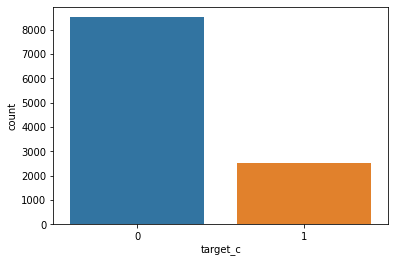

In [26]:
sns.countplot( x = 'target_c', data = df2)

In [27]:
df_rec_trei.columns

Index(['id', 'cnae2', 'rf2', 'md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7',
       'md8', 'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4',
       'ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20', 'ind21', 'ind22', 'ind23', 'ind24',
       'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32',
       'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40',
       'ind41', 'ind42', 'ind43', 'target', 'target_c'],
      dtype='object')

In [28]:
#elimina target_c
df_rec_trei['target'] = df2['target_c'].copy()
df_rec_trei.drop(columns = 'target_c', inplace = True)

In [29]:
df_rec_trei.head()

,id,cnae2,rf2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43,target
0,0,86,i,0.090339,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.009247,0.001729,0.000138,0.004412,0.0,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0000,0.00,0.00,0.0000,0.0000,0.0976,0.0333,0.1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,18,z,0.005996,0.019476,0.124770,0.000000,0.038168,0.0,0.029214,0.046445,0.000000,0.049919,0.0,0.149741,0.003186,0.007671,0.006943,0.003589,0.0,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.0,0.0,0.0856,0.0286,0.0,0.0,0.0,0.0,0.0,0.0,0.7625,1.00,1.00,0.1429,0.2857,0.0000,0.4444,0.2222,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,74,z,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000209,0.0,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,1.0000,1.00,1.00,1.0000,1.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,49,q,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.142568,0.000438,0.000000,0.000042,0.000115,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.25,0.25,0.9167,0.9167,0.7857,0.1667,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,47,i,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.004829,0.006355,0.000719,0.0,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5,0


In [30]:
df_rec_trei.columns

Index(['id', 'cnae2', 'rf2', 'md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7',
       'md8', 'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4',
       'ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20', 'ind21', 'ind22', 'ind23', 'ind24',
       'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32',
       'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40',
       'ind41', 'ind42', 'ind43', 'target'],
      dtype='object')

In [31]:
l_rec_trei_ind01_18 = ['ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18']
l_rec_trei_ind21_43 =[ 'ind21', 'ind22', 'ind23', 'ind24',
       'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32',
       'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40',
       'ind41', 'ind42', 'ind43']

In [32]:
l_rec_trei_ind19_20 = ['ind19', 'ind20']

In [33]:
df4 = df_rec_trei[['md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7', 'md8', 'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4','ind21', 'ind22', 'ind23', 'ind24',
                'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32', 'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40',
                'ind41', 'ind42', 'ind43']]

In [34]:
df3 = df_rec_trei[['ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20']]

In [35]:
df3.describe()

,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,0.106722,0.157427,0.346646,0.364934,0.378858,0.397906,0.305112,0.355596,0.007454,0.001375,0.001093,0.141280,0.170552,0.034556,0.019556,0.003789,0.014774,0.004045,0.694791,0.700189
std,0.305922,0.315114,0.470182,0.451587,0.449015,0.473002,0.430549,0.440732,0.069064,0.031814,0.029262,0.312289,0.322844,0.161135,0.129848,0.059799,0.118014,0.062567,0.452090,0.450725
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.083300,0.021900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,0.000000,0.083300,1.000000,1.000000,1.000000,1.000000,0.862600,0.932700,0.000000,0.000000,0.000000,0.000000,0.140800,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
df4.describe()

,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43
count,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,11033.000000,10431.000000,10431.000000,1.043100e+04,11033.000000,10434.000000,10434.000000,10434.000000,10434.000000,10434.000000,10434.000000,10434.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10434.000000,10434.000000,10999.000000,10999.000000,10434.000000,10434.000000
mean,0.011670,0.012928,0.118267,0.013958,0.009200,0.002148,0.015685,0.032194,0.016977,0.011375,0.001760,0.134558,0.002397,0.001699,2.752463e-03,0.001772,0.544750,0.538172,0.339573,0.333567,0.099865,0.570295,0.550792,0.005119,0.000509,0.000405,0.331121,0.367397,0.999182,0.489044,0.910992,0.729703,0.659605,0.005080,0.134177,0.000273,0.000091,0.170692,0.090905
std,0.041618,0.026515,0.021673,0.039367,0.036248,0.025318,0.029024,0.027332,0.041373,0.037942,0.021472,0.014230,0.012884,0.012619,1.366601e-02,0.007012,0.455767,0.457155,0.433901,0.434164,0.221941,0.425365,0.412976,0.060052,0.013340,0.018207,0.470638,0.482118,0.028595,0.499903,0.284768,0.444134,0.473863,0.071093,0.340858,0.016514,0.009535,0.376258,0.206764
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000003,0.002422,0.110077,0.000000,0.000000,0.000000,0.003157,0.020645,0.000012,0.000000,0.000000,0.130696,0.000086,0.000000,8.487921e-07,0.000064,0.000000,0.000000,0.000000,0.000000,0.000000,0.083300,0.111100,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000316,0.005415,0.112034,0.002529,0.000033,0.000000,0.006990,0.024210,0.004691,0.000191,0.000000,0.131464,0.000463,0.000000,9.110001e-05,0.000362,0.750000,0.583300,0.083300,0.083300,0.000000,0.625000,0.527800,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.006035,0.012740,0.117903,0.011236,0.004189,0.000000,0.016366,0.032773,0.016200,0.007306,0.000000,0.133893,0.001739,0.000000,1.412918e-03,0.001370,1.000000,1.000000,1.000000,1.000000,0.082200,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.956422,0.956422,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.380920,1.000000e+00,0.394075,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.350000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
for i in l_rec_trei_ind01_18:
    print(f'coluna: {i}')
    print(f'media: {df_rec_trei[i].mean()}')
    print(f'mediana: {df_rec_trei[i].median()}')
    print(f'mode: {df_rec_trei[i].mode()}')  
    print(f'+++++++++++')

coluna: ind01
media: 0.10672176561505593
mediana: 0.0
mode: 0    0.0
dtype: float64
+++++++++++
coluna: ind02
media: 0.1574273570324579
mediana: 0.0
mode: 0    0.0
dtype: float64
+++++++++++
coluna: ind03
media: 0.34664564051277375
mediana: 0.0
mode: 0    0.0
dtype: float64
+++++++++++
coluna: ind04
media: 0.3649340849168092
mediana: 0.0
mode: 0    0.0
dtype: float64
+++++++++++
coluna: ind05
media: 0.37885800527320646
mediana: 0.08330000000000004
mode: 0    0.0
dtype: float64
+++++++++++
coluna: ind06
media: 0.3979063005727785
mediana: 0.02190000000000003
mode: 0    0.0
dtype: float64
+++++++++++
coluna: ind07
media: 0.3051118647149747
mediana: 0.0
mode: 0    0.0
dtype: float64
+++++++++++
coluna: ind08
media: 0.35559614510410076
mediana: 0.0
mode: 0    0.0
dtype: float64
+++++++++++
coluna: ind09
media: 0.0074536866987908
mediana: 0.0
mode: 0    0.0
dtype: float64
+++++++++++
coluna: ind10
media: 0.0013754614055823255
mediana: 0.0
mode: 0    0.0
dtype: float64
+++++++++++
coluna: ind

In [ ]:
#verificar como substituir
'''for i in l_rec_trei_ind01_20:
    if df_rec_trei[i].mode() == df_rec_trei[i].median():
        for j in l_index_trein:
            df_rec_trei[i][j] = df_rec_trei[i].median()
    else:
       for j in l_index_trein:
           df_rec_trei[i][j] = df_rec_trei[i].mode()  
            
                 
        
        
    

SyntaxError: ignored

In [39]:
#opção de substituir tudo pela moda dos ind01 a ind18

for i in l_rec_trei_ind01_18:
    df_rec_trei[i].fillna(0.0, inplace=True)

In [40]:
#opção de substituir tudo pela moda dos ind19 e ind20

for i in l_rec_trei_ind19_20:
    df_rec_trei[i].fillna(1.0, inplace=True)

In [41]:
mostra_isna(df_rec_trei)

mc1 = 602: float64
mc2 = 602: float64
mc3 = 602: float64
ind21 = 599: float64
ind22 = 599: float64
ind23 = 599: float64
ind24 = 599: float64
ind25 = 599: float64
ind26 = 599: float64
ind27 = 599: float64
ind28 = 34: float64
ind29 = 34: float64
ind30 = 34: float64
ind31 = 34: float64
ind32 = 34: float64
ind33 = 34: float64
ind34 = 34: float64
ind35 = 34: float64
ind36 = 34: float64
ind37 = 34: float64
ind38 = 599: float64
ind39 = 599: float64
ind40 = 34: float64
ind41 = 34: float64
ind42 = 599: float64
ind43 = 599: float64
qt de colunas con isna:26


In [42]:
for i in l_rec_trei_ind21_43:
    print(f'coluna: {i}')
    print(f'media: {df_rec_trei[i].mean()}')
    print(f'mediana: {df_rec_trei[i].median()}')
    print(f'mode: {df_rec_trei[i].mode()}')  
    print(f'+++++++++++')

coluna: ind21
media: 0.5447495112133408
mediana: 0.75
mode: 0    1.0
dtype: float64
+++++++++++
coluna: ind22
media: 0.538171592869465
mediana: 0.5832999999999999
mode: 0    1.0
dtype: float64
+++++++++++
coluna: ind23
media: 0.3395732413264279
mediana: 0.08330000000000004
mode: 0    0.0
dtype: float64
+++++++++++
coluna: ind24
media: 0.3335665516580365
mediana: 0.08330000000000004
mode: 0    0.0
dtype: float64
+++++++++++
coluna: ind25
media: 0.09986512363427293
mediana: 0.0
mode: 0    0.0
dtype: float64
+++++++++++
coluna: ind26
media: 0.5702950067088368
mediana: 0.625
mode: 0    1.0
dtype: float64
+++++++++++
coluna: ind27
media: 0.5507915181138615
mediana: 0.5278
mode: 0    1.0
dtype: float64
+++++++++++
coluna: ind28
media: 0.005118647149740889
mediana: 0.0
mode: 0    0.0
dtype: float64
+++++++++++
coluna: ind29
media: 0.0005091371942903899
mediana: 0.0
mode: 0    0.0
dtype: float64
+++++++++++
coluna: ind30
media: 0.00040458223474861346
mediana: 0.0
mode: 0    0.0
dtype: float64


l_rec_trei_ind21_43 =[ 'ind21', 'ind22', 'ind23', 'ind24',
       'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32',
       'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40',
       'ind41', 'ind42', 'ind43']

In [43]:
l_moda_um = ['ind21','ind22','ind26','ind27','ind33','ind35','ind36','ind37']
for i in l_moda_um:
    df_rec_trei[i].fillna(1.0, inplace=True)




In [ ]:
'''l_moda_zero = ['ind23','ind24','ind25','ind28','ind29','ind30','ind31','ind32','ind34','ind38','ind39','ind40','ind41','ind42','ind43']
for d in l_moda_zero:
    df_rec_trei[i].fillna(0.0, inplace=True)

In [45]:
l_mc = ['mc1', 'mc2', 'mc3']

for i in l_mc:
    print(f'coluna: {i}')
    print(f'media: {df_rec_trei[i].mean()}')
    print(f'mediana: {df_rec_trei[i].median()}')
    print(f'mode: {df_rec_trei[i].mode()}')  
    print(f'+++++++++++')

coluna: mc1
media: 0.00239746984913156
mediana: 0.00046299326957024815
mode: 0    0.0
dtype: float64
+++++++++++
coluna: mc2
media: 0.0016992450123112797
mediana: 0.0
mode: 0    0.0
dtype: float64
+++++++++++
coluna: mc3
media: 0.0027524626896398654
mediana: 9.110000506142275e-05
mode: 0    0.0
dtype: float64
+++++++++++


In [46]:
mostra_isna(df_rec_trei)

mc1 = 602: float64
mc2 = 602: float64
mc3 = 602: float64
ind23 = 599: float64
ind24 = 599: float64
ind25 = 599: float64
ind28 = 34: float64
ind29 = 34: float64
ind30 = 34: float64
ind31 = 34: float64
ind32 = 34: float64
ind34 = 34: float64
ind38 = 599: float64
ind39 = 599: float64
ind40 = 34: float64
ind41 = 34: float64
ind42 = 599: float64
ind43 = 599: float64
qt de colunas con isna:18


In [47]:
df_rec_trei['mc1'].fillna(0.0, inplace=True)
df_rec_trei['mc2'].fillna(0.0, inplace=True)
df_rec_trei['mc3'].fillna(0.0, inplace=True)
df_rec_trei['ind23'].fillna(0.0, inplace=True)
df_rec_trei['ind24'].fillna(0.0, inplace=True)
df_rec_trei['ind25'].fillna(0.0, inplace=True)
df_rec_trei['ind28'].fillna(0.0, inplace=True)
df_rec_trei['ind29'].fillna(0.0, inplace=True)
df_rec_trei['ind30'].fillna(0.0, inplace=True)
df_rec_trei['ind31'].fillna(0.0, inplace=True)
df_rec_trei['ind32'].fillna(0.0, inplace=True)
df_rec_trei['ind34'].fillna(0.0, inplace=True)
df_rec_trei['ind38'].fillna(0.0, inplace=True)
df_rec_trei['ind39'].fillna(0.0, inplace=True)
df_rec_trei['ind40'].fillna(0.0, inplace=True)
df_rec_trei['ind41'].fillna(0.0, inplace=True)
df_rec_trei['ind42'].fillna(0.0, inplace=True)
df_rec_trei['ind43'].fillna(0.0, inplace=True)

In [48]:
mostra_isna(df_rec_trei)

qt de colunas con isna:0


In [49]:
df_rec_trei['ind43'].isna().sum()

0

In [50]:
#tratado de missiing
df_rec_trei.head()

,id,cnae2,rf2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43,target
0,0,86,i,0.090339,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.009247,0.001729,0.000138,0.004412,0.0,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0000,0.00,0.00,0.0000,0.0000,0.0976,0.0333,0.1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,1,18,z,0.005996,0.019476,0.124770,0.000000,0.038168,0.0,0.029214,0.046445,0.000000,0.049919,0.0,0.149741,0.003186,0.007671,0.006943,0.003589,0.0,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.0,0.0,0.0856,0.0286,0.0,0.0,0.0,0.0,0.0,0.0,0.7625,1.00,1.00,0.1429,0.2857,0.0000,0.4444,0.2222,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,74,z,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000209,0.0,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,1.0000,1.00,1.00,1.0000,1.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,49,q,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.142568,0.000438,0.000000,0.000042,0.000115,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.25,0.25,0.9167,0.9167,0.7857,0.1667,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,47,i,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.004829,0.006355,0.000719,0.0,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5,0


In [ ]:
#df_rec_trei[['tenure']].plot(kind = 'box', showmeans = True, meanline = True, grid = True, figsize = (12,8), vert = False, ylabel = 'Features')

In [51]:
df_rec_trei.shape

(11033, 63)

In [52]:
#copia do df_trei sme missing
df_rec_trei_sem_miss = df_rec_trei.copy()

###TRATANDO  OUT

In [53]:
import pandas as pd
import numpy as np
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from sklearn.ensemble import IsolationForest

# Scaling variables
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#from pyod.models.abod import ABOD
#from pyod.models.cblof import CBLOF

#from pyod.models.feature_bagging import FeatureBagging
#from pyod.models.hbos import HBOS
#from pyod.models.iforest import IForest
#from pyod.models.knn import KNN
#from pyod.models.lof import LOF
from scipy import stats

# remove warnings to keep notebook clean
import warnings
warnings.filterwarnings('ignore')

In [54]:
l_rec_trei_ind01_18 = ['ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18']

In [55]:
l_rec_trei_ind19_20 = ['ind19', 'ind20']

In [56]:
l_rec_trei_ind01_20 = ['ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20']

In [57]:
df_rec_trei.columns

Index(['id', 'cnae2', 'rf2', 'md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7',
       'md8', 'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4',
       'ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20', 'ind21', 'ind22', 'ind23', 'ind24',
       'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32',
       'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40',
       'ind41', 'ind42', 'ind43', 'target'],
      dtype='object')

In [58]:
l_lista_geral = ['md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7',
       'md8', 'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4',
       'ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20', 'ind21', 'ind22', 'ind23', 'ind24',
       'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32',
       'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40',
       'ind41', 'ind42', 'ind43']

In [ ]:
'''l_val =[]
for i in l_test:
    d = df_rec_trei[h].value_counts()[df_rec_trei[h].max()]/df2.shape[0]
    l_val.append(d)
    e =df_rec_trei[h].value_counts()[df_rec_trei[h].min()]/df2.shape[0]
    l_val.append(e)

In [ ]:
l_div = [['md1', 'md2', 'md3', 'md4', 'md5', 'md6'],['md7',
       'md8', 'md9', 'md10', 'md11', 'md12'],['mc1', 'mc2', 'mc3', 'mc4',
       'ind01', 'ind02'],['ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08'],
       ['ind15', 'ind16','ind17', 'ind18', 'ind19', 'ind20'],['ind21', 'ind22', 'ind23', 'ind24',
       'ind25', 'ind26'],['ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32'],
       ['ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38'],['ind39', 'ind40',
       'ind41', 'ind42', 'ind43']]

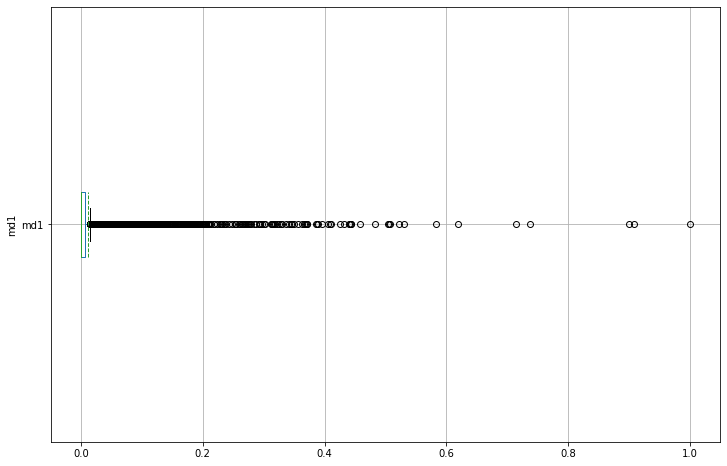

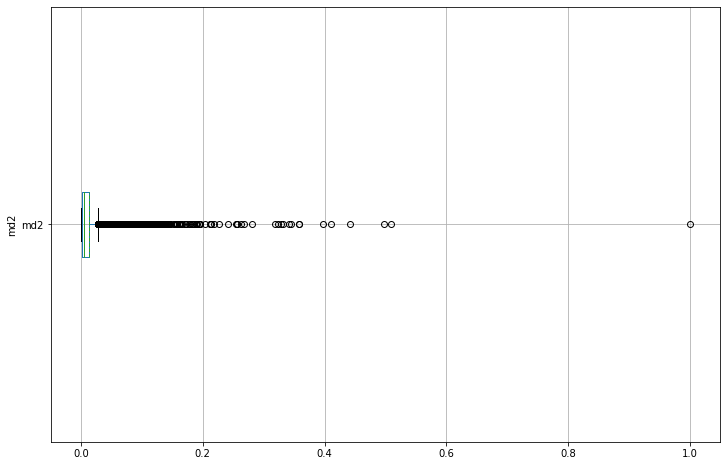

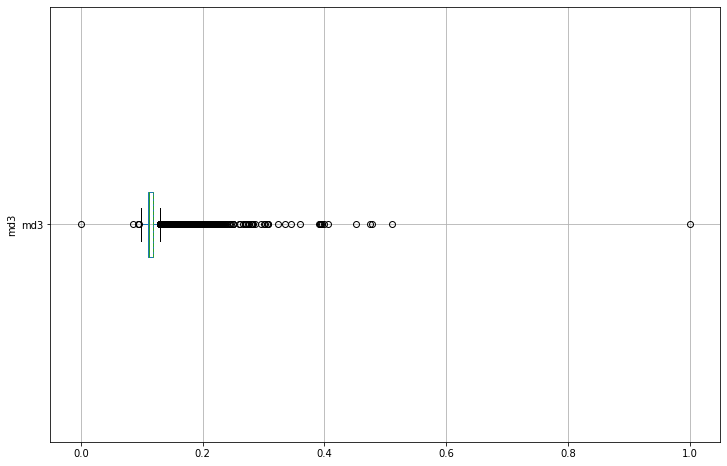

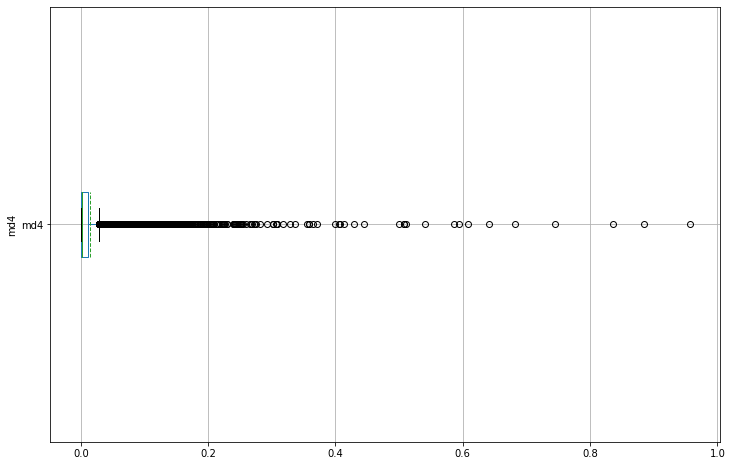

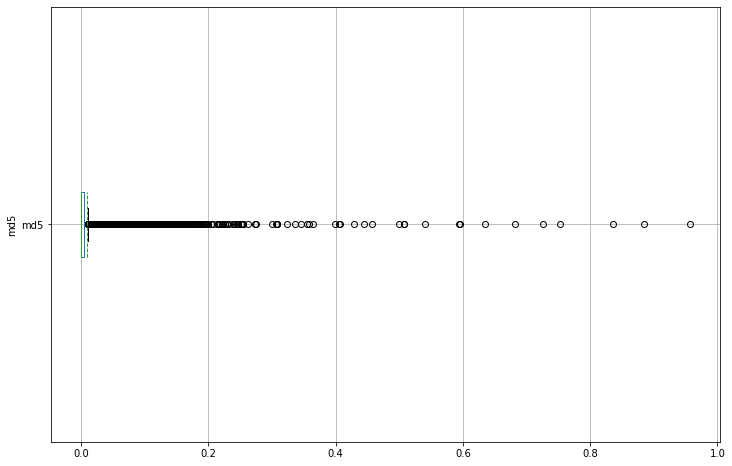

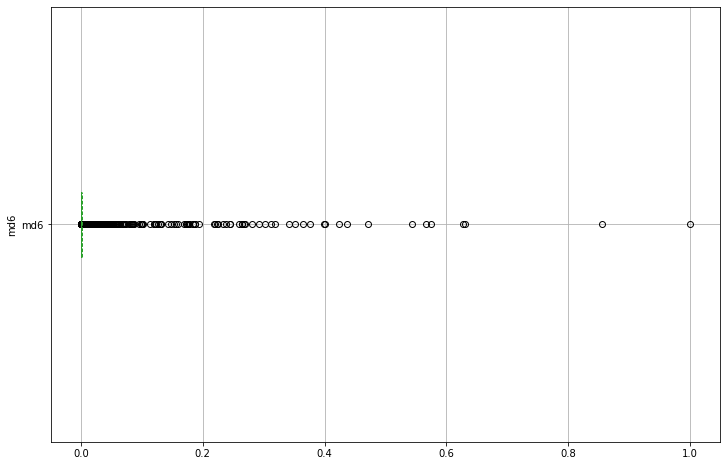

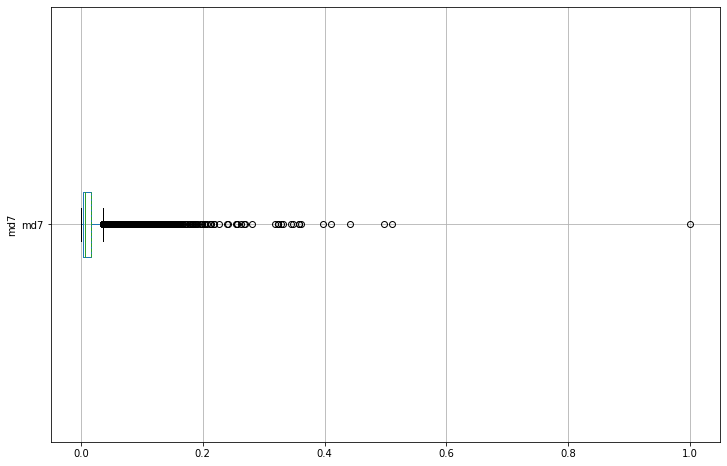

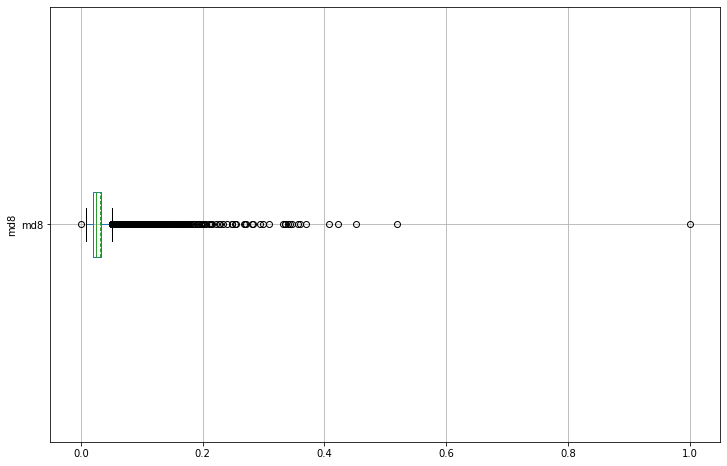

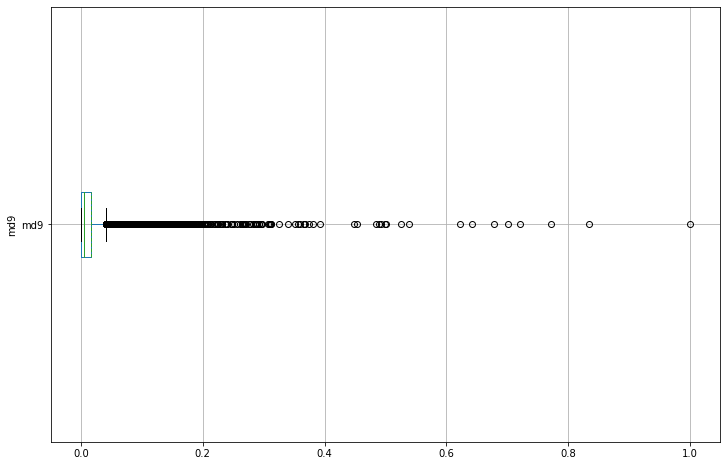

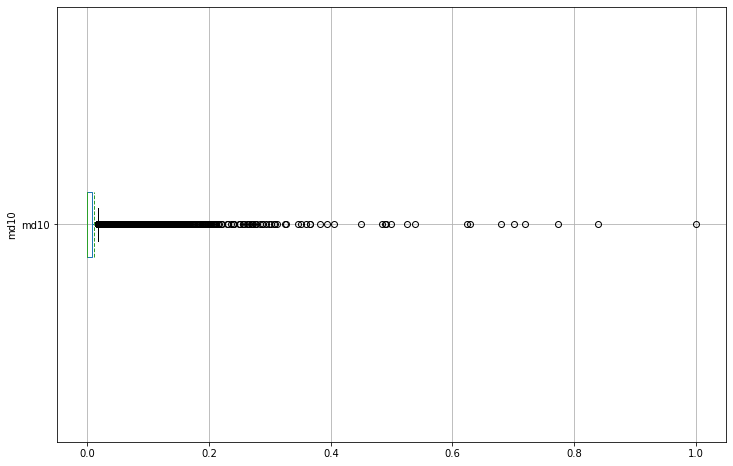

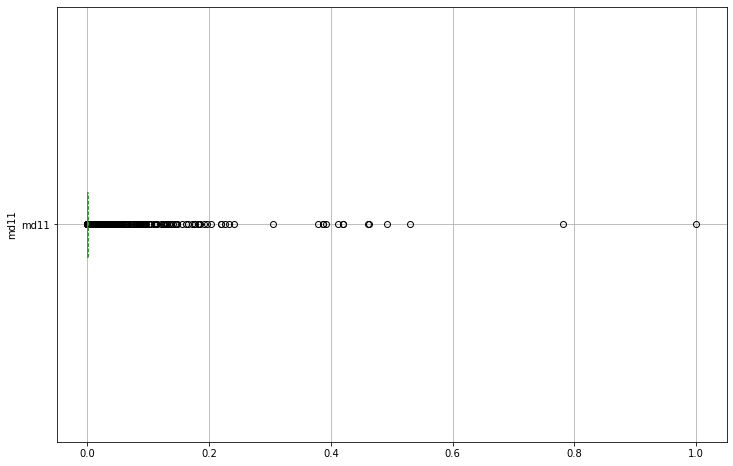

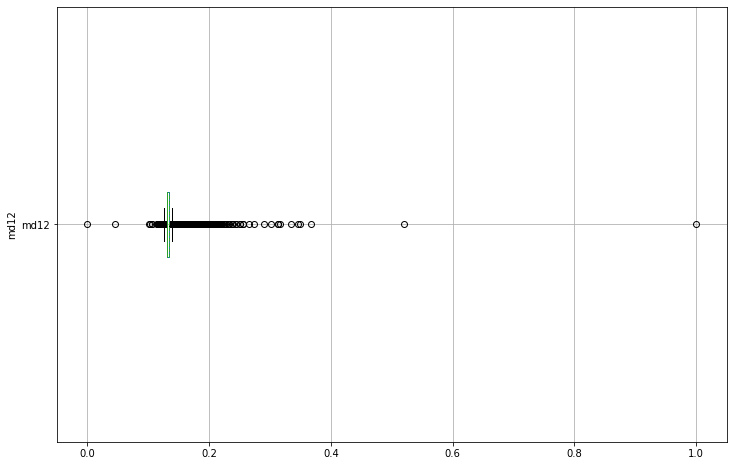

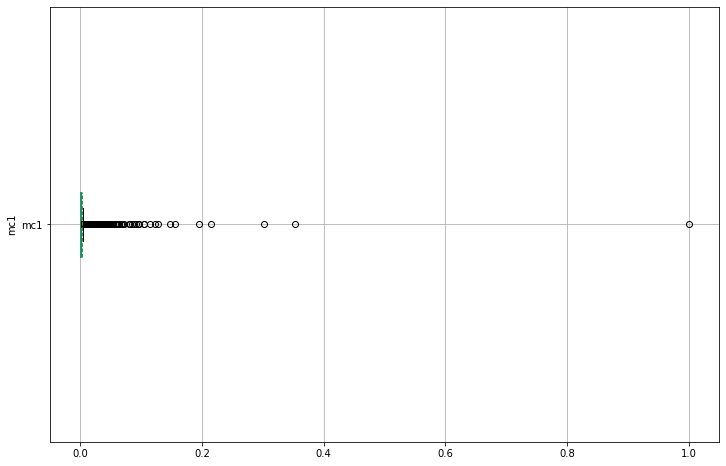

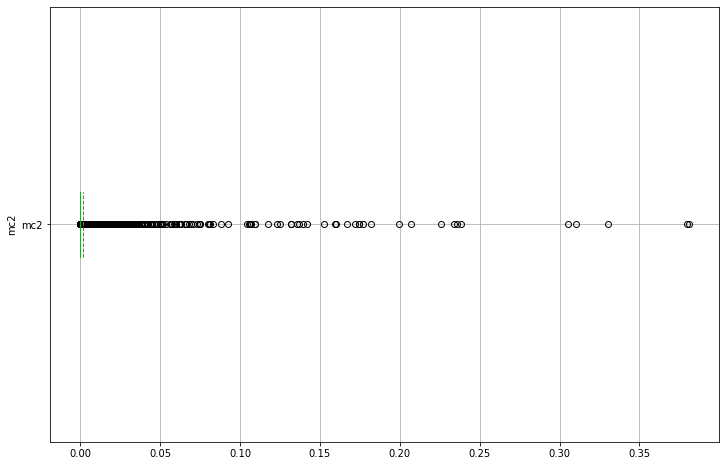

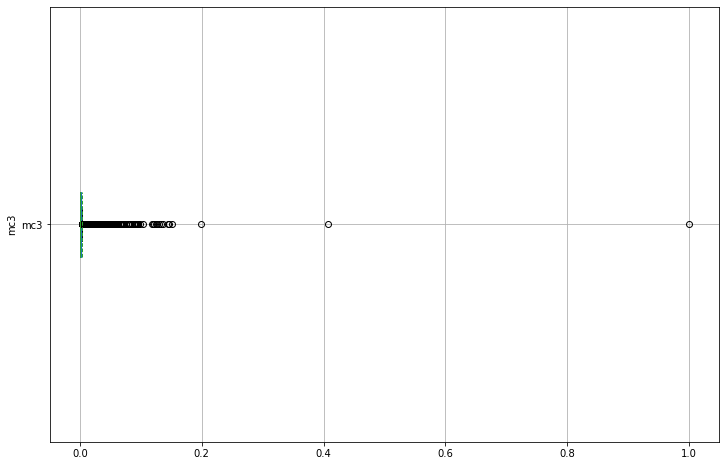

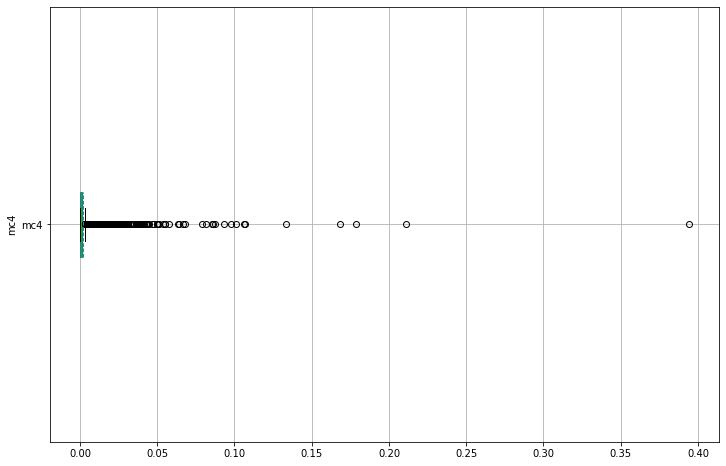

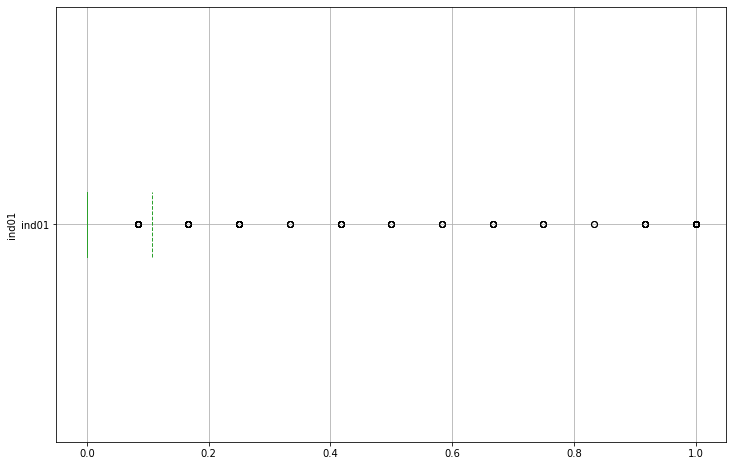

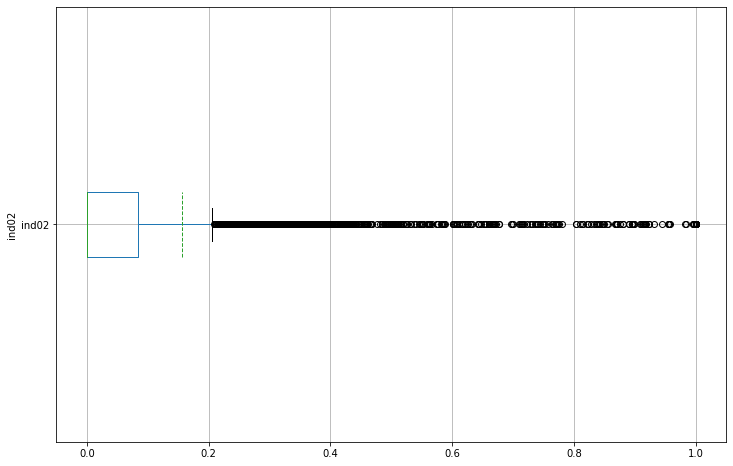

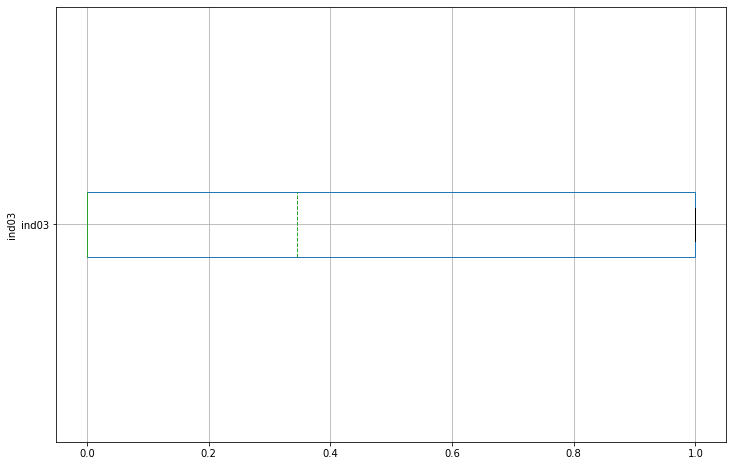

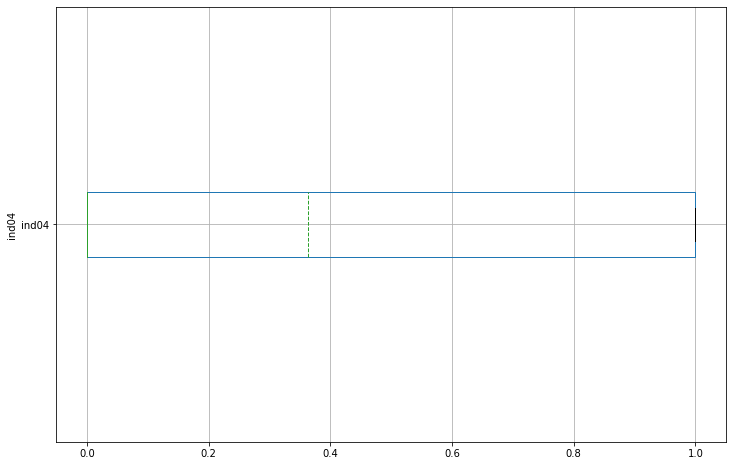

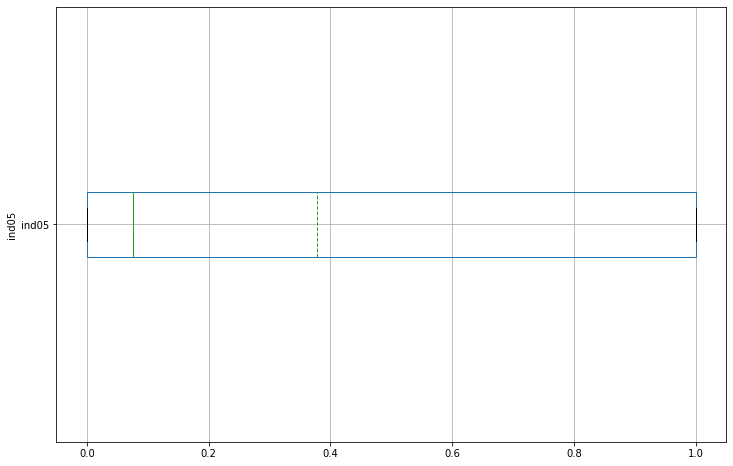

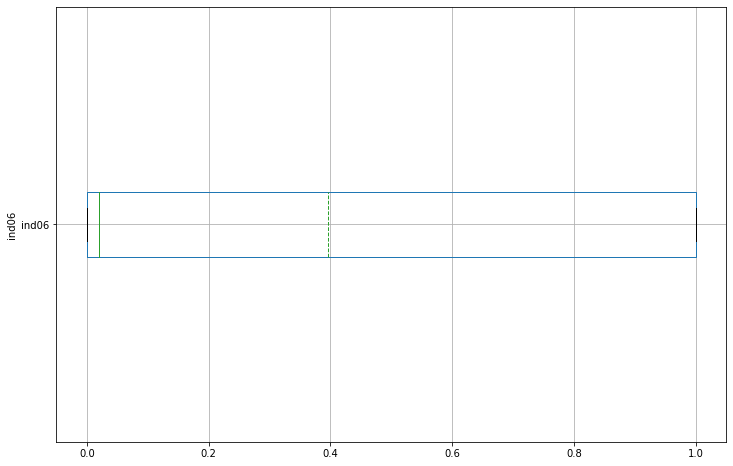

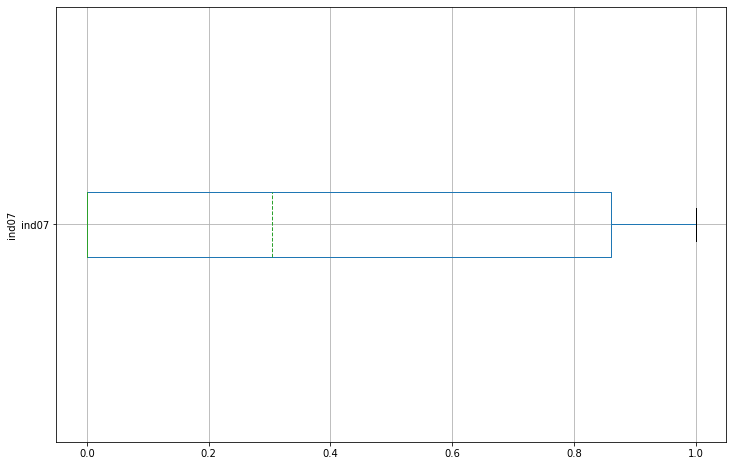

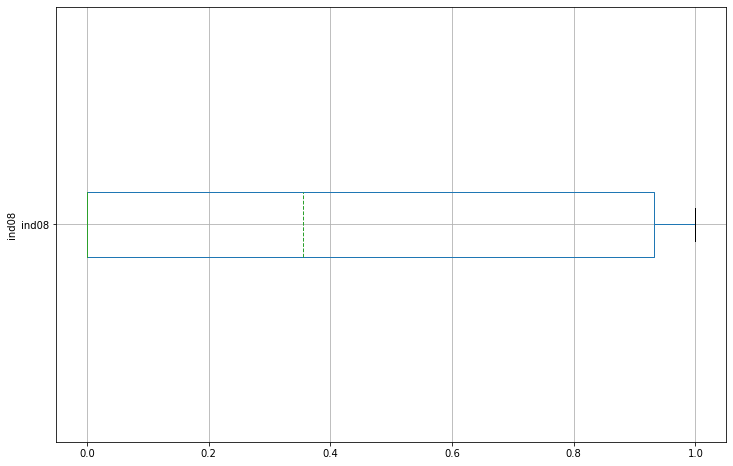

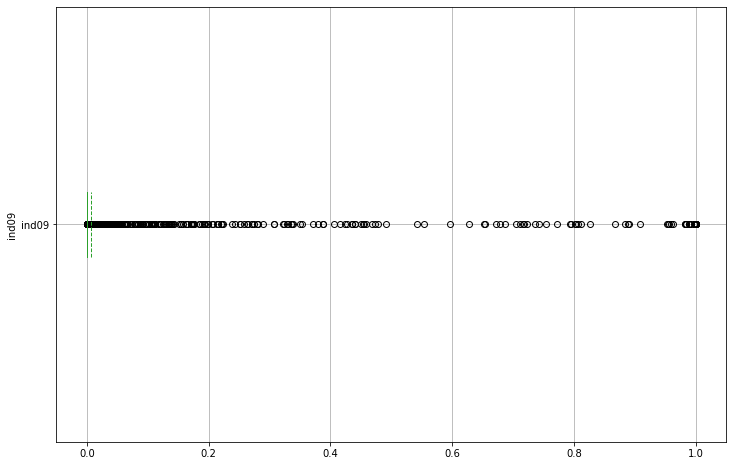

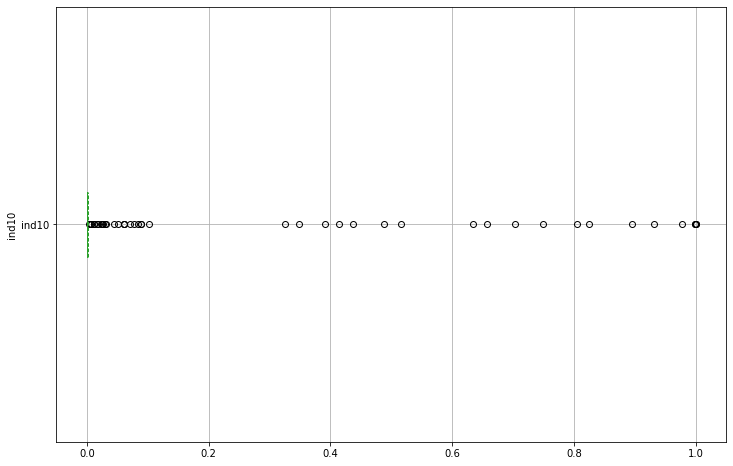

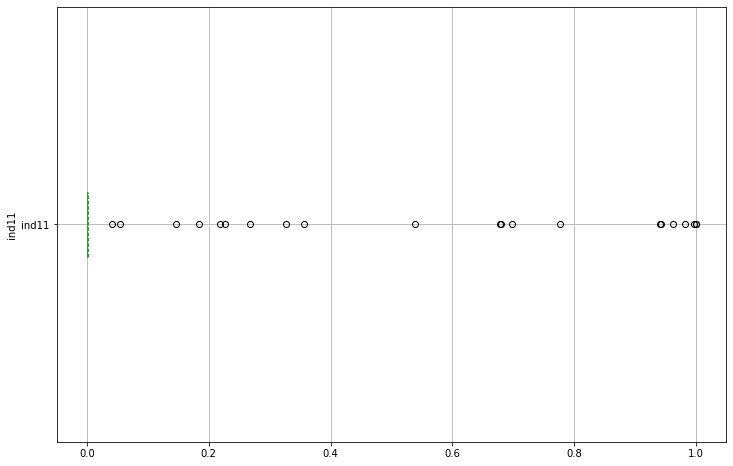

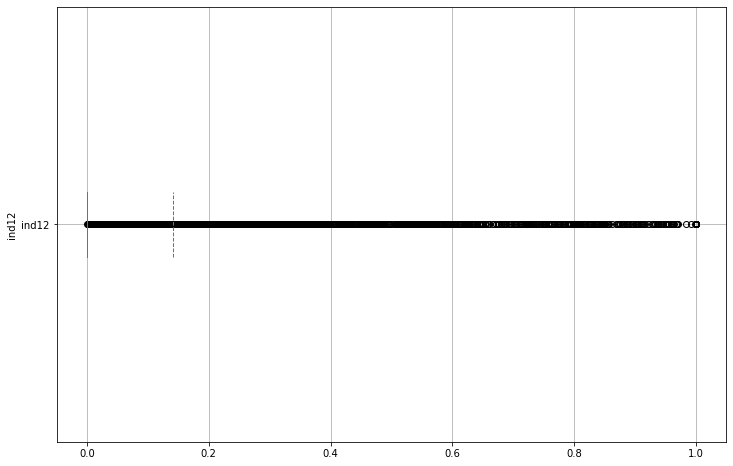

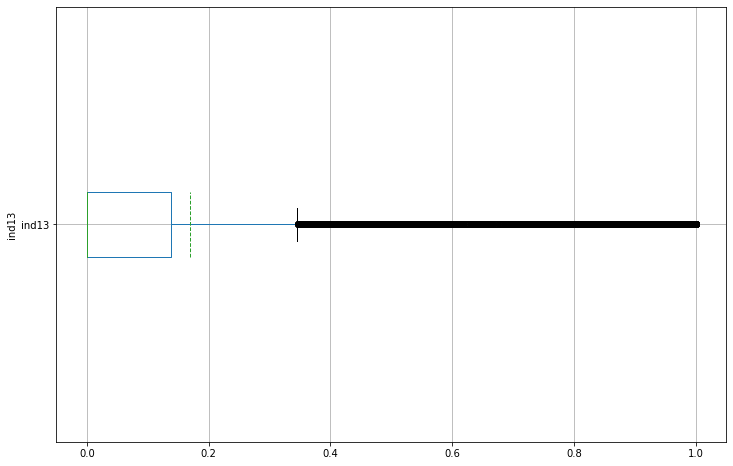

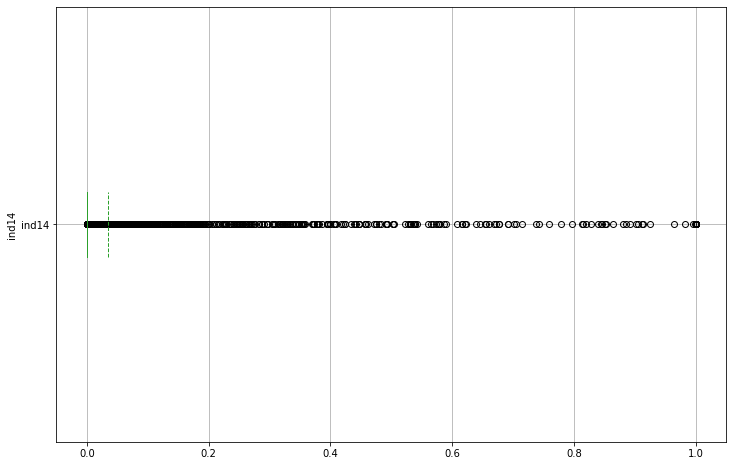

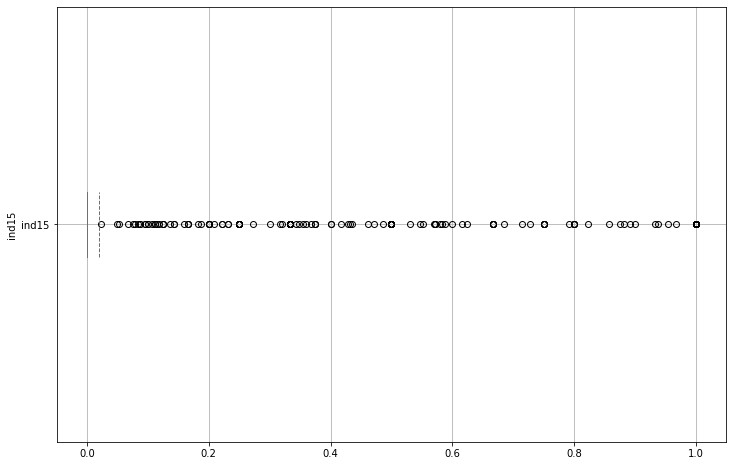

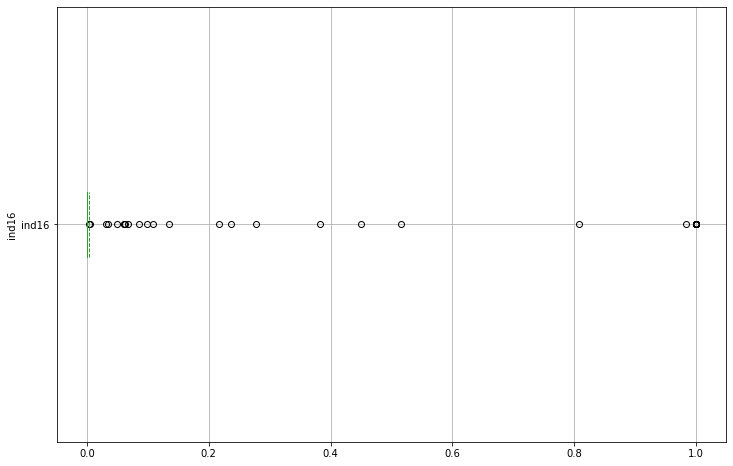

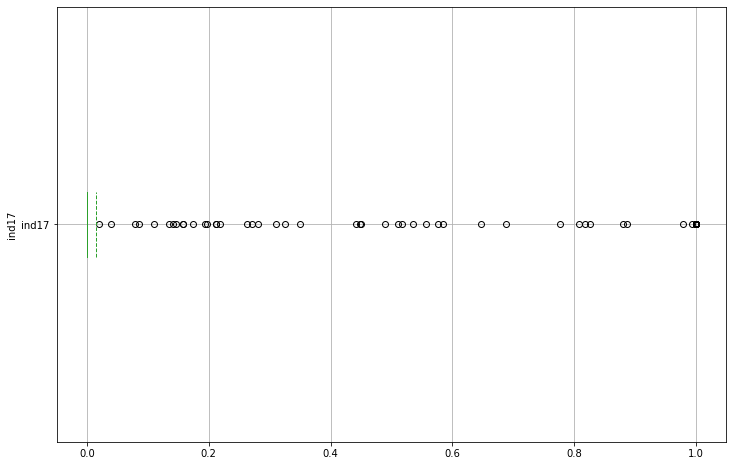

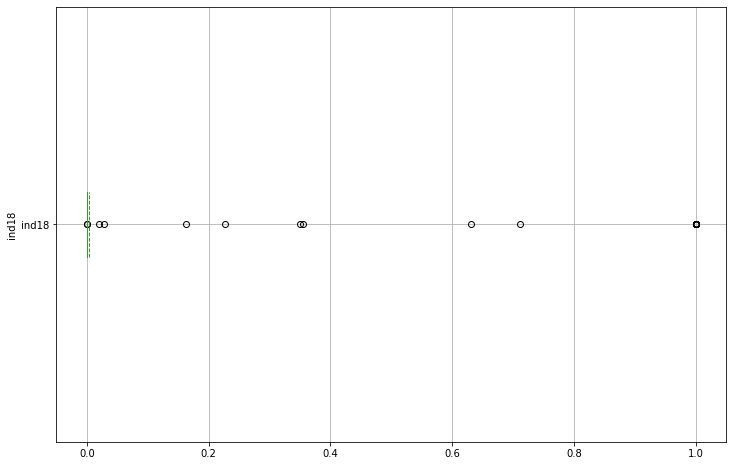

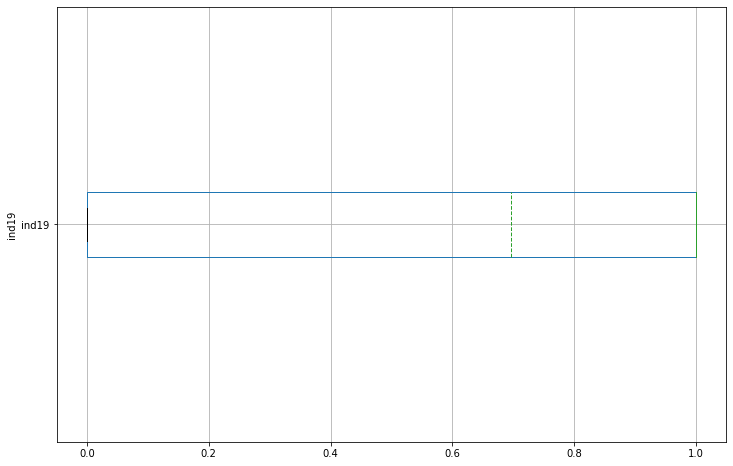

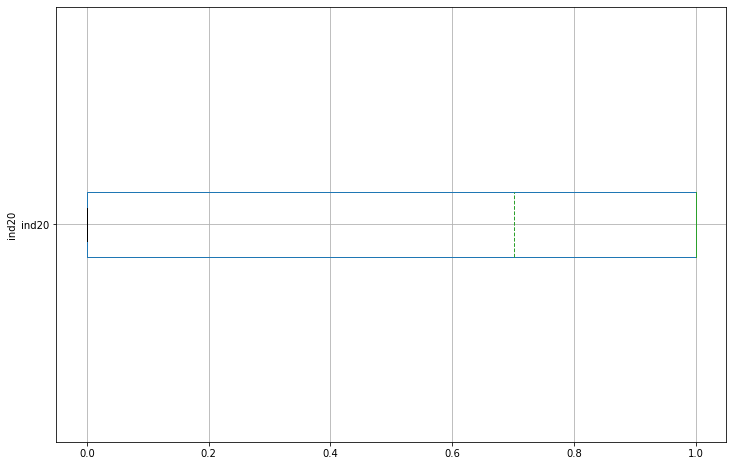

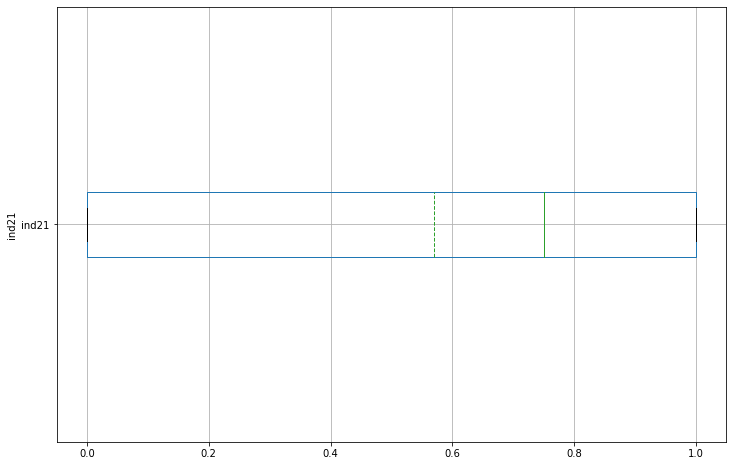

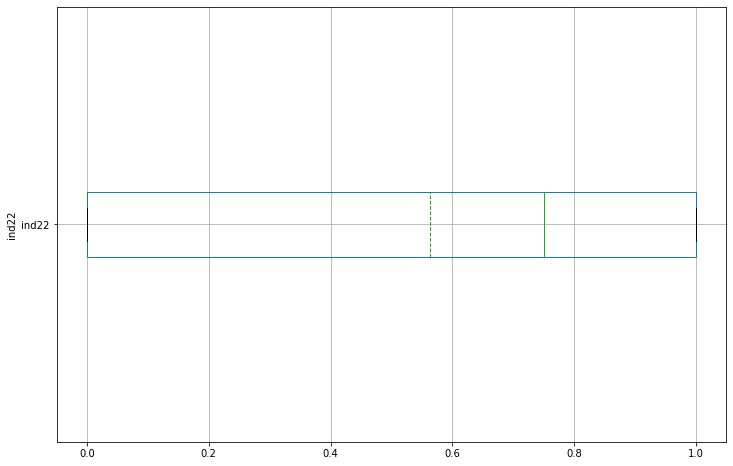

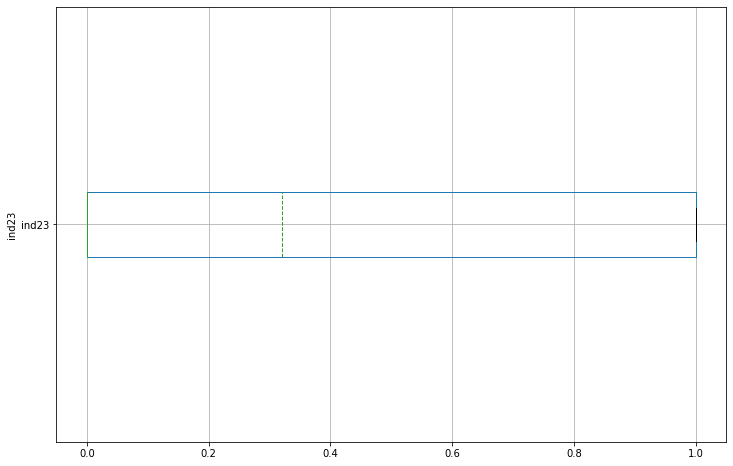

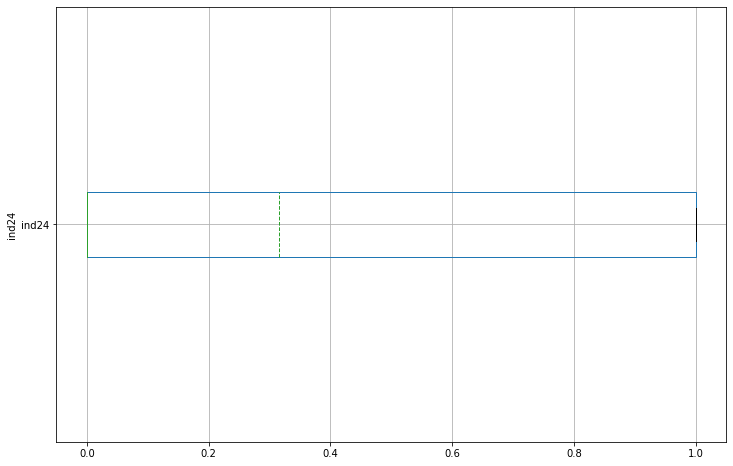

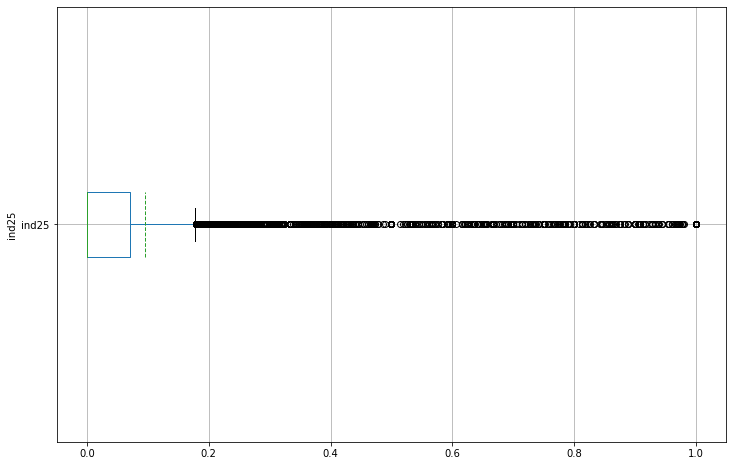

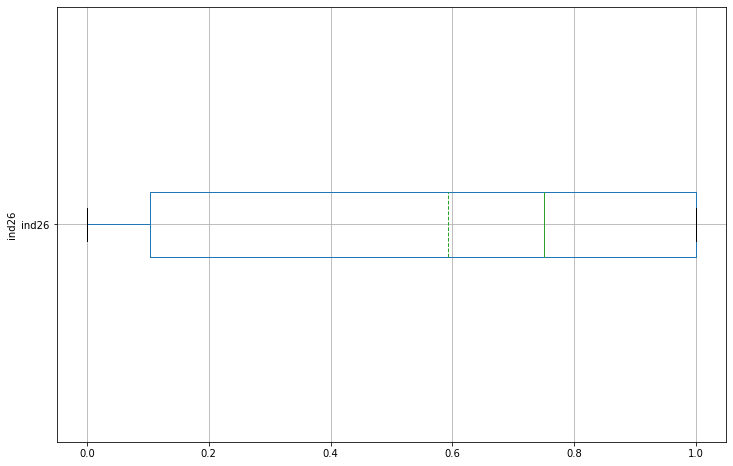

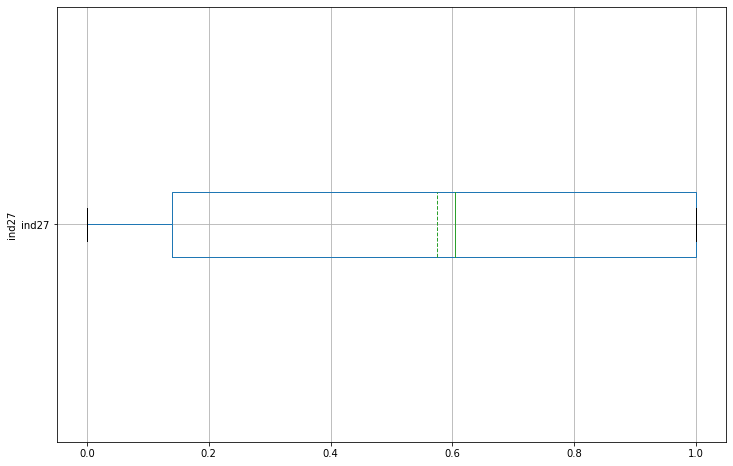

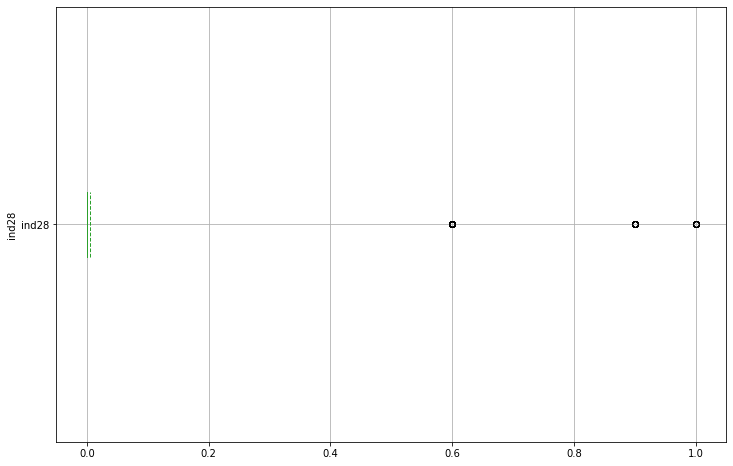

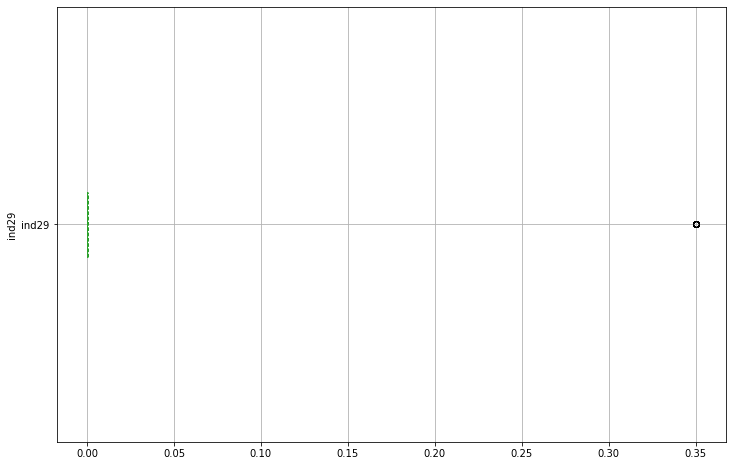

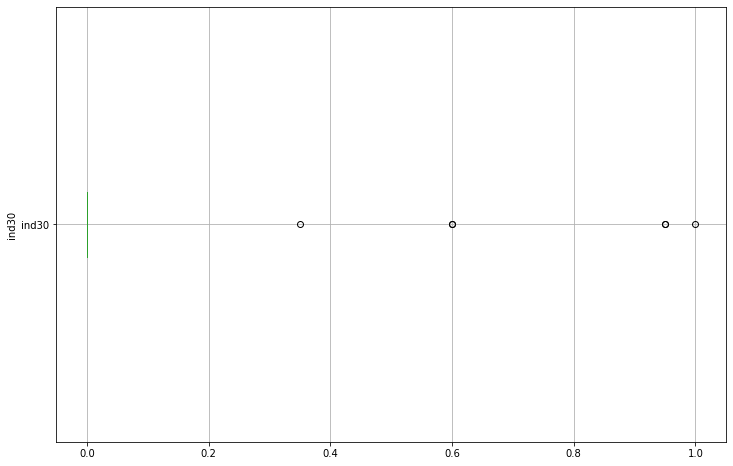

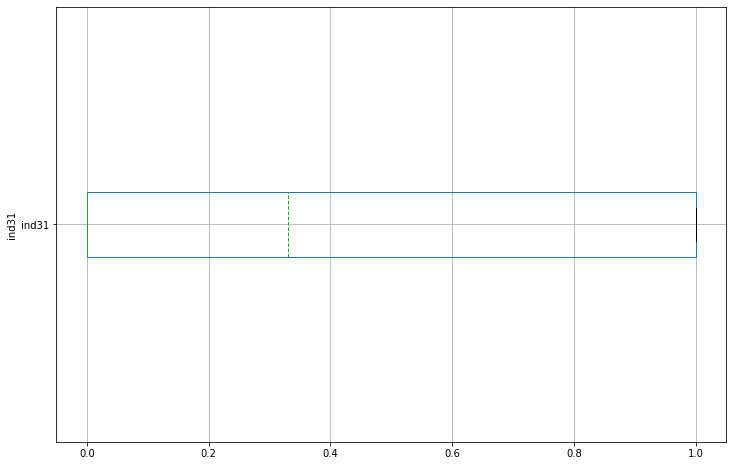

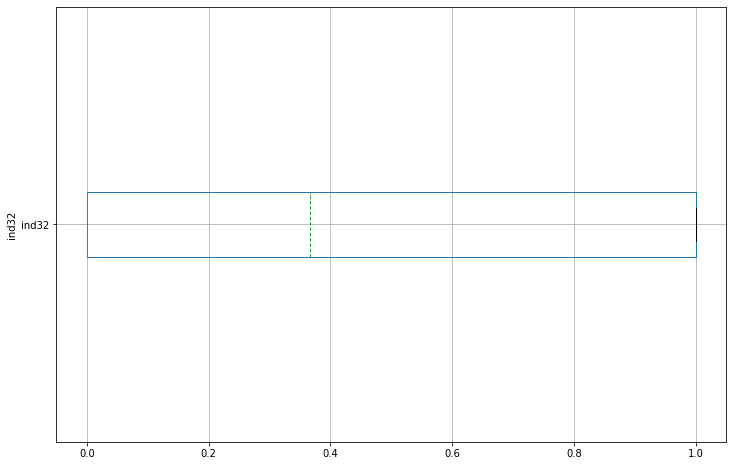

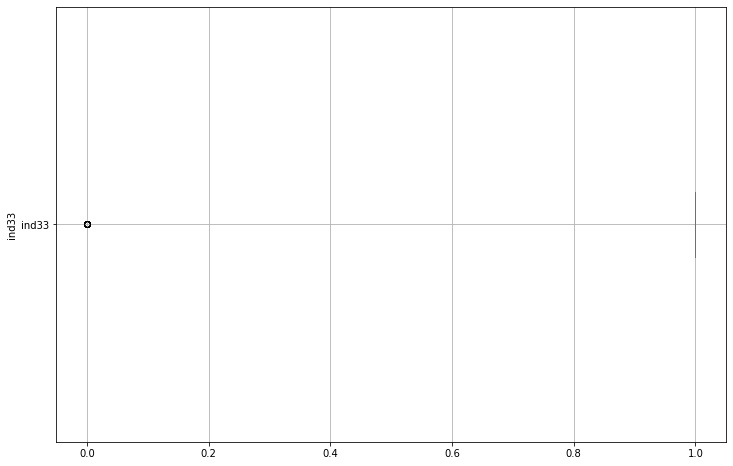

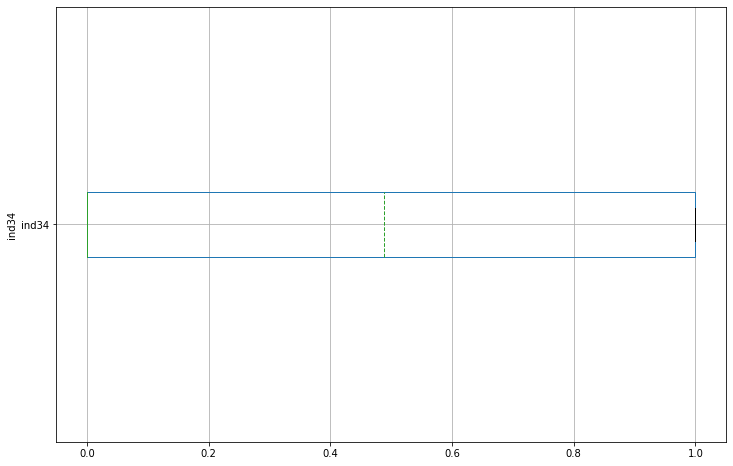

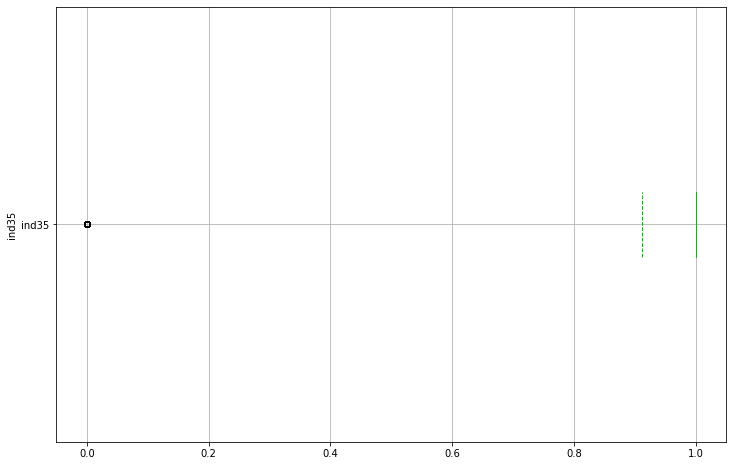

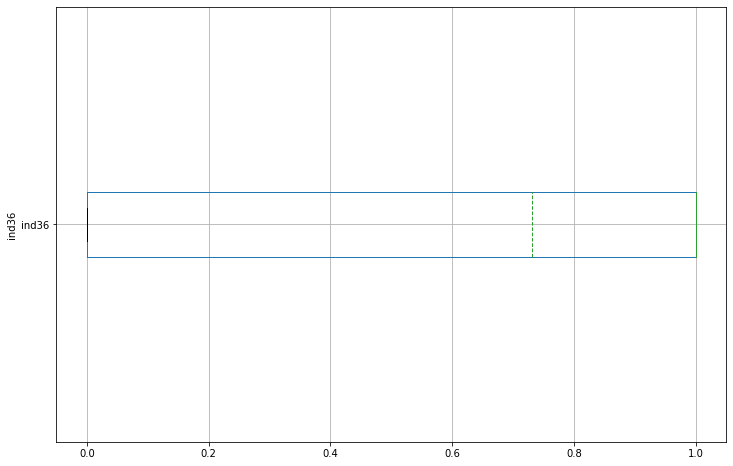

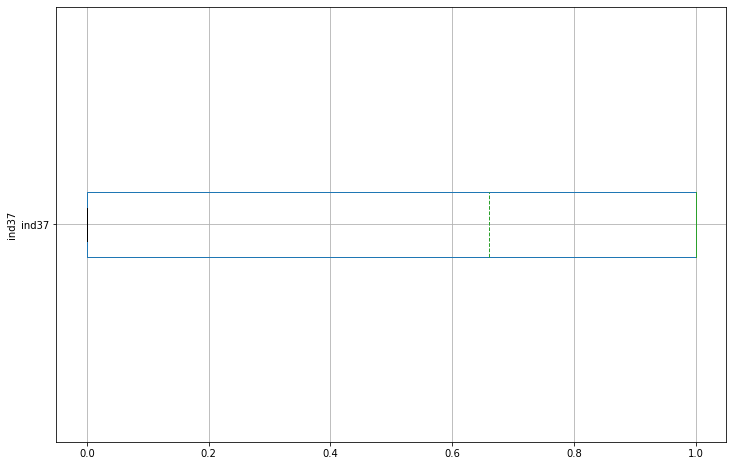

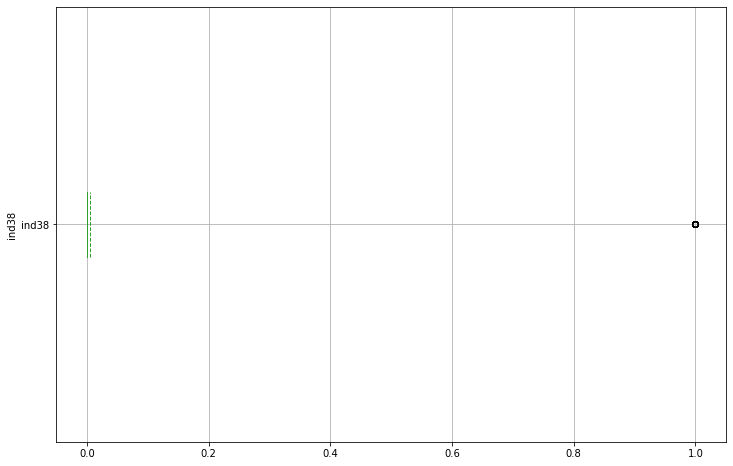

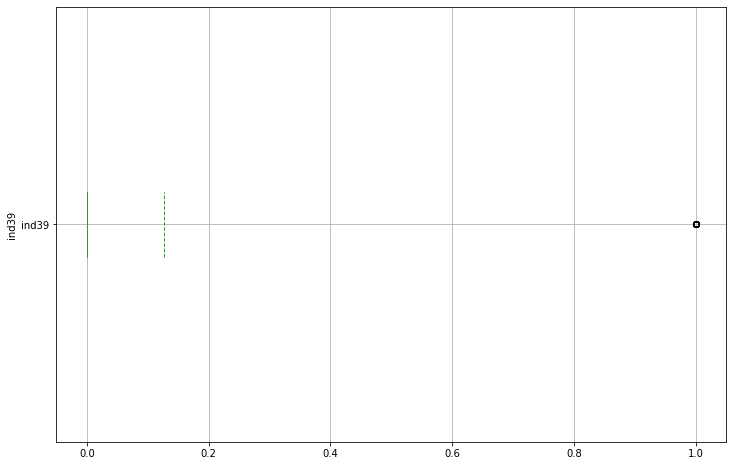

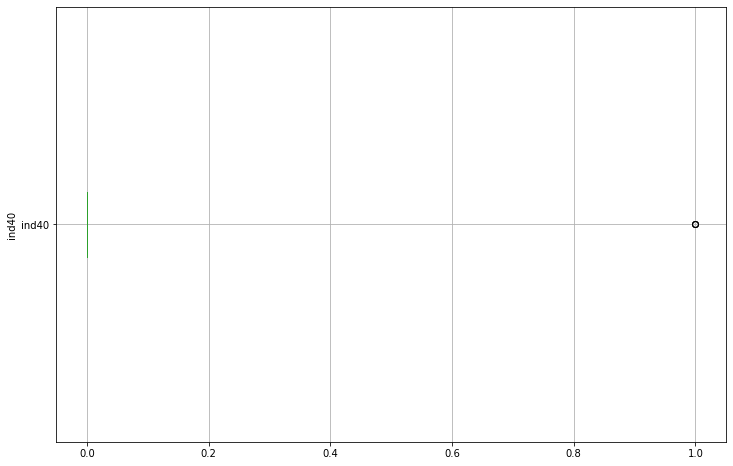

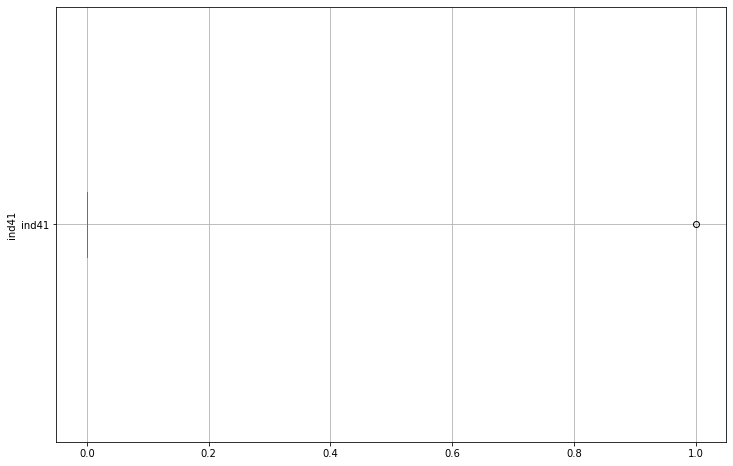

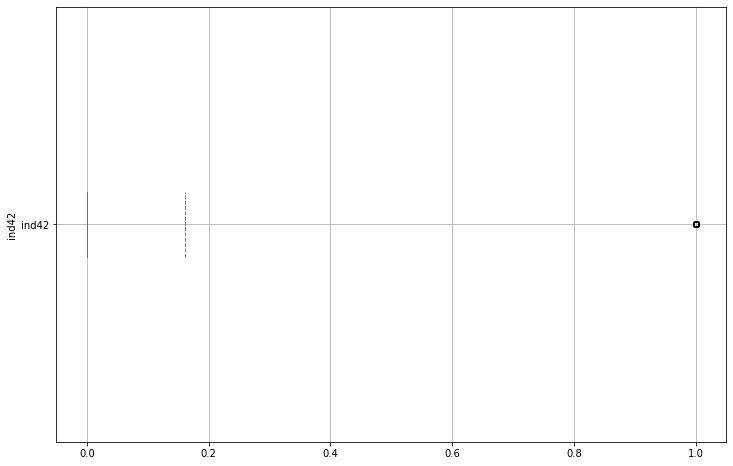

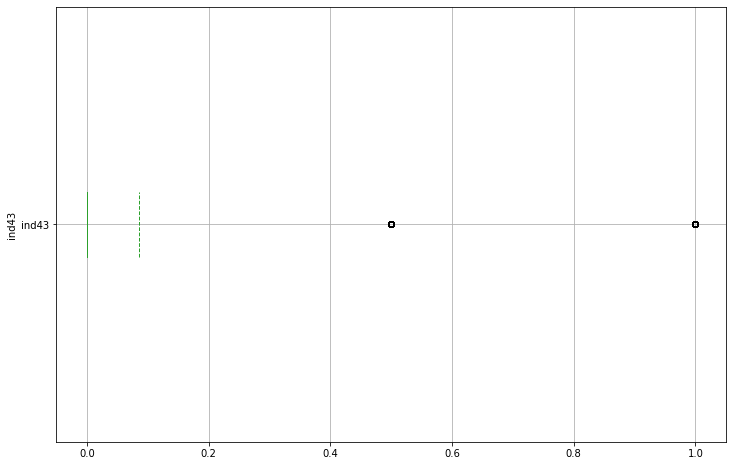

In [59]:
#depois DE TRATAR missing
#outliers lista geral
for d in l_lista_geral:
    df_rec_trei[[d]].plot(kind = 'box',showmeans = True, meanline = True,
                  grid = True, figsize = (12,8),vert = False, ylabel = d)

In [60]:
# Jeito mais fácil (menos trabalhoso).



for i in l_lista_geral:
    
    Q1 = np.percentile(df_rec_trei[i], 25)
    Q3 = np.percentile(df_rec_trei[i], 75)
    IQR = Q3 - Q1
    print(f'++++++++')
    print(f'coluna: {i}')
    print(f'Q1:{Q1}')
    print(f'Q3:{Q3}\n')
    # Cálculo dos limites inferiores e superiores para detecção de outliers:
    lim_inf_out = Q1 - 1.5*IQR
    lim_sup_out = Q3 + 1.5*IQR
    print(f'Lim_inf_out: {lim_inf_out}')
    print(f'Lim_sup_out: {lim_sup_out}\n')
        
    #print(f"coluna: {i}; Limite inferior para outlier: {limite_inferior_outliers}; Limite superior para outliers: {limite_superior_outliers}")
        #max e min
    min = df_rec_trei[i].min()
    max = df_rec_trei[i].max()
    print(f'max_valor: {max}')
    print(f'min_valor:{min}\n')
        
    perc_max = df_rec_trei[i].value_counts()[df_rec_trei[i].max()]/df2.shape[0]*100
    perc_min = df_rec_trei[i].value_counts()[df_rec_trei[i].min()]/df2.shape[0]*100
    print(f'perc_max_valor: {perc_max}')
    print(f'perc_min_valor:{perc_min}\n')
        
    mean = df_rec_trei[i].mean()
    median = df_rec_trei[i].median()
    moda = df_rec_trei[i].mode()
    print(f'mean:{mean}')
    print(f'median: {median}')
    print(f'moda: {moda}')
        

#d_dados1 = dict(zip(l_test1, l_val1))




#df_dados1 = pd.DataFrame(d_dados1, index = ['Q1', 'Q3', 'IQR', 'lim_inf_out', 'lim_sup_out','min_val_dado', 'max_val_dado','perc_min', 'perc_max', 'mean', 'median'],)


++++++++
coluna: md1
Q1:2.5773808824559053e-06
Q3:0.006034846522514576

Lim_inf_out: -0.009045826331565724
Lim_sup_out: 0.015083250234962757

max_valor: 1.0
min_valor:0.0

perc_max_valor: 0.009063717937097798
perc_min_valor:12.3447838303272

mean:0.011669523491646034
median: 0.00031632593421121566
moda: 0    0.0
dtype: float64
++++++++
coluna: md2
Q1:0.002421946635533409
Q3:0.012739863773658235

Lim_inf_out: -0.013054929071653832
Lim_sup_out: 0.028216739480845476

max_valor: 1.0
min_valor:0.0

perc_max_valor: 0.009063717937097798
perc_min_valor:0.027191153811293393

mean:0.012927650570991408
median: 0.005415165460685934
moda: 0    0.01511
dtype: float64
++++++++
coluna: md3
Q1:0.11007707937704167
Q3:0.11790281115151093

Lim_inf_out: 0.0983384817153378
Lim_sup_out: 0.12964140881321481

max_valor: 1.0000000000000002
min_valor:0.0

perc_max_valor: 0.009063717937097798
perc_min_valor:0.009063717937097798

mean:0.11826675569728777
median: 0.1120336020464186
moda: 0    0.108862
dtype: float6

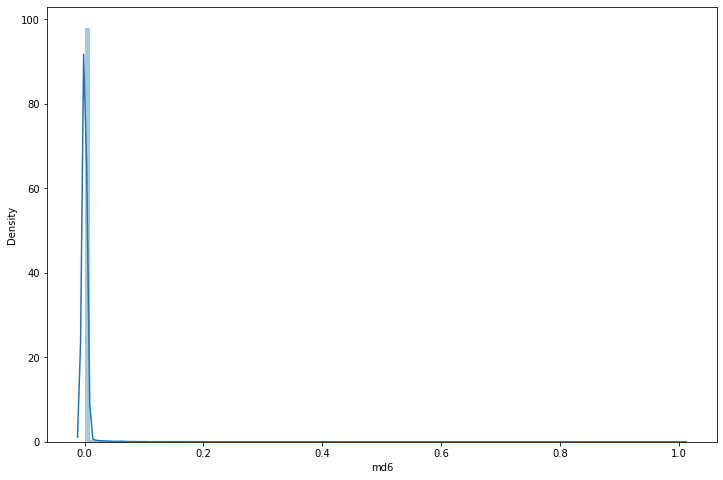

In [88]:
#l_lista_prob = ['md6', 'md11', 'mc2']
#       'ind01', 'ind09', 'ind10', 'ind11', 'ind12','ind14', 'ind15', 'ind16',
#       'ind17', 'ind18', 'ind28', 'ind29', 'ind30', 'ind31','ind33', 'ind34',
#       'ind35', 'ind38', 'ind40', 'ind41', 'ind42', 'ind43']


fig, ax1 = plt.subplots(1,1,figsize=(12,8))
sns.distplot(df_rec_trei.md6.dropna(), bins=100, ax=ax1)
#df_rec_trei[['ind01']].plot(figsize=(12,8), title ='indices', grid=True)

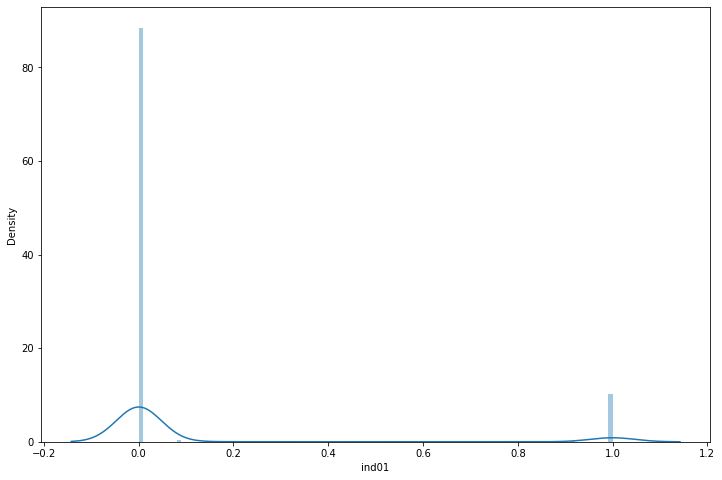

In [89]:
fig, ax1 = plt.subplots(1,1,figsize=(12,8))
sns.distplot(df_rec_trei.ind01.dropna(), bins=100, ax=ax1)


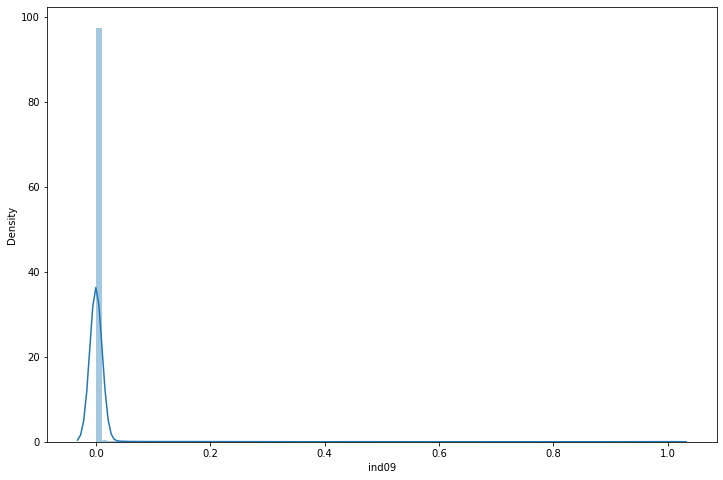

In [90]:
fig, ax1 = plt.subplots(1,1,figsize=(12,8))
sns.distplot(df_rec_trei.ind09.dropna(), bins=100, ax=ax1)


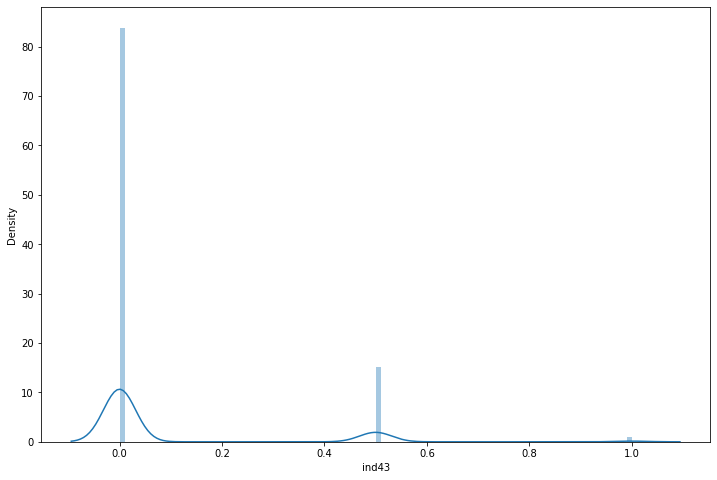

In [91]:
fig, ax1 = plt.subplots(1,1,figsize=(12,8))
sns.distplot(df_rec_trei.ind43.dropna(), bins=100, ax=ax1)


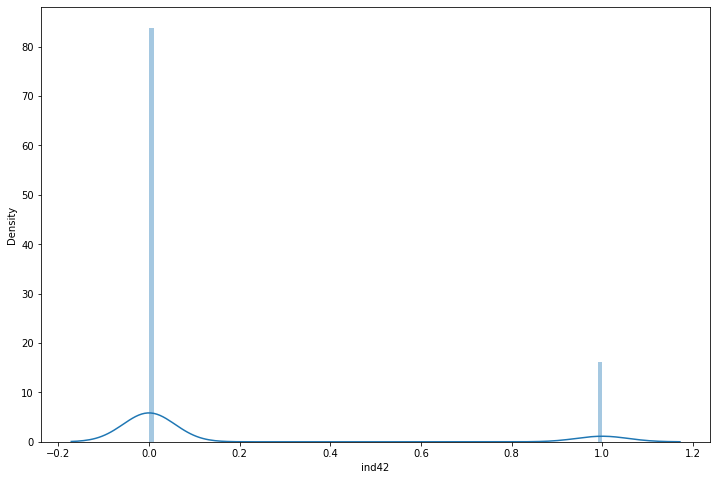

In [92]:
fig, ax1 = plt.subplots(1,1,figsize=(12,8))
sns.distplot(df_rec_trei.ind42.dropna(), bins=100, ax=ax1)


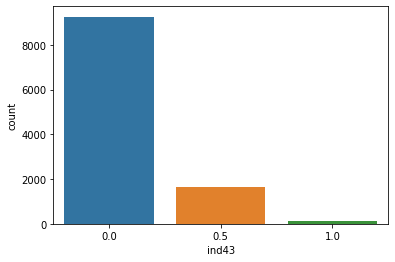

In [74]:
#l_lista_prob = ['md6', 'md11', 'mc2',
#       'ind01', 'ind09', 'ind10', 'ind11', 'ind12','ind14', 'ind15', 'ind16',
#       'ind17', 'ind18', 'ind28', 'ind29', 'ind30', 'ind31','ind33', 'ind34',
#       'ind35', 'ind38', 'ind40', 'ind41', 'ind42', 'ind43']

#sns.countplot( x ='ind01', data = df_rec_trei)

#sns.countplot( x = 'ind09', data = df_rec_trei)
sns.countplot( x = 'ind43', data = df_rec_trei)
    

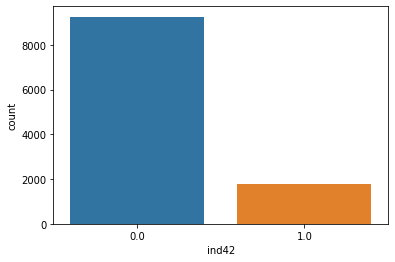

In [75]:
sns.countplot( x = 'ind42', data = df_rec_trei)

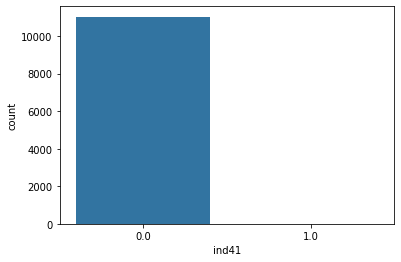

In [76]:
sns.countplot( x = 'ind41', data = df_rec_trei)

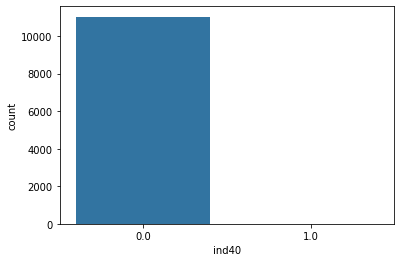

In [77]:
sns.countplot( x = 'ind40', data = df_rec_trei)

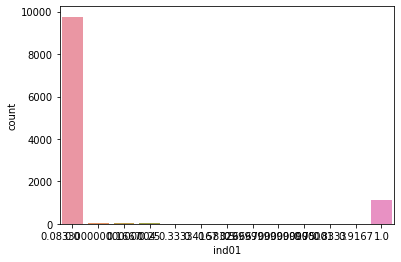

In [78]:
sns.countplot( x = 'ind01', data = df_rec_trei)

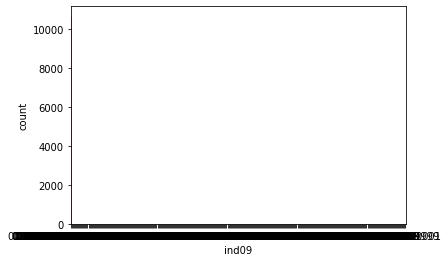

In [79]:
sns.countplot( x = 'ind09', data = df_rec_trei)

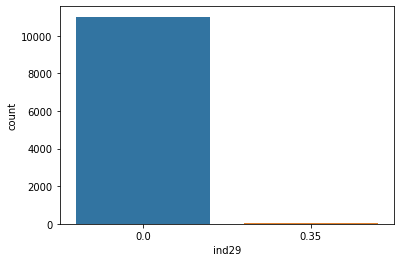

In [80]:
sns.countplot( x = 'ind29', data = df_rec_trei)

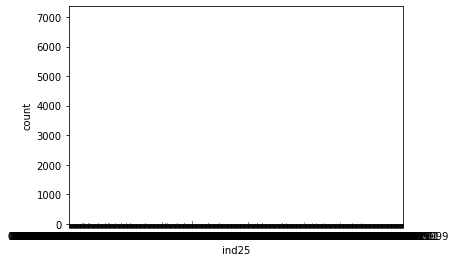

In [81]:
sns.countplot( x = 'ind25', data = df_rec_trei)

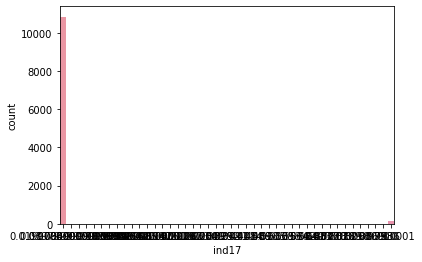

In [82]:
sns.countplot( x = 'ind17', data = df_rec_trei,)

In [ ]:
'''# Jeito mais fácil (menos trabalhoso).
l_test3 = ['mc1', 'mc2', 'mc3', 'mc4', 'ind01', 'ind02']
l_val3 = []

for i in l_test3:
    for j in range(len(l_test3)):
        l_val[j] = []
        Q1 = np.percentile(df_rec_trei[i], 25)
        l_val[j].append(Q1)
        Q3 = np.percentile(df_rec_trei[i], 75)
        l_val[j].append(Q3)
        IQR = Q3 - Q1
        l_val[j].append(IQR)
    # Cálculo dos limites inferiores e superiores para detecção de outliers:
        lim_inf_out = Q1 - 1.5*IQR
        l_val[j].append(lim_inf_out)
        lim_sup_out = Q3 + 1.5*IQR
        l_val[j].append(lim_sup_out)
    #print(f"coluna: {i}; Limite inferior para outlier: {limite_inferior_outliers}; Limite superior para outliers: {limite_superior_outliers}")
        #max e min
        min = df_rec_trei[i].min()
        l_val[j].append(min)
        max = df_rec_trei[i].max()
        l_val[j].append(max)
        perc_max = df_rec_trei[i].value_counts()[df_rec_trei[i].max()]/df2.shape[0]
        l_val[j].append(perc_max)
        perc_min = df_rec_trei[i].value_counts()[df_rec_trei[i].min()]/df2.shape[0]
        l_val[j].append(perc_min)
        mean = df_rec_trei[i].mean()
        l_val[j].append(mean)
        median = df_rec_trei[i].median()
        l_val[j].append(median)
        #moda = df_rec_trei[i].mode()
        #l_val[j].append(moda)
        l_val3.append(l_val[j])

d_dados3 = dict(zip(l_test3, l_val3))




df_dados3 = pd.DataFrame(d_dados3, index = ['Q1', 'Q3', 'IQR', 'lim_inf_out', 'lim_sup_out','min_val_dado', 'max_val_dado','perc_min', 'perc_max', 'mean', 'median'],)


In [ ]:
'''# Jeito mais fácil (menos trabalhoso).
l_test4 = ['ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08']
l_val4 = []

for i in l_test4:
    for j in range(len(l_test4)):
        l_val[j] = []
        Q1 = np.percentile(df_rec_trei[i], 25)
        l_val[j].append(Q1)
        Q3 = np.percentile(df_rec_trei[i], 75)
        l_val[j].append(Q3)
        IQR = Q3 - Q1
        l_val[j].append(IQR)
    # Cálculo dos limites inferiores e superiores para detecção de outliers:
        lim_inf_out = Q1 - 1.5*IQR
        l_val[j].append(lim_inf_out)
        lim_sup_out = Q3 + 1.5*IQR
        l_val[j].append(lim_sup_out)
    #print(f"coluna: {i}; Limite inferior para outlier: {limite_inferior_outliers}; Limite superior para outliers: {limite_superior_outliers}")
        #max e min
        min = df_rec_trei[i].min()
        l_val[j].append(min)
        max = df_rec_trei[i].max()
        l_val[j].append(max)
        perc_max = df_rec_trei[i].value_counts()[df_rec_trei[i].max()]/df2.shape[0]
        l_val[j].append(perc_max)
        perc_min = df_rec_trei[i].value_counts()[df_rec_trei[i].min()]/df2.shape[0]
        l_val[j].append(perc_min)
        mean = df_rec_trei[i].mean()
        l_val[j].append(mean)
        median = df_rec_trei[i].median()
        l_val[j].append(median)
        #moda = df_rec_trei[i].mode()
        #l_val[j].append(moda)
        l_val4.append(l_val[j])

d_dados4 = dict(zip(l_test4, l_val4))




df_dados4 = pd.DataFrame(d_dados4, index = ['Q1', 'Q3', 'IQR', 'lim_inf_out', 'lim_sup_out','min_val_dado', 'max_val_dado','perc_min', 'perc_max', 'mean', 'median'],)


In [ ]:
'''# Jeito mais fácil (menos trabalhoso).
l_test5 = ['ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14']
l_val5 = []

for i in l_test5:
    for j in range(len(l_test5)):
        l_val[j] = []
        Q1 = np.percentile(df_rec_trei[i], 25)
        l_val[j].append(Q1)
        Q3 = np.percentile(df_rec_trei[i], 75)
        l_val[j].append(Q3)
        IQR = Q3 - Q1
        l_val[j].append(IQR)
    # Cálculo dos limites inferiores e superiores para detecção de outliers:
        lim_inf_out = Q1 - 1.5*IQR
        l_val[j].append(lim_inf_out)
        lim_sup_out = Q3 + 1.5*IQR
        l_val[j].append(lim_sup_out)
    #print(f"coluna: {i}; Limite inferior para outlier: {limite_inferior_outliers}; Limite superior para outliers: {limite_superior_outliers}")
        #max e min
        min = df_rec_trei[i].min()
        l_val[j].append(min)
        max = df_rec_trei[i].max()
        l_val[j].append(max)
        perc_max = df_rec_trei[i].value_counts()[df_rec_trei[i].max()]/df2.shape[0]
        l_val[j].append(perc_max)
        perc_min = df_rec_trei[i].value_counts()[df_rec_trei[i].min()]/df2.shape[0]
        l_val[j].append(perc_min)
        mean = df_rec_trei[i].mean()
        l_val[j].append(mean)
        median = df_rec_trei[i].median()
        l_val[j].append(median)
        #moda = df_rec_trei[i].mode()
        #l_val[j].append(moda)
        l_val5.append(l_val[j])

d_dados5 = dict(zip(l_test5, l_val5))




df_dados5 = pd.DataFrame(d_dados5, index = ['Q1', 'Q3', 'IQR', 'lim_inf_out', 'lim_sup_out','min_val_dado', 'max_val_dado','perc_min', 'perc_max', 'mean', 'median'],)


In [ ]:
'''# Jeito mais fácil (menos trabalhoso).
l_test6 = ['ind21', 'ind22', 'ind23', 'ind24', 'ind25', 'ind26']
l_val6 = []

for i in l_test6:
    for j in range(len(l_test6)):
        l_val[j] = []
        Q1 = np.percentile(df_rec_trei[i], 25)
        l_val[j].append(Q1)
        Q3 = np.percentile(df_rec_trei[i], 75)
        l_val[j].append(Q3)
        IQR = Q3 - Q1
        l_val[j].append(IQR)
    # Cálculo dos limites inferiores e superiores para detecção de outliers:
        lim_inf_out = Q1 - 1.5*IQR
        l_val[j].append(lim_inf_out)
        lim_sup_out = Q3 + 1.5*IQR
        l_val[j].append(lim_sup_out)
    #print(f"coluna: {i}; Limite inferior para outlier: {limite_inferior_outliers}; Limite superior para outliers: {limite_superior_outliers}")
        #max e min
        min = df_rec_trei[i].min()
        l_val[j].append(min)
        max = df_rec_trei[i].max()
        l_val[j].append(max)
        perc_max = df_rec_trei[i].value_counts()[df_rec_trei[i].max()]/df2.shape[0]
        l_val[j].append(perc_max)
        perc_min = df_rec_trei[i].value_counts()[df_rec_trei[i].min()]/df2.shape[0]
        l_val[j].append(perc_min)
        mean = df_rec_trei[i].mean()
        l_val[j].append(mean)
        median = df_rec_trei[i].median()
        l_val[j].append(median)
        #moda = df_rec_trei[i].mode()
        #l_val[j].append(moda)
        l_val6.append(l_val[j])

d_dados6 = dict(zip(l_test6, l_val6))




df_dados6 = pd.DataFrame(d_dados6, index = ['Q1', 'Q3', 'IQR', 'lim_inf_out', 'lim_sup_out','min_val_dado', 'max_val_dado','perc_min', 'perc_max', 'mean', 'median'],)


In [ ]:
'''# Jeito mais fácil (menos trabalhoso).
l_test7 = ['ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32']
l_val7 = []

for i in l_test7:
    for j in range(len(l_test7)):
        l_val[j] = []
        Q1 = np.percentile(df_rec_trei[i], 25)
        l_val[j].append(Q1)
        Q3 = np.percentile(df_rec_trei[i], 75)
        l_val[j].append(Q3)
        IQR = Q3 - Q1
        l_val[j].append(IQR)
    # Cálculo dos limites inferiores e superiores para detecção de outliers:
        lim_inf_out = Q1 - 1.5*IQR
        l_val[j].append(lim_inf_out)
        lim_sup_out = Q3 + 1.5*IQR
        l_val[j].append(lim_sup_out)
    #print(f"coluna: {i}; Limite inferior para outlier: {limite_inferior_outliers}; Limite superior para outliers: {limite_superior_outliers}")
        #max e min
        min = df_rec_trei[i].min()
        l_val[j].append(min)
        max = df_rec_trei[i].max()
        l_val[j].append(max)
        perc_max = df_rec_trei[i].value_counts()[df_rec_trei[i].max()]/df2.shape[0]
        l_val[j].append(perc_max)
        perc_min = df_rec_trei[i].value_counts()[df_rec_trei[i].min()]/df2.shape[0]
        l_val[j].append(perc_min)
        mean = df_rec_trei[i].mean()
        l_val[j].append(mean)
        median = df_rec_trei[i].median()
        l_val[j].append(median)
        #moda = df_rec_trei[i].mode()
        #l_val[j].append(moda)
        l_val7.append(l_val[j])

d_dados7 = dict(zip(l_test7, l_val7))




df_dados7 = pd.DataFrame(d_dados7, index = ['Q1', 'Q3', 'IQR', 'lim_inf_out', 'lim_sup_out','min_val_dado', 'max_val_dado','perc_min', 'perc_max', 'mean', 'median'],)


In [ ]:
'''# Jeito mais fácil (menos trabalhoso).
l_test8 = ['ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38']
l_val8 = []

for i in l_test8:
    for j in range(len(l_test8)):
        l_val[j] = []
        Q1 = np.percentile(df_rec_trei[i], 25)
        l_val[j].append(Q1)
        Q3 = np.percentile(df_rec_trei[i], 75)
        l_val[j].append(Q3)
        IQR = Q3 - Q1
        l_val[j].append(IQR)
    # Cálculo dos limites inferiores e superiores para detecção de outliers:
        lim_inf_out = Q1 - 1.5*IQR
        l_val[j].append(lim_inf_out)
        lim_sup_out = Q3 + 1.5*IQR
        l_val[j].append(lim_sup_out)
    #print(f"coluna: {i}; Limite inferior para outlier: {limite_inferior_outliers}; Limite superior para outliers: {limite_superior_outliers}")
        #max e min
        min = df_rec_trei[i].min()
        l_val[j].append(min)
        max = df_rec_trei[i].max()
        l_val[j].append(max)
        perc_max = df_rec_trei[i].value_counts()[df_rec_trei[i].max()]/df2.shape[0]
        l_val[j].append(perc_max)
        perc_min = df_rec_trei[i].value_counts()[df_rec_trei[i].min()]/df2.shape[0]
        l_val[j].append(perc_min)
        mean = df_rec_trei[i].mean()
        l_val[j].append(mean)
        median = df_rec_trei[i].median()
        l_val[j].append(median)
        #moda = df_rec_trei[i].mode()
        #l_val[j].append(moda)
        l_val8.append(l_val[j])

d_dados8 = dict(zip(l_test8, l_val8))




df_dados8 = pd.DataFrame(d_dados8, index = ['Q1', 'Q3', 'IQR', 'lim_inf_out', 'lim_sup_out','min_val_dado', 'max_val_dado','perc_min', 'perc_max', 'mean', 'median'],)


In [ ]:
'''# Jeito mais fácil (menos trabalhoso).
l_test9 = ['ind39', 'ind40','ind41', 'ind42', 'ind43']
l_val9 = []

for i in l_test9:
    for j in range(len(l_test9)):
        l_val[j] = []
        Q1 = np.percentile(df_rec_trei[i], 25)
        l_val[j].append(Q1)
        Q3 = np.percentile(df_rec_trei[i], 75)
        l_val[j].append(Q3)
        IQR = Q3 - Q1
        l_val[j].append(IQR)
    # Cálculo dos limites inferiores e superiores para detecção de outliers:
        lim_inf_out = Q1 - 1.5*IQR
        l_val[j].append(lim_inf_out)
        lim_sup_out = Q3 + 1.5*IQR
        l_val[j].append(lim_sup_out)
    #print(f"coluna: {i}; Limite inferior para outlier: {limite_inferior_outliers}; Limite superior para outliers: {limite_superior_outliers}")
        #max e min
        min = df_rec_trei[i].min()
        l_val[j].append(min)
        max = df_rec_trei[i].max()
        l_val[j].append(max)
        perc_max = df_rec_trei[i].value_counts()[df_rec_trei[i].max()]/df2.shape[0]
        l_val[j].append(perc_max)
        perc_min = df_rec_trei[i].value_counts()[df_rec_trei[i].min()]/df2.shape[0]
        l_val[j].append(perc_min)
        mean = df_rec_trei[i].mean()
        l_val[j].append(mean)
        median = df_rec_trei[i].median()
        l_val[j].append(median)
        #moda = df_rec_trei[i].mode()
        #l_val[j].append(moda)
        l_val9.append(l_val[j])

d_dados9 = dict(zip(l_test9, l_val9))




df_dados9 = pd.DataFrame(d_dados9, index = ['Q1', 'Q3', 'IQR', 'lim_inf_out', 'lim_sup_out','min_val_dado', 'max_val_dado','perc_min', 'perc_max', 'mean', 'median'],)


NameError: ignored

In [107]:
from scipy import stats 

In [114]:
def trata_outliers(df, coluna):
    #sns.boxplot(x = coluna, data = df)
    print(f'++++++++')
    print(f'coluna: {coluna}')


    # Cálculo de Q1, Q3 e IQR:
    Q1 = np.percentile(df[coluna], 25)
    Q3 = np.percentile(df[coluna], 75)
    IQR = Q3 - Q1
    print(f"IQR: {IQR}")

    # Jeito mais fácil (menos trabalhoso).
    #IQR2 = stats.iqr(df[coluna]) 
    #IQR2 

    # Cálculo dos limites inferiores e superiores para detecção de outliers:
    limite_inferior_outliers = Q1 - 1.5*IQR
    limite_superior_outliers = Q3 + 1.5*IQR
    print(f"Limite inferior para outlier: {limite_inferior_outliers}; Limite superior para outliers: {limite_superior_outliers}")

    # Cálculo da mediana
    media = df[coluna].mean()
    print(f"Media: {media}")

    # Substituição dos outliers:
    df[coluna+'_o'] = df[coluna]

    df.loc[(df[coluna] > limite_superior_outliers)|(df[coluna] < limite_inferior_outliers), coluna+'_o'] = np.nan
    df[coluna+'_o'].fillna(media, inplace = True) # 'o' significa tratamento outlier --> indicação para mostrar que a coluna passou pelo tratamento dos outliers.

    return df, limite_superior_outliers, limite_inferior_outliers

In [ ]:
'''def trata_outliers_inf(df, coluna):
    #sns.boxplot(x = coluna, data = df)
    print(f'++++++++')
    print(f'coluna: {coluna}')


    # Cálculo de Q1, Q3 e IQR:
    Q1 = np.percentile(df[coluna], 25)
    Q3 = np.percentile(df[coluna], 75)
    IQR = Q3 - Q1
    print(f"IQR: {IQR}")

    # Jeito mais fácil (menos trabalhoso).
    #IQR2 = stats.iqr(df[coluna]) 
    #IQR2 

    # Cálculo dos limites inferiores e superiores para detecção de outliers:
    limite_inferior_outliers = Q1 - 1.5*IQR
    limite_superior_outliers = Q3 + 1.5*IQR
    print(f"Limite inferior para outlier: {limite_inferior_outliers}; Limite superior para outliers: {limite_superior_outliers}")

    # Cálculo da mediana
    media = df[coluna].mean()
    print(f"Media: {media}")

    # Substituição dos outliers:
    df[coluna+'_o'] = df[coluna]

    df.loc[df[coluna] < limite_inferior_outliers, coluna+'_o'] = np.nan
    df[coluna+'_o'].fillna(media, inplace = True) # 'o' significa tratamento outlier --> indicação para mostrar que a coluna passou pelo tratamento dos outliers.

    return df, limite_inferior_outliers

In [108]:
l_out_ind0120 = ['ind01','ind02', 'ind09', 'ind10',
 'ind11',
 'ind12',
 'ind13',
 'ind14',
 'ind15',
 'ind16',
 'ind17',
 'ind18']

In [109]:
l_demais_com_out = ['md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7', 'md8', 'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4',
                'ind25', 'ind28', 'ind29', 'ind30', 'ind33', 'ind35', 'ind38', 'ind39', 'ind40',
                'ind41', 'ind42', 'ind43']

In [110]:
l_geral_out_trei = l_demais_com_out + l_out_ind0120

In [111]:
len(l_geral_out_trei)

40

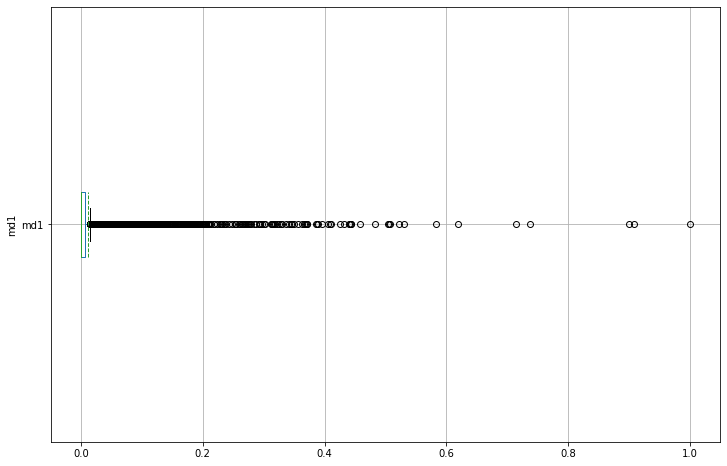

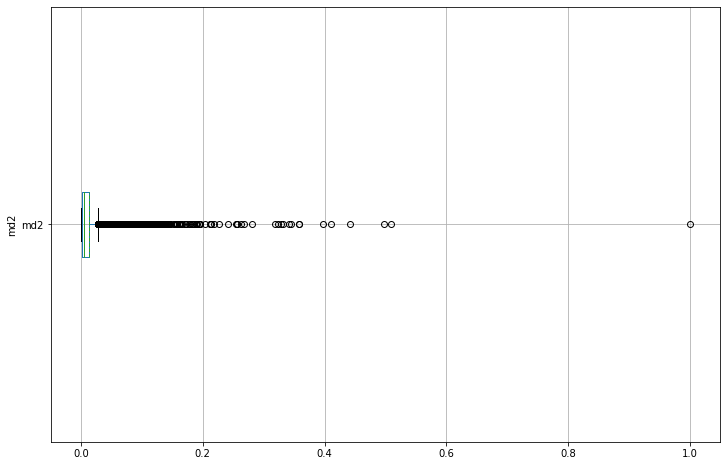

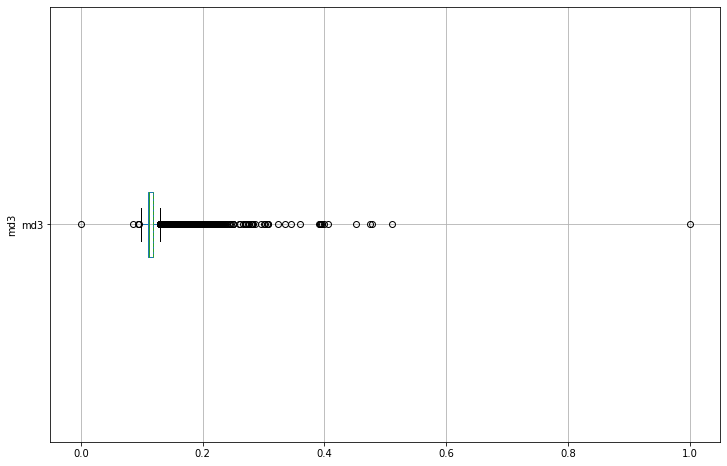

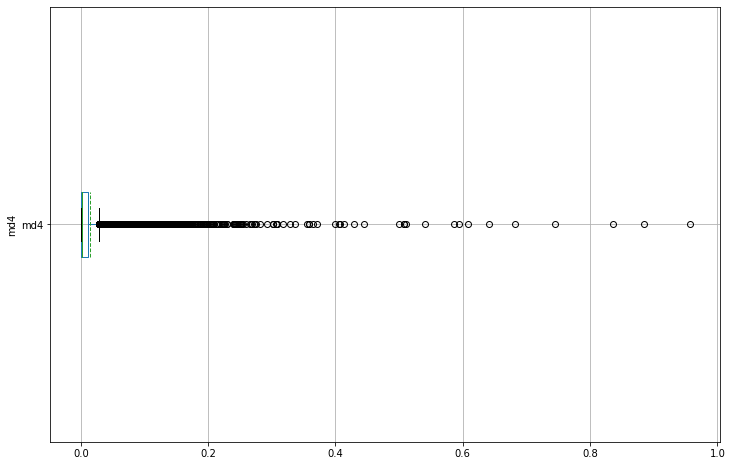

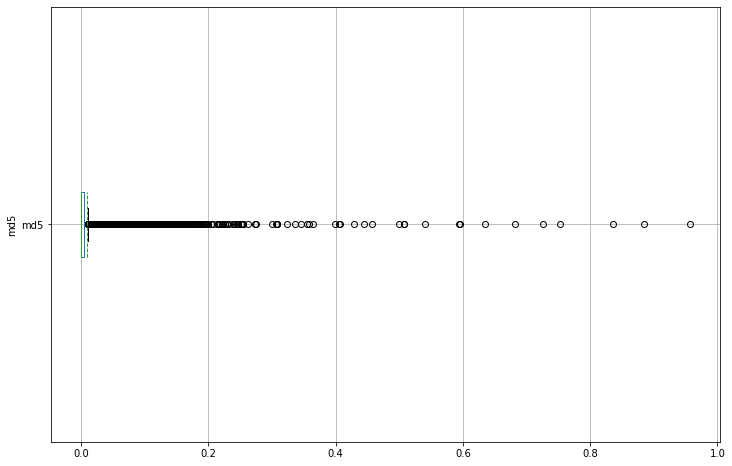

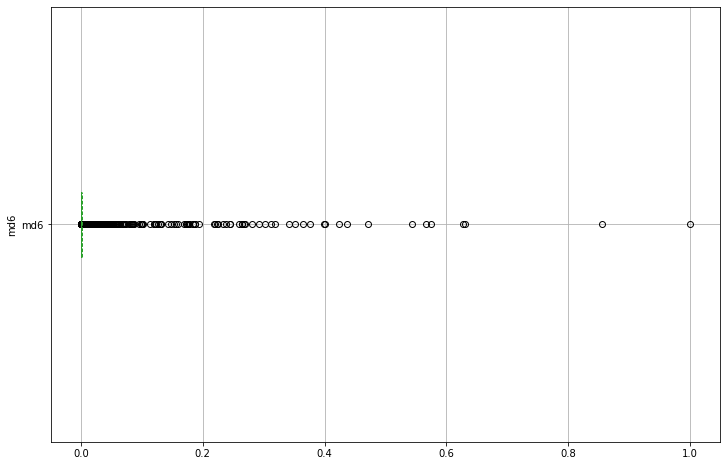

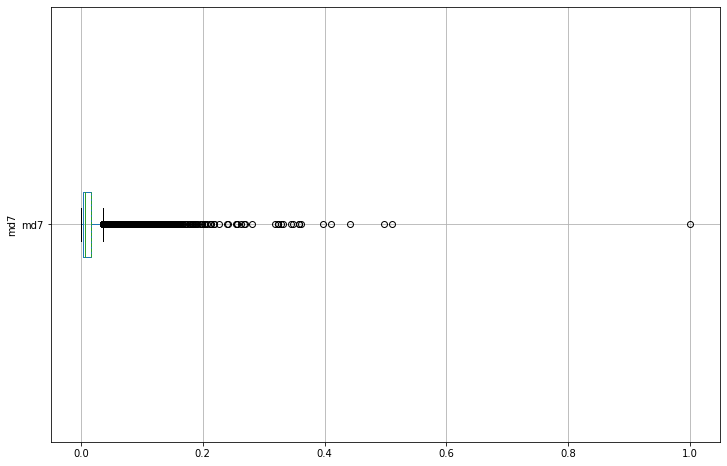

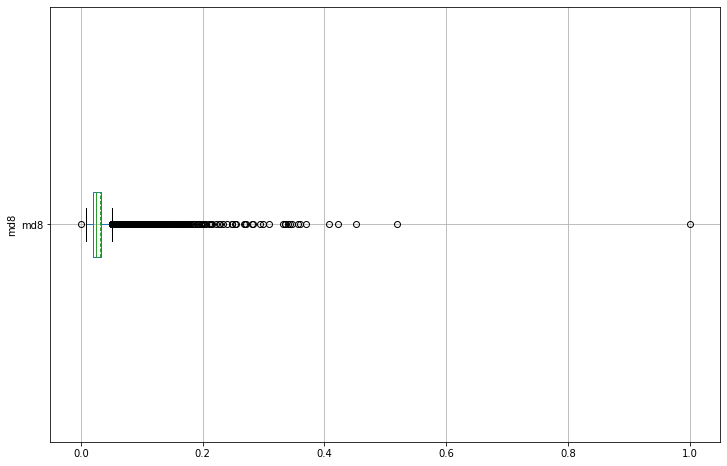

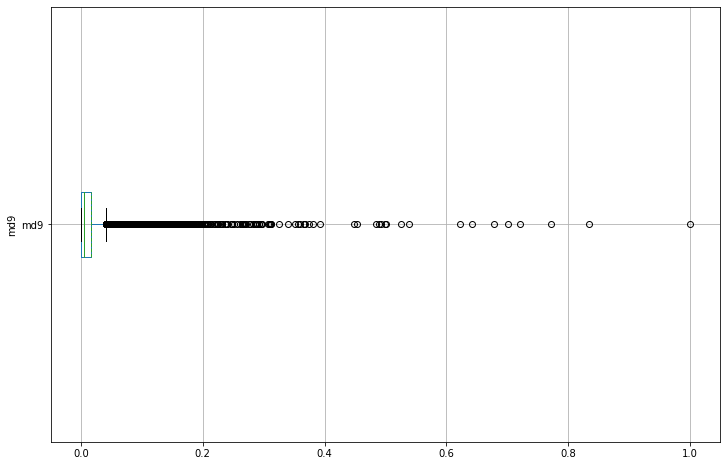

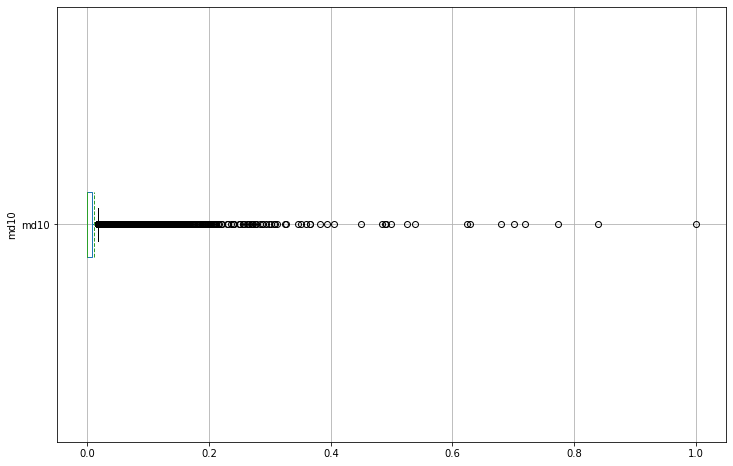

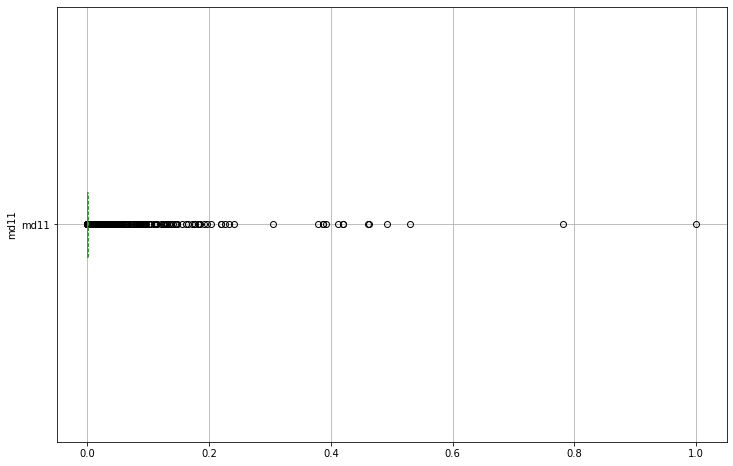

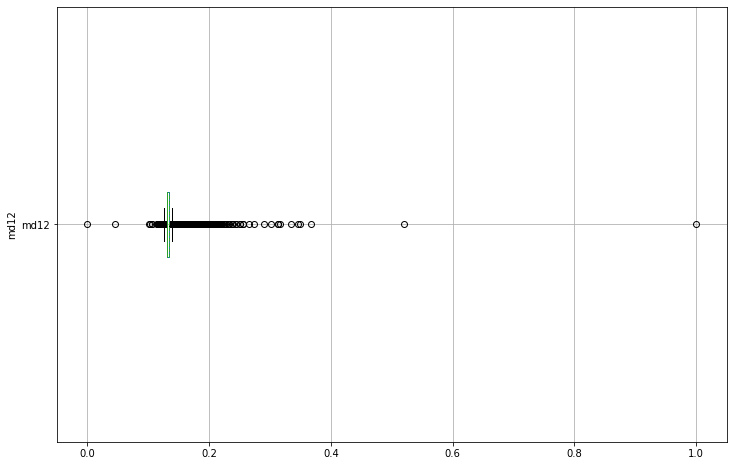

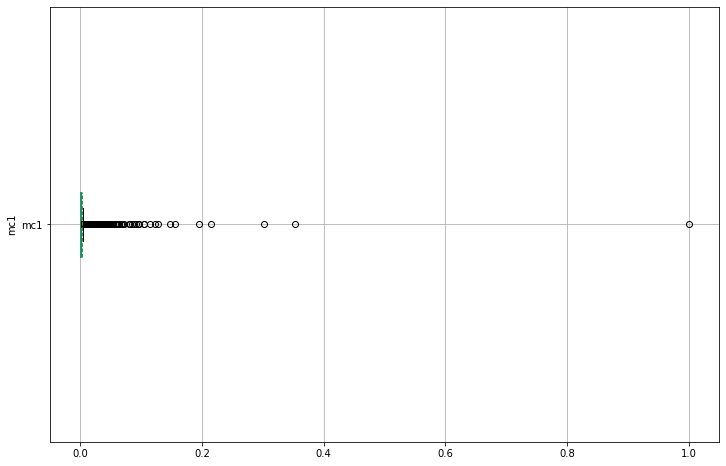

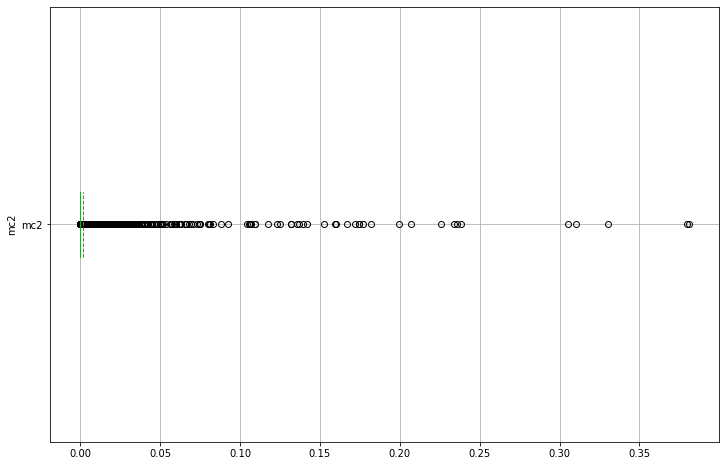

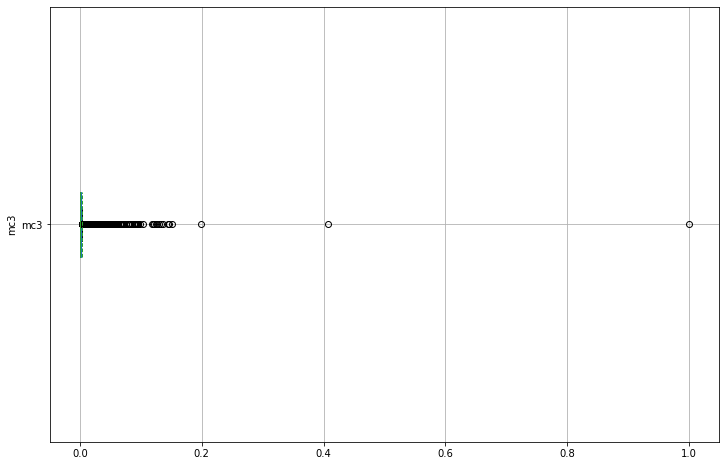

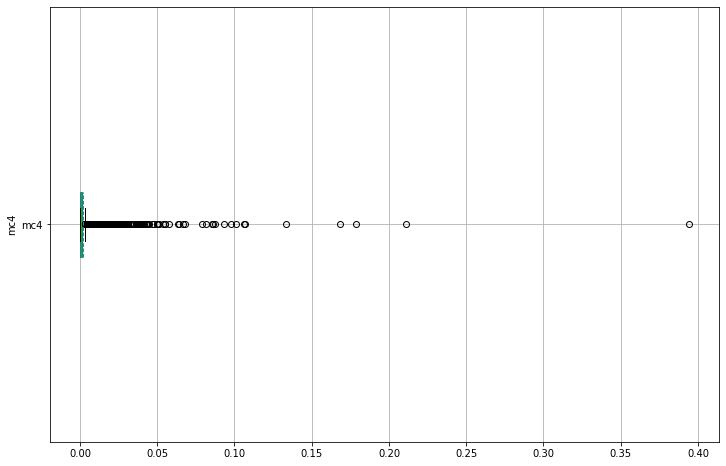

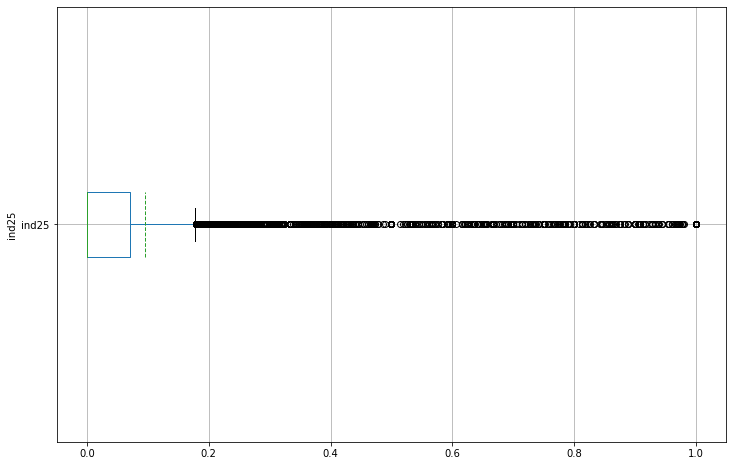

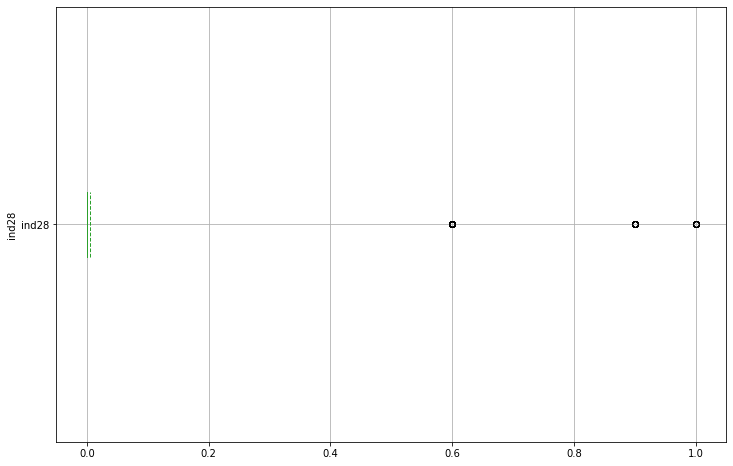

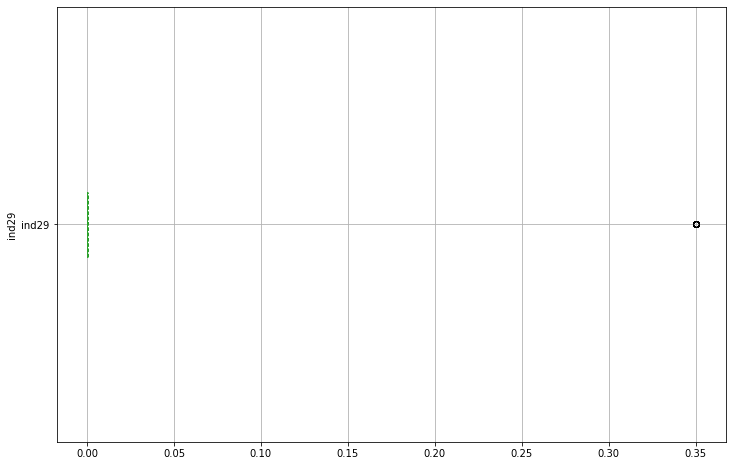

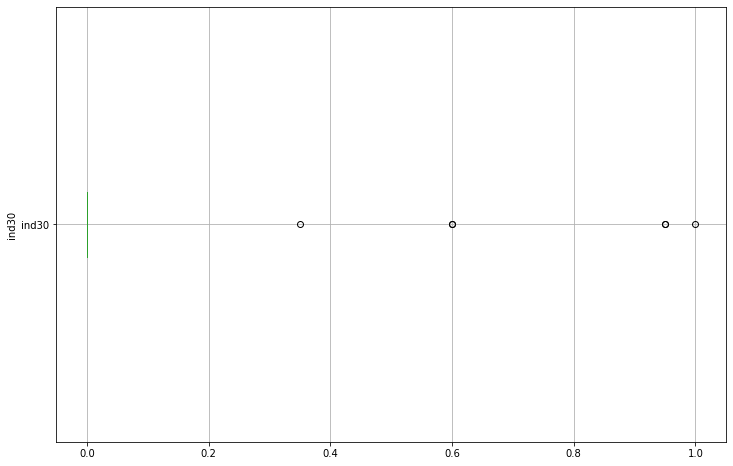

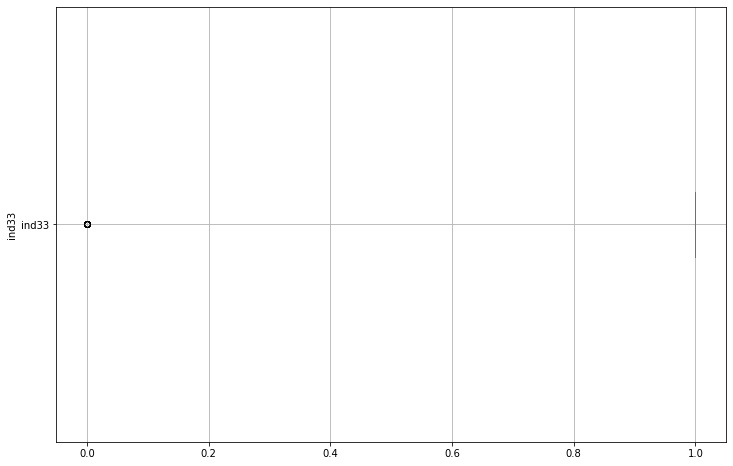

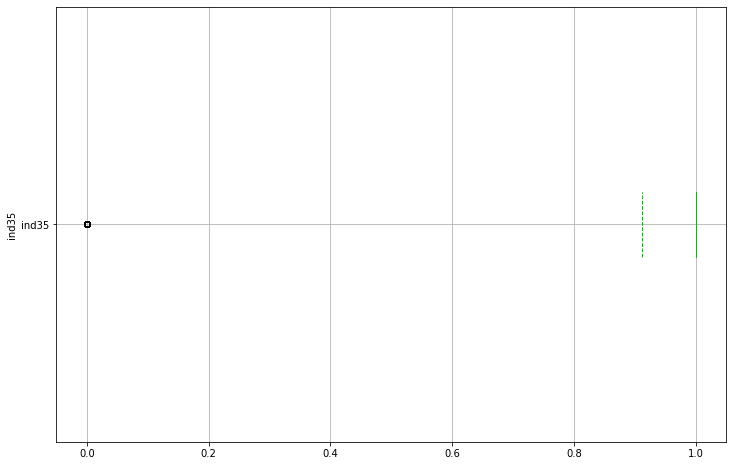

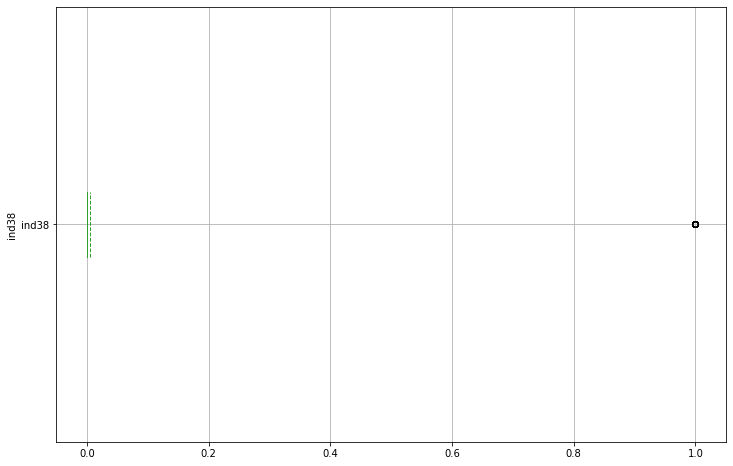

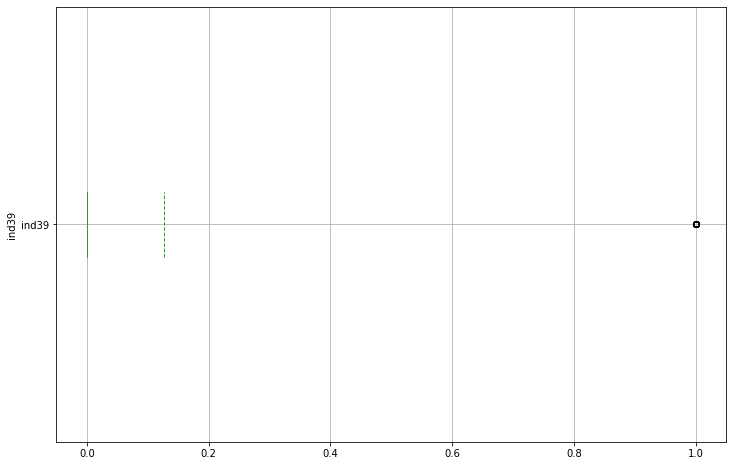

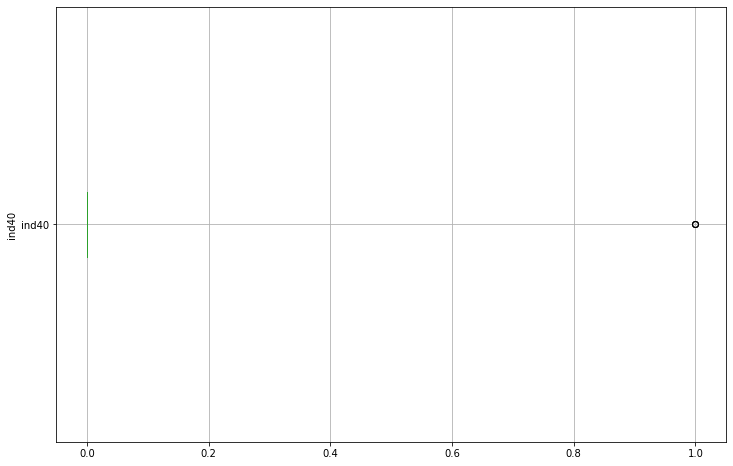

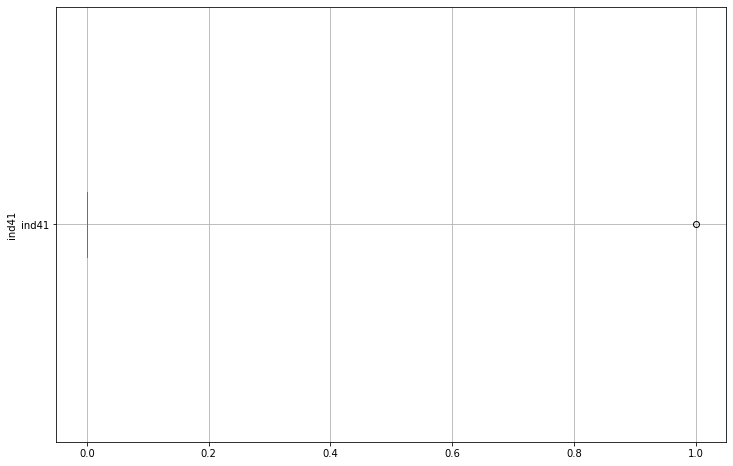

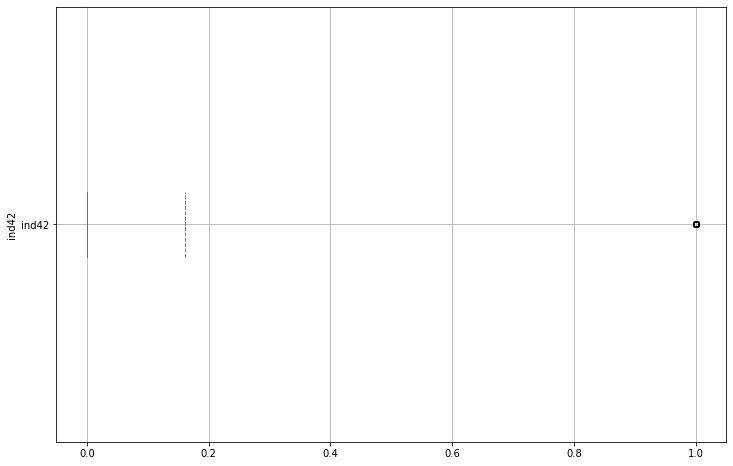

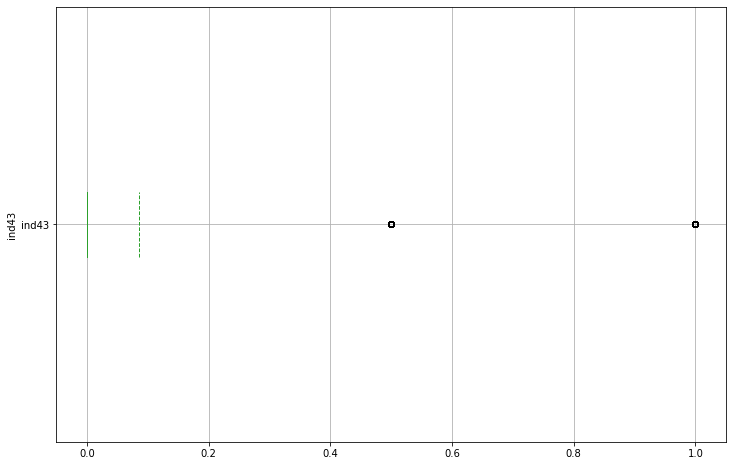

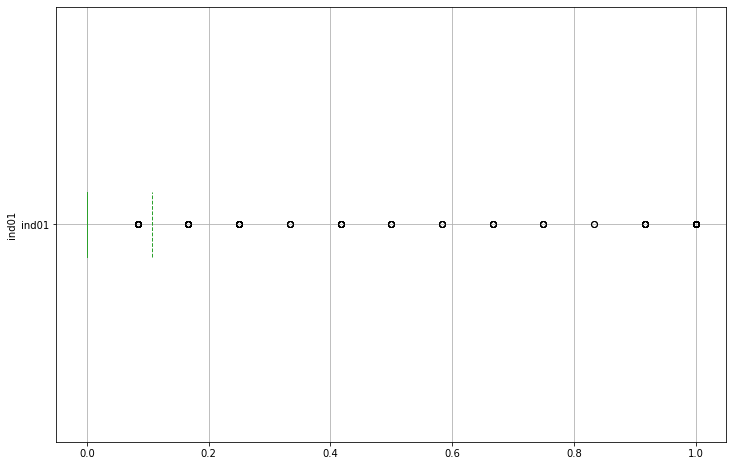

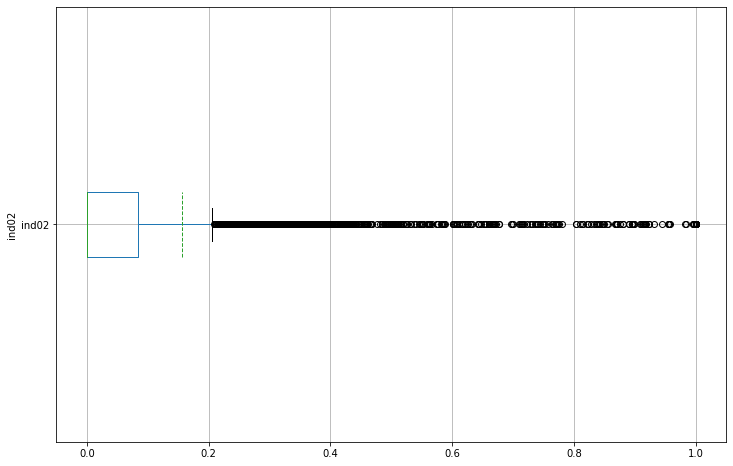

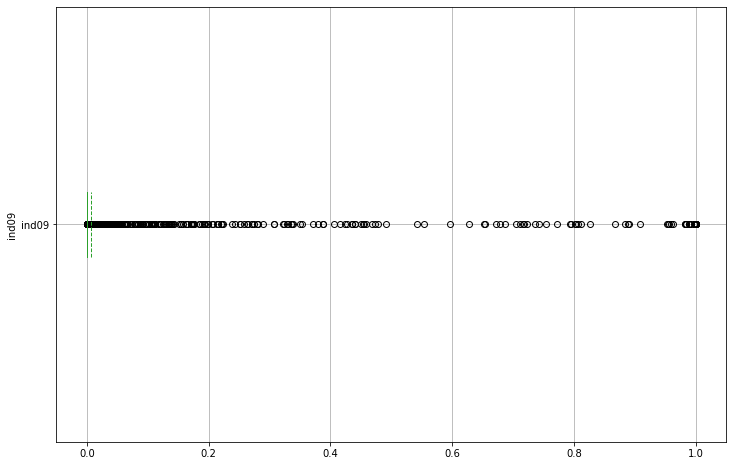

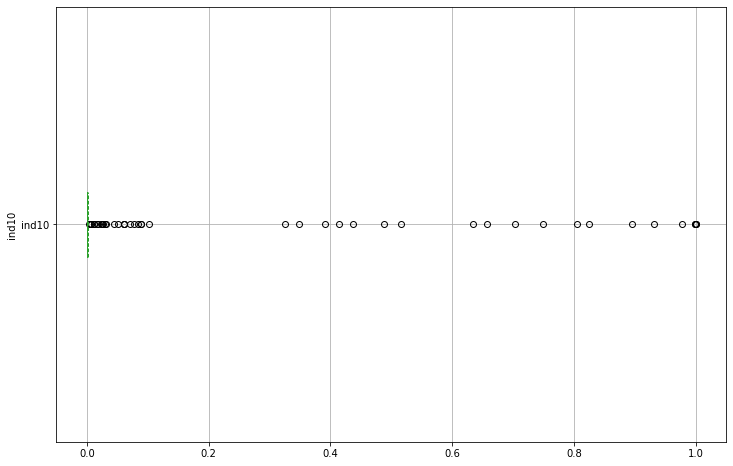

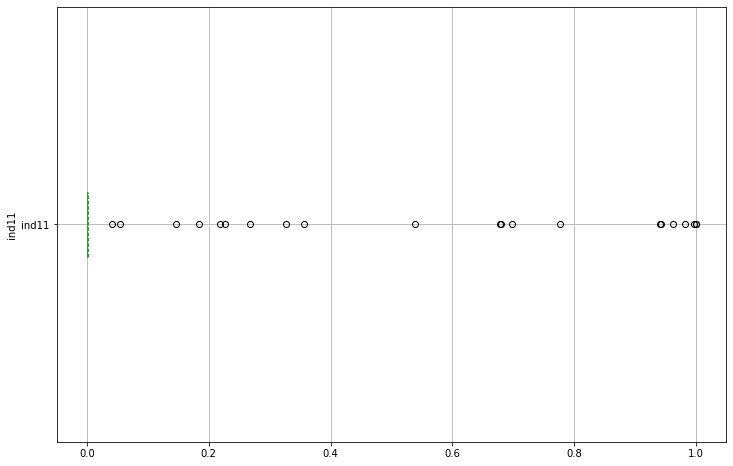

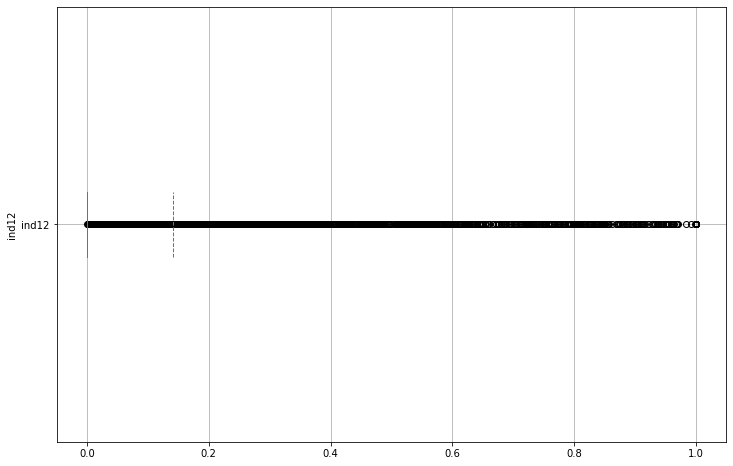

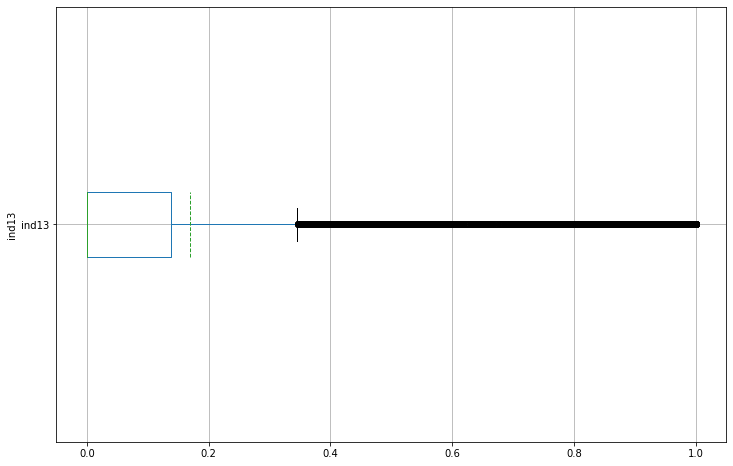

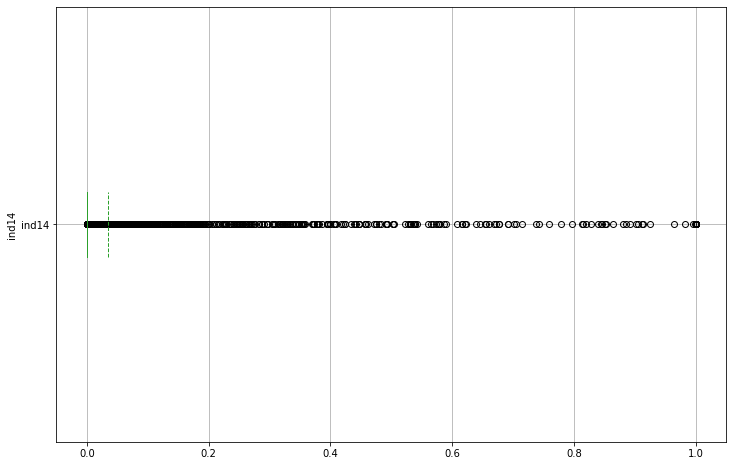

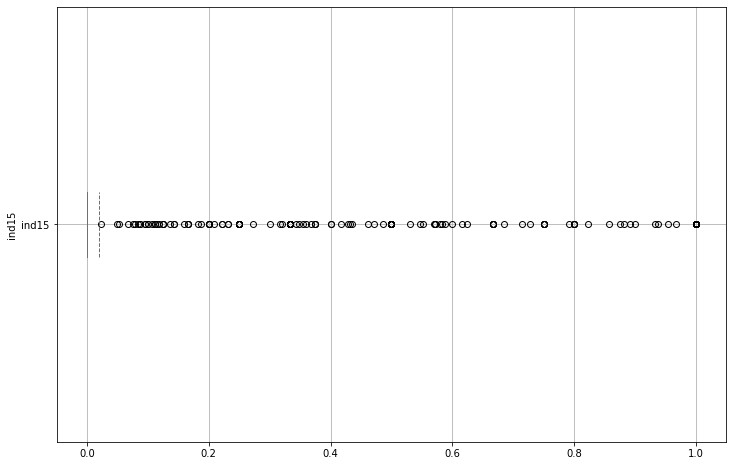

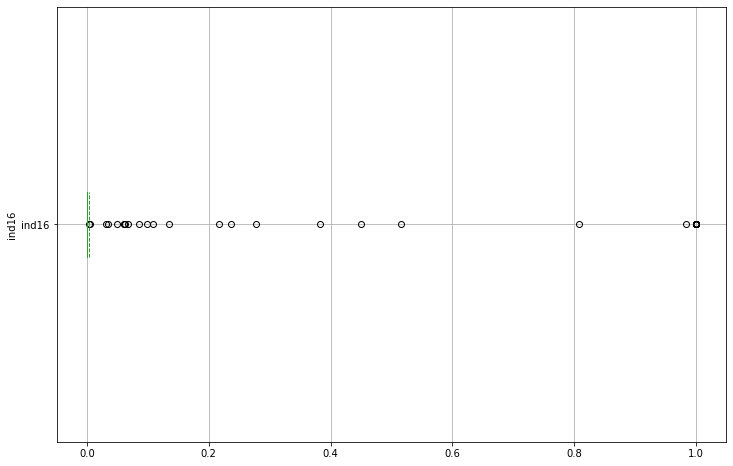

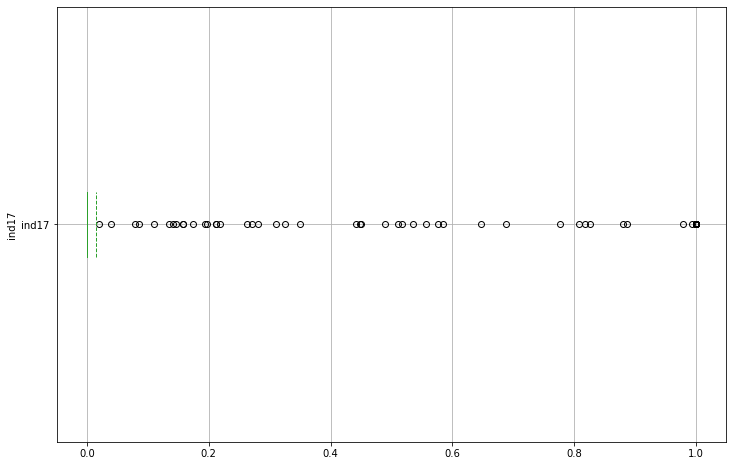

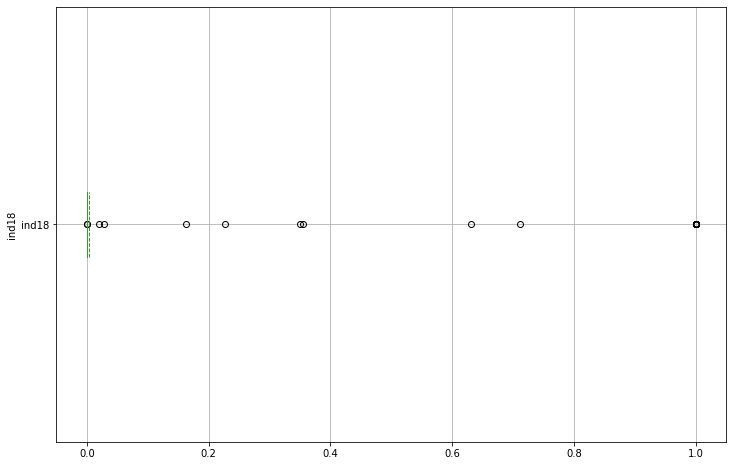

In [117]:
#ANTES DE TRATAR missing
#outliers na lsita geral
for y in l_geral_out_trei:
    df_rec_trei[[y]].plot(kind = 'box',showmeans = True, meanline = True,
                                   grid = True, figsize = (12,8),vert = False, ylabel = y)

In [115]:
for h in l_geral_out_trei:
    df_rec_trei, limite_superior_outliers, limite_inferior_outliers = trata_outliers(df=df_rec_trei, coluna=h)

++++++++
coluna: md1
IQR: 0.00603226914163212
Limite inferior para outlier: -0.009045826331565724; Limite superior para outliers: 0.015083250234962757
Media: 0.011669523491646034
++++++++
coluna: md2
IQR: 0.010317917138124827
Limite inferior para outlier: -0.013054929071653832; Limite superior para outliers: 0.028216739480845476
Media: 0.012927650570991408
++++++++
coluna: md3
IQR: 0.007825731774469255
Limite inferior para outlier: 0.0983384817153378; Limite superior para outliers: 0.12964140881321481
Media: 0.11826675569728777
++++++++
coluna: md4
IQR: 0.011236401576681609
Limite inferior para outlier: -0.01685460236502241; Limite superior para outliers: 0.02809100394170402
Media: 0.013957640580040268
++++++++
coluna: md5
IQR: 0.004188881583286521
Limite inferior para outlier: -0.006283322374929781; Limite superior para outliers: 0.0104722039582163
Media: 0.009200155175519746
++++++++
coluna: md6
IQR: 0.0
Limite inferior para outlier: 0.0; Limite superior para outliers: 0.0
Media: 0.0

In [116]:
df_rec_trei.columns

Index(['id', 'cnae2', 'rf2', 'md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7',
       ...
       'ind09_o', 'ind10_o', 'ind11_o', 'ind12_o', 'ind13_o', 'ind14_o',
       'ind15_o', 'ind16_o', 'ind17_o', 'ind18_o'],
      dtype='object', length=103)

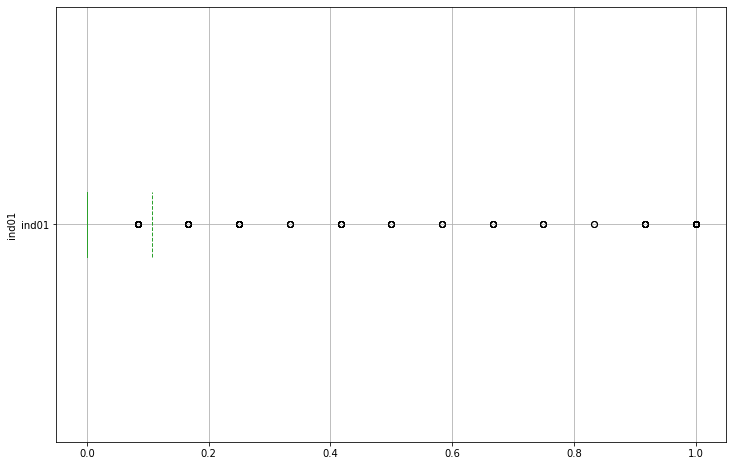

In [118]:
df_rec_trei[['ind01']].plot(kind = 'box',showmeans = True, meanline = True,
                      grid = True, figsize = (12,8),vert = False, ylabel = 'ind01')

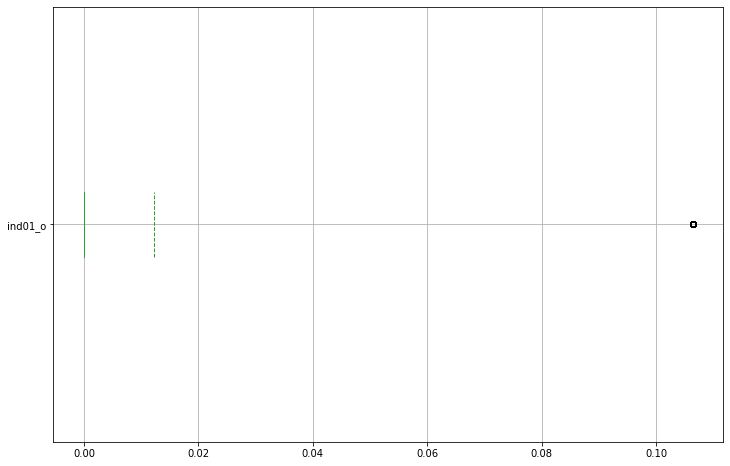

In [121]:
df_rec_trei[['ind01_o']].plot(kind = 'box',showmeans = True, meanline = True,
                      grid = True, figsize = (12,8),vert = False)

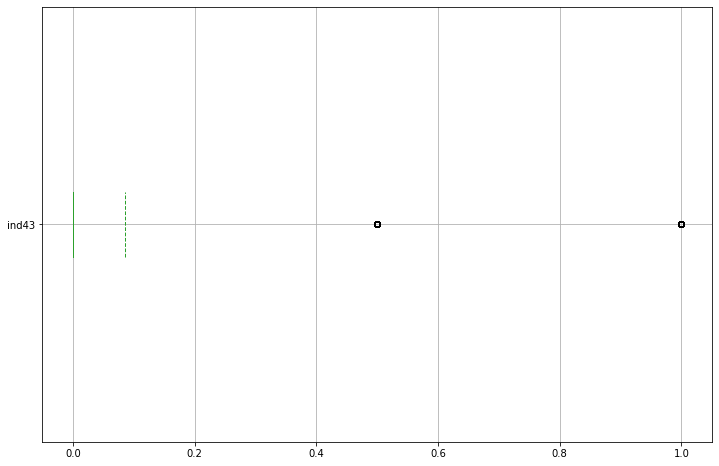

In [122]:
df_rec_trei[['ind43']].plot(kind = 'box',showmeans = True, meanline = True,
                      grid = True, figsize = (12,8),vert = False)

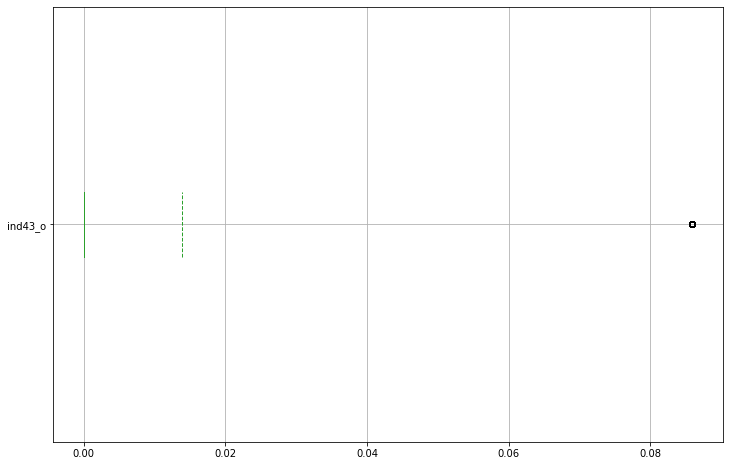

In [123]:
df_rec_trei[['ind43_o']].plot(kind = 'box',showmeans = True, meanline = True,
                      grid = True, figsize = (12,8),vert = False)

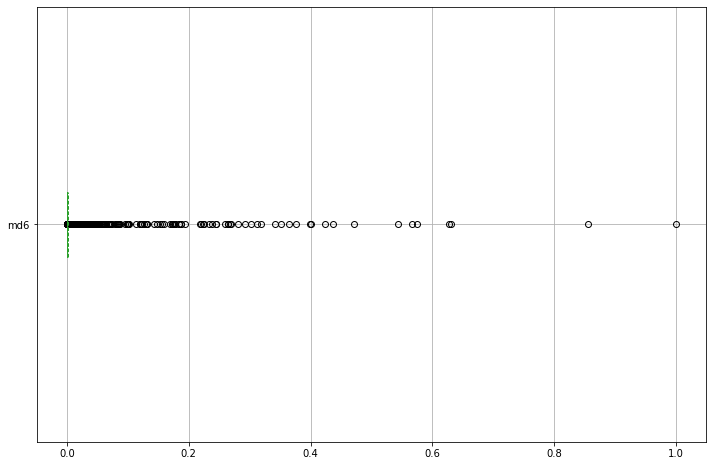

In [124]:
df_rec_trei[['md6']].plot(kind = 'box',showmeans = True, meanline = True,
                      grid = True, figsize = (12,8),vert = False)

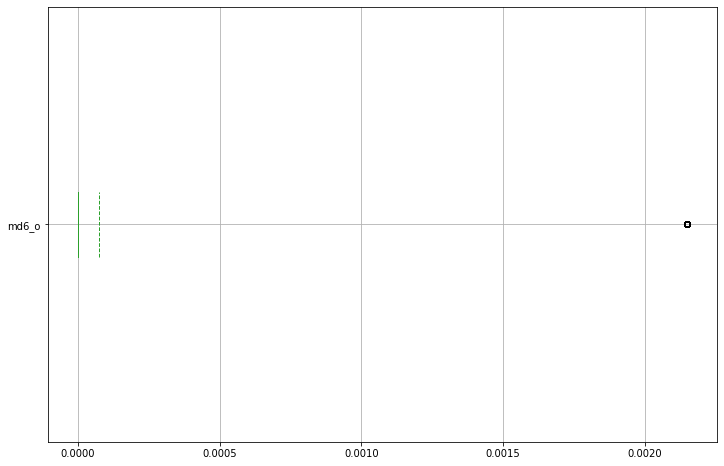

In [126]:
df_rec_trei[['md6_o']].plot(kind = 'box',showmeans = True, meanline = True,
                      grid = True, figsize = (12,8),vert = False)

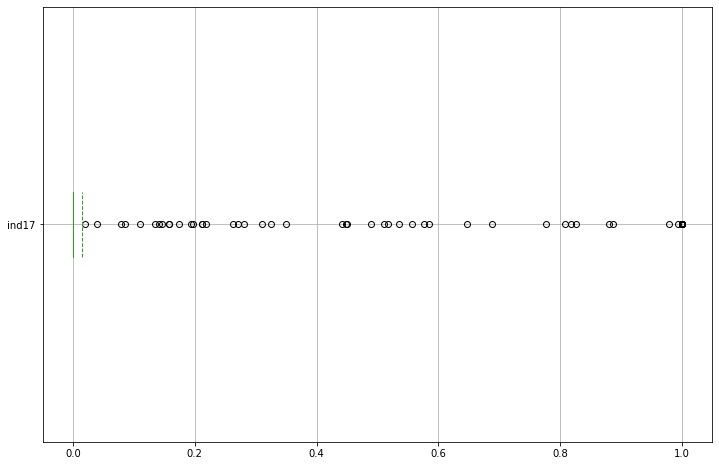

In [128]:
df_rec_trei[['ind17']].plot(kind = 'box',showmeans = True, meanline = True,
                      grid = True, figsize = (12,8),vert = False)

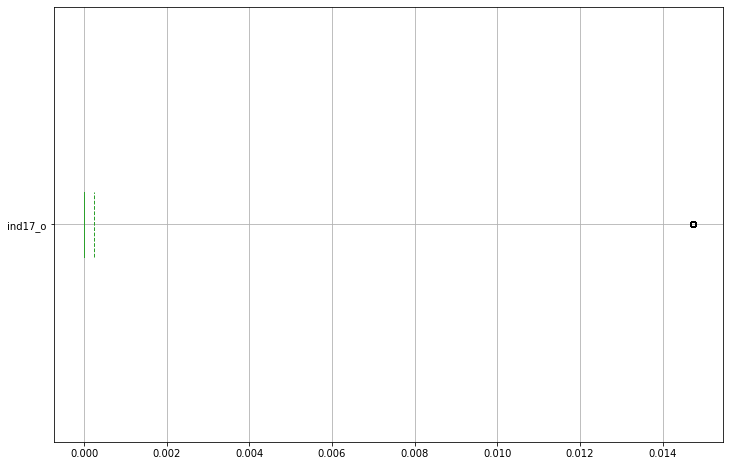

In [129]:
df_rec_trei[['ind17_o']].plot(kind = 'box',showmeans = True, meanline = True,
                      grid = True, figsize = (12,8),vert = False)

In [158]:
df_rec_trei

,id,cnae2,rf2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43,target,md1_o,md2_o,md3_o,md4_o,md5_o,md6_o,md7_o,md8_o,md9_o,md10_o,md11_o,md12_o,mc1_o,mc2_o,mc3_o,mc4_o,ind25_o,ind28_o,ind29_o,ind30_o,ind33_o,ind35_o,ind38_o,ind39_o,ind40_o,ind41_o,ind42_o,ind43_o,ind01_o,ind02_o,ind09_o,ind10_o,ind11_o,ind12_o,ind13_o,ind14_o,ind15_o,ind16_o,ind17_o,ind18_o
0,0,86,i,0.090339,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.009247,0.001729,0.000138,0.004412,0.0,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0,0.0,0.0,0.0,1.0,0.0000,0.0000,0.00,0.0000,0.0000,0.0976,0.0333,0.1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.011670,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.002267,0.001607,0.000138,0.001772,0.097600,0.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.028100,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,1,18,z,0.005996,0.019476,0.124770,0.000000,0.038168,0.0,0.029214,0.046445,0.000000,0.049919,0.0,0.149741,0.003186,0.007671,0.006943,0.003589,0.0,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.0,0.0,0.0856,0.0286,0.000,0.0,0.0,0.0,0.0,0.0,0.7625,1.0000,1.00,0.1429,0.2857,0.0000,0.4444,0.2222,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.005996,0.019476,0.124770,0.000000,0.009200,0.0,0.029214,0.046445,0.000000,0.011375,0.0,0.134558,0.003186,0.001607,0.002602,0.001772,0.000000,0.0,0.0,0.0,1.0,0.911266,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.140845,0.028600,0.000000,0.0,0.0,0.0,0.0
2,2,74,z,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000209,0.0,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0,0.0,0.0,0.0,1.0,1.0000,1.0000,1.00,1.0000,1.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000209,0.000000,0.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,3,49,q,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.142568,0.000438,0.000000,0.000042,0.000115,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,1.0000,0.2500,0.25,0.9167,0.9167,0.7857,0.1667,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.134558,0.000438,0.000000,0.000042,0.000115,0.094443,0.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,4,47,i,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.004829,0.006355,0.000719,0.0,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.0000,0.0000,0.000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5,0,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.001607,0.002602,0.000719,0.000000,0.0,0.0,0.0,1.0,1.000000,0.0,0.126892,0.0,0.0,0.161425,0.085969,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

###DF_trei sem missign e out

In [166]:
df_rec_trei.head()

,id,cnae2,rf2,md1,md2,md3,md4,md5,md6,md7,md8,md9,md10,md11,md12,mc1,mc2,mc3,mc4,ind01,ind02,ind03,ind04,ind05,ind06,ind07,ind08,ind09,ind10,ind11,ind12,ind13,ind14,ind15,ind16,ind17,ind18,ind19,ind20,ind21,ind22,ind23,ind24,ind25,ind26,ind27,ind28,ind29,ind30,ind31,ind32,ind33,ind34,ind35,ind36,ind37,ind38,ind39,ind40,ind41,ind42,ind43,target,md1_o,md2_o,md3_o,md4_o,md5_o,md6_o,md7_o,md8_o,md9_o,md10_o,md11_o,md12_o,mc1_o,mc2_o,mc3_o,mc4_o,ind25_o,ind28_o,ind29_o,ind30_o,ind33_o,ind35_o,ind38_o,ind39_o,ind40_o,ind41_o,ind42_o,ind43_o,ind01_o,ind02_o,ind09_o,ind10_o,ind11_o,ind12_o,ind13_o,ind14_o,ind15_o,ind16_o,ind17_o,ind18_o
0,0,86,i,0.090339,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.009247,0.001729,0.000138,0.004412,0.0,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0000,0.00,0.00,0.0000,0.0000,0.0976,0.0333,0.1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0.011670,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.002267,0.001607,0.000138,0.001772,0.097600,0.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0281,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0
1,1,18,z,0.005996,0.019476,0.124770,0.000000,0.038168,0.0,0.029214,0.046445,0.000000,0.049919,0.0,0.149741,0.003186,0.007671,0.006943,0.003589,0.0,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.0,0.0,0.0856,0.0286,0.0,0.0,0.0,0.0,0.0,0.0,0.7625,1.00,1.00,0.1429,0.2857,0.0000,0.4444,0.2222,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.005996,0.019476,0.124770,0.000000,0.009200,0.0,0.029214,0.046445,0.000000,0.011375,0.0,0.134558,0.003186,0.001607,0.002602,0.001772,0.000000,0.0,0.0,0.0,1.0,0.911266,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.0,0.140845,0.0286,0.0,0.0,0.0,0.0,0.0
2,2,74,z,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000209,0.0,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,1.0000,1.00,1.00,1.0000,1.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000209,0.000000,0.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0
3,3,49,q,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.142568,0.000438,0.000000,0.000042,0.000115,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.25,0.25,0.9167,0.9167,0.7857,0.1667,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.134558,0.000438,0.000000,0.000042,0.000115,0.094443,0.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0
4,4,47,i,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.004829,0.006355,0.000719,0.0,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.5,0,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.001607,0.002602,0.000719,0.000000,0.0,0.0,0.0,1.0,1.000000,0.0,0.126892,0.0,0.0,0.161425,0.085969,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0


In [167]:
#4 colunas (id, cnae, rf, target) + 59 = 63 / 59*2 = 118 ; 118+4 = 122 colunas
df_rec_trei.shape

(11033, 103)

In [168]:
df_rec_trei_antes_t = df_rec_trei.copy()

In [169]:
df_rec_trei_antes_t.columns

Index(['id', 'cnae2', 'rf2', 'md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7',
       ...
       'ind09_o', 'ind10_o', 'ind11_o', 'ind12_o', 'ind13_o', 'ind14_o',
       'ind15_o', 'ind16_o', 'ind17_o', 'ind18_o'],
      dtype='object', length=103)

In [171]:
df_rec_trei_antes_t.drop(columns = ['md1','md2', 'md3', 'md4', 'md5', 'md6', 'md7', 'md8', 'md9', 'md10', 'md11',
                                    'md12', 'mc1', 'mc2', 'mc3', 'mc4', 'ind01',	'ind02',	'ind09', 	'ind10',
                                    'ind11', 	'ind12',	'ind13',	'ind14',	'ind15',	'ind16',	'ind17',	'ind18',
                                    'ind25',	'ind28',	'ind29', 'ind30',	'ind33',	'ind35','ind38',	'ind39',	'ind40',	'ind41',	'ind42',	'ind43'], inplace=True)

In [172]:
df_rec_trei_antes_t

,id,cnae2,rf2,ind03,ind04,ind05,ind06,ind07,ind08,ind19,ind20,ind21,ind22,ind23,ind24,ind26,ind27,ind31,ind32,ind34,ind36,ind37,target,md1_o,md2_o,md3_o,md4_o,md5_o,md6_o,md7_o,md8_o,md9_o,md10_o,md11_o,md12_o,mc1_o,mc2_o,mc3_o,mc4_o,ind25_o,ind28_o,ind29_o,ind30_o,ind33_o,ind35_o,ind38_o,ind39_o,ind40_o,ind41_o,ind42_o,ind43_o,ind01_o,ind02_o,ind09_o,ind10_o,ind11_o,ind12_o,ind13_o,ind14_o,ind15_o,ind16_o,ind17_o,ind18_o
0,0,86,i,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0,0.0000,0.0000,0.00,0.0000,0.0000,0.0333,0.1000,0.0,0.0,0.0,1.0,1.0,1,0.011670,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.002267,0.001607,0.000138,0.001772,0.097600,0.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.028100,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,1,18,z,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.7625,1.0000,1.00,0.1429,0.2857,0.4444,0.2222,1.0,0.0,1.0,1.0,0.0,0,0.005996,0.019476,0.124770,0.000000,0.009200,0.0,0.029214,0.046445,0.000000,0.011375,0.0,0.134558,0.003186,0.001607,0.002602,0.001772,0.000000,0.0,0.0,0.0,1.0,0.911266,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.140845,0.028600,0.000000,0.0,0.0,0.0,0.0
2,2,74,z,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,1.0,1.0000,1.0000,1.00,1.0000,1.0000,1.0000,1.0000,1.0,1.0,1.0,1.0,1.0,0,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000209,0.000000,0.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,3,49,q,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,1.0000,0.2500,0.25,0.9167,0.9167,0.1667,0.1667,0.0,0.0,0.0,0.0,1.0,0,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.134558,0.000438,0.000000,0.000042,0.000115,0.094443,0.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,4,47,i,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.001607,0.002602,0.000719,0.000000,0.0,0.0,0.0,1.0,1.000000,0.0,0.126892,0.0,0.0,0.161425,0.085969,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,12026,23,s,1.0,1.0000,1.0000,0.0000,0.0000,0.0000,1.0,0.0000,1.0000,1.00,1.0000,1.0000,1.0000,0.1667,1.0,0.0,1.0,1.0,0.0,0,0.000000,0.001208,0.109509,0.000000,0.000729,0.0,0.001812,0.019529,0.000000,0.001546,0.0,0.130852,0.000382,0.000000,0.000355,0.000411,0.000000,0.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.106393,0.156942,0.0,0.0,0.0,0.000000,0.128900,0.000000,0.0,0.0,0.0,0.0
11029,12027,49,v,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.8333,0.50,0.0000,0.0000,0.9167,0.1667,0.0,0.0,0.0,0.0,0.0,0,0.000003,0.016780,0.122363,0.006032,0.006032,0.0,0.016780,0.034232,0.012331,0.012330,0.0,0.134558,0.000988,0.000000,0.001029,0.002252,0.125000,0.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
11030,12030,47,y,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,1.0,1.0000,1.0000,1.00,1.0000,1.0000,1.0000,1.0000,1.0,1.0,1.0,1.0,0.0,1,0.000004,0.001179,0.109494,0.000000,0.000000,0.0,0.001531,0.019253,0.000000,0.000000,0.0,0.130769,0.000295,0.000000,0.000407,0.000392,0.000000,0.0,0.0,0.0,1.0,0.911266,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.106393,0.156942,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
11031,12031,47,p,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0,1.0000,0.2500,0.25,0.0000,

In [173]:
df_rec_trei_antes_t.columns[:64]

Index(['id', 'cnae2', 'rf2', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07',
       'ind08', 'ind19', 'ind20', 'ind21', 'ind22', 'ind23', 'ind24', 'ind26',
       'ind27', 'ind31', 'ind32', 'ind34', 'ind36', 'ind37', 'target', 'md1_o',
       'md2_o', 'md3_o', 'md4_o', 'md5_o', 'md6_o', 'md7_o', 'md8_o', 'md9_o',
       'md10_o', 'md11_o', 'md12_o', 'mc1_o', 'mc2_o', 'mc3_o', 'mc4_o',
       'ind25_o', 'ind28_o', 'ind29_o', 'ind30_o', 'ind33_o', 'ind35_o',
       'ind38_o', 'ind39_o', 'ind40_o', 'ind41_o', 'ind42_o', 'ind43_o',
       'ind01_o', 'ind02_o', 'ind09_o', 'ind10_o', 'ind11_o', 'ind12_o',
       'ind13_o', 'ind14_o', 'ind15_o', 'ind16_o', 'ind17_o', 'ind18_o'],
      dtype='object')

In [154]:
df_rec_trei_antes_t[['rf2']].value_counts()

rf2
z      3320
s      1379
k      1134
y       861
i       861
r       850
d       786
p       666
q       637
v       539
dtype: int64

In [174]:
df_rec_trei_antes_t.rf2.replace(['z','s','k','y','i','r','d','p','q','v'], [1,2,3,4,5,6,7,8,9,10], inplace=True)

In [175]:
df_rec_trei_antes_t

,id,cnae2,rf2,ind03,ind04,ind05,ind06,ind07,ind08,ind19,ind20,ind21,ind22,ind23,ind24,ind26,ind27,ind31,ind32,ind34,ind36,ind37,target,md1_o,md2_o,md3_o,md4_o,md5_o,md6_o,md7_o,md8_o,md9_o,md10_o,md11_o,md12_o,mc1_o,mc2_o,mc3_o,mc4_o,ind25_o,ind28_o,ind29_o,ind30_o,ind33_o,ind35_o,ind38_o,ind39_o,ind40_o,ind41_o,ind42_o,ind43_o,ind01_o,ind02_o,ind09_o,ind10_o,ind11_o,ind12_o,ind13_o,ind14_o,ind15_o,ind16_o,ind17_o,ind18_o
0,0,86,5,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0,0.0000,0.0000,0.00,0.0000,0.0000,0.0333,0.1000,0.0,0.0,0.0,1.0,1.0,1,0.011670,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.002267,0.001607,0.000138,0.001772,0.097600,0.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.028100,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,1,18,1,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.7625,1.0000,1.00,0.1429,0.2857,0.4444,0.2222,1.0,0.0,1.0,1.0,0.0,0,0.005996,0.019476,0.124770,0.000000,0.009200,0.0,0.029214,0.046445,0.000000,0.011375,0.0,0.134558,0.003186,0.001607,0.002602,0.001772,0.000000,0.0,0.0,0.0,1.0,0.911266,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.140845,0.028600,0.000000,0.0,0.0,0.0,0.0
2,2,74,1,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,1.0,1.0000,1.0000,1.00,1.0000,1.0000,1.0000,1.0000,1.0,1.0,1.0,1.0,1.0,0,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000209,0.000000,0.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
3,3,49,9,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,1.0000,0.2500,0.25,0.9167,0.9167,0.1667,0.1667,0.0,0.0,0.0,0.0,1.0,0,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.134558,0.000438,0.000000,0.000042,0.000115,0.094443,0.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
4,4,47,5,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0000,0.0000,0.00,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.001607,0.002602,0.000719,0.000000,0.0,0.0,0.0,1.0,1.000000,0.0,0.126892,0.0,0.0,0.161425,0.085969,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,12026,23,2,1.0,1.0000,1.0000,0.0000,0.0000,0.0000,1.0,0.0000,1.0000,1.00,1.0000,1.0000,1.0000,0.1667,1.0,0.0,1.0,1.0,0.0,0,0.000000,0.001208,0.109509,0.000000,0.000729,0.0,0.001812,0.019529,0.000000,0.001546,0.0,0.130852,0.000382,0.000000,0.000355,0.000411,0.000000,0.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.106393,0.156942,0.0,0.0,0.0,0.000000,0.128900,0.000000,0.0,0.0,0.0,0.0
11029,12027,49,10,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0000,0.8333,0.50,0.0000,0.0000,0.9167,0.1667,0.0,0.0,0.0,0.0,0.0,0,0.000003,0.016780,0.122363,0.006032,0.006032,0.0,0.016780,0.034232,0.012331,0.012330,0.0,0.134558,0.000988,0.000000,0.001029,0.002252,0.125000,0.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
11030,12030,47,4,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,1.0,1.0000,1.0000,1.00,1.0000,1.0000,1.0000,1.0000,1.0,1.0,1.0,1.0,0.0,1,0.000004,0.001179,0.109494,0.000000,0.000000,0.0,0.001531,0.019253,0.000000,0.000000,0.0,0.130769,0.000295,0.000000,0.000407,0.000392,0.000000,0.0,0.0,0.0,1.0,0.911266,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.106393,0.156942,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
11031,12031,47,8,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0,1.0000,0.2500,0.25,0.0000

In [140]:
'''df1 = df_rec_trei_antes_t[['id',	'cnae2',	'rf2']].copy()

In [141]:
'''df1.head()

,id,cnae2,rf2
0,0,86,5
1,1,18,1
2,2,74,1
3,3,49,9
4,4,47,5


In [165]:
df_rec_trei_antes_t.columns[:40]

Index(['id', 'cnae2', 'rf2', 'md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7',
       'md8', 'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4',
       'ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20', 'ind21'],
      dtype='object')

In [157]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [143]:
df_rec_trei_st = ss.fit_transform(df_rec_trei_antes_t)
df_rec_trei_st = pd.DataFrame(df1_rec_trei_st, columns = ['id', 'cnae2', 'rf2'])

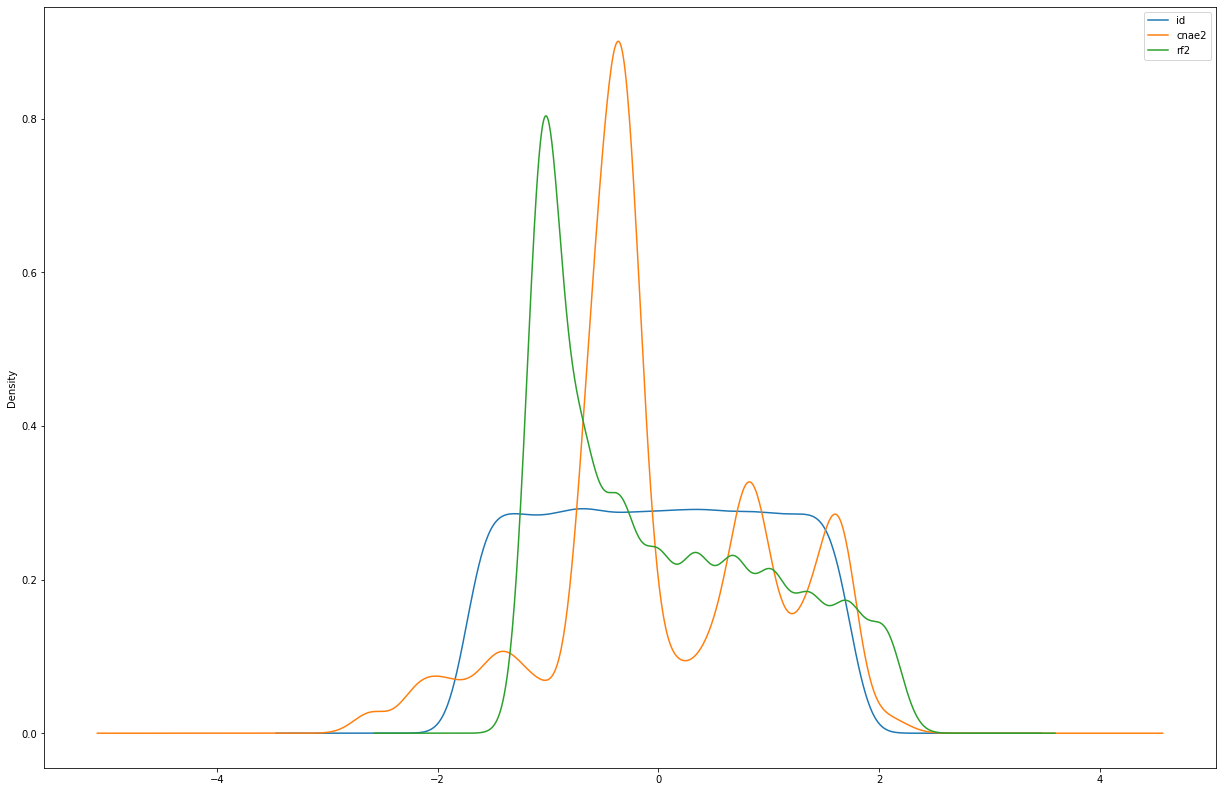

In [144]:
df_df1_st.plot(kind = 'kde', figsize=(21,14))

In [145]:
df_df1_st.head()

,id,cnae2,rf2
0,-1.730870,1.654273,0.338212
1,-1.730582,-1.765493,-1.033283
2,-1.730293,1.050785,-1.033283
3,-1.730005,-0.206482,1.709708
4,-1.729717,-0.307064,0.338212


In [146]:
df_rec_trei_antes_t['id']= df_df1_st['id'].copy()
df_rec_trei_antes_t['cnae2'] =df_df1_st['cnae2'].copy()
df_rec_trei_antes_t['rf2'] = df_df1_st['rf2'].copy()

In [147]:
df_rec_trei_antes_t.head()

,id,cnae2,rf2,target,md1_o,md2_o,md3_o,md4_o,md5_o,md6_o,md7_o,md8_o,md9_o,md10_o,md11_o,md12_o,mc1_o,mc2_o,mc3_o,mc4_o,ind25_o,ind28_o,ind29_o,ind30_o,ind33_o,ind35_o,ind38_o,ind39_o,ind40_o,ind41_o,ind42_o,ind43_o,ind01_o,ind02_o,ind09_o,ind10_o,ind11_o,ind12_o,ind13_o,ind14_o,ind15_o,ind16_o,ind17_o,ind18_o
0,-1.730870,1.654273,0.338212,1,0.011670,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.002267,0.001607,0.000138,0.001772,0.097600,0.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0281,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0
1,-1.730582,-1.765493,-1.033283,0,0.005996,0.019476,0.124770,0.000000,0.009200,0.0,0.029214,0.046445,0.000000,0.011375,0.0,0.134558,0.003186,0.001607,0.002602,0.001772,0.000000,0.0,0.0,0.0,1.0,0.911266,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.0,0.140845,0.0286,0.0,0.0,0.0,0.0,0.0
2,-1.730293,1.050785,-1.033283,0,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000209,0.000000,0.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0
3,-1.730005,-0.206482,1.709708,0,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.134558,0.000438,0.000000,0.000042,0.000115,0.094443,0.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0
4,-1.729717,-0.307064,0.338212,0,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.001607,0.002602,0.000719,0.000000,0.0,0.0,0.0,1.0,1.000000,0.0,0.126892,0.0,0.0,0.161425,0.085969,0.0,0.0000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0


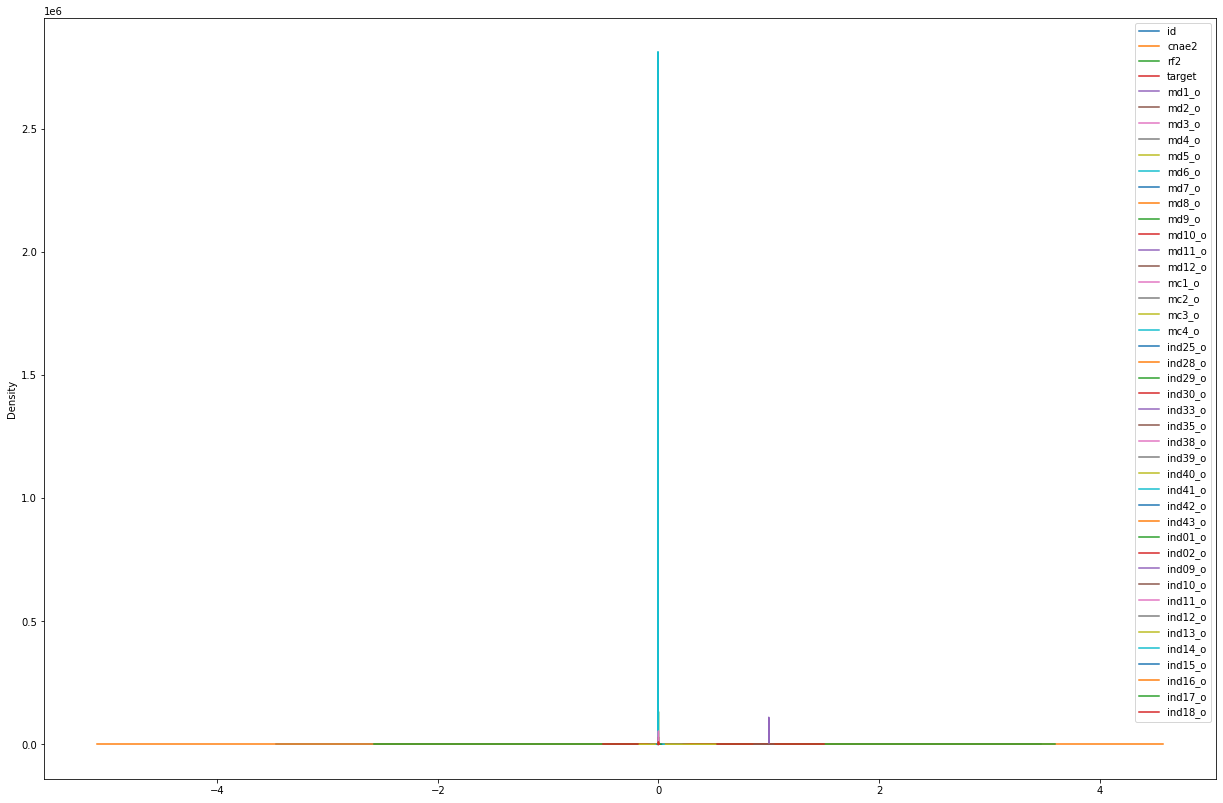

In [148]:
df_rec_trei_antes_t.plot(kind = 'kde', figsize=(21,14))

In [ ]:
'''l = ['id', 'cnae2', 'rf2', 'target', 'md1_o', 'md2_o', 'md3_o', 'md4_o',
       'md5_o', 'md6_o', 'md7_o', 'md8_o', 'md9_o', 'md10_o', 'md11_o',
       'md12_o', 'mc1_o', 'mc2_o', 'mc3_o', 'mc4_o', 'ind01_o', 'ind02_o',
       'ind03_o', 'ind04_o', 'ind05_o', 'ind06_o', 'ind07_o', 'ind08_o',
       'ind09_o', 'ind10_o', 'ind11_o', 'ind12_o', 'ind13_o', 'ind14_o',
       'ind15_o', 'ind16_o', 'ind17_o', 'ind18_o', 'ind19_o', 'ind20_o',
       'ind21_o', 'ind22_o', 'ind23_o', 'ind24_o', 'ind25_o', 'ind26_o',
       'ind27_o', 'ind28_o', 'ind29_o', 'ind30_o', 'ind31_o', 'ind32_o',
       'ind33_o', 'ind34_o', 'ind35_o', 'ind36_o', 'ind37_o', 'ind38_o',
       'ind39_o', 'ind40_o', 'ind41_o', 'ind42_o', 'ind43_o']

In [ ]:
'''from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [ ]:
'''rec_trei_st = ss.fit_transform(df_rec_trei_antes_t)
df_rec_trei_st = pd.DataFrame(rec_trei_st, columns = ['id', 'cnae2', 'rf2', 'target', 'md1_o', 'md2_o', 'md3_o', 'md4_o',
       'md5_o', 'md6_o', 'md7_o', 'md8_o', 'md9_o', 'md10_o', 'md11_o',
       'md12_o', 'mc1_o', 'mc2_o', 'mc3_o', 'mc4_o', 'ind01_o', 'ind02_o',
       'ind03_o', 'ind04_o', 'ind05_o', 'ind06_o', 'ind07_o', 'ind08_o',
       'ind09_o', 'ind10_o', 'ind11_o', 'ind12_o', 'ind13_o', 'ind14_o',
       'ind15_o', 'ind16_o', 'ind17_o', 'ind18_o', 'ind19_o', 'ind20_o',
       'ind21_o', 'ind22_o', 'ind23_o', 'ind24_o', 'ind25_o', 'ind26_o',
       'ind27_o', 'ind28_o', 'ind29_o', 'ind30_o', 'ind31_o', 'ind32_o',
       'ind33_o', 'ind34_o', 'ind35_o', 'ind36_o', 'ind37_o', 'ind38_o',
       'ind39_o', 'ind40_o', 'ind41_o', 'ind42_o', 'ind43_o'])

# Gráfico


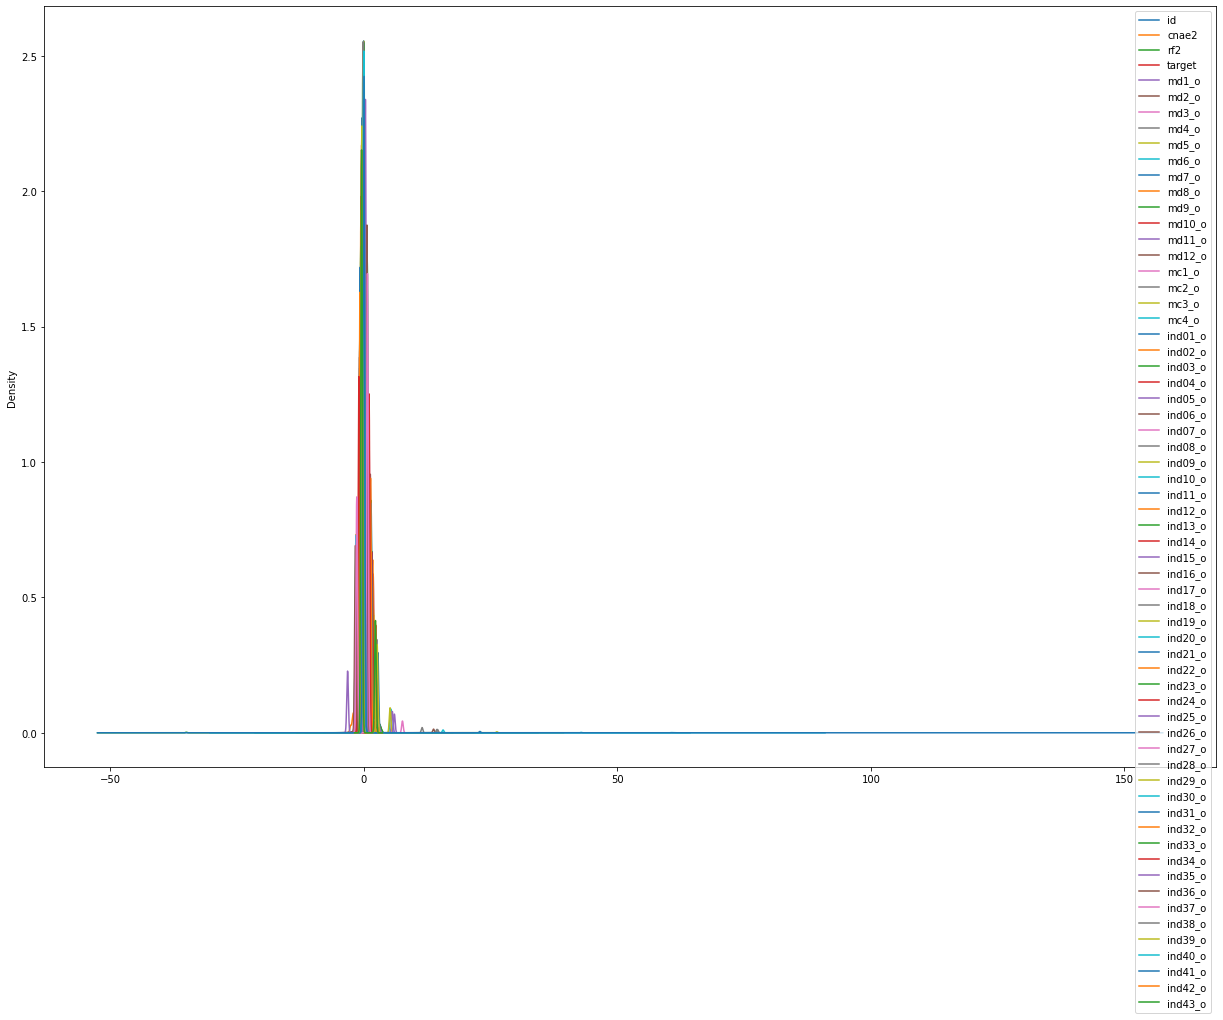

In [ ]:
'''df_rec_trei_st.plot(kind = 'kde', figsize=(21,14))

In [ ]:
df_rec_trei_st

,id,cnae2,rf2,target,md1_o,md2_o,md3_o,md4_o,md5_o,md6_o,md7_o,md8_o,md9_o,md10_o,md11_o,md12_o,mc1_o,mc2_o,mc3_o,mc4_o,ind01_o,ind02_o,ind03_o,ind04_o,ind05_o,ind06_o,ind07_o,ind08_o,ind09_o,ind10_o,ind11_o,ind12_o,ind13_o,ind14_o,ind15_o,ind16_o,ind17_o,ind18_o,ind19_o,ind20_o,ind21_o,ind22_o,ind23_o,ind24_o,ind25_o,ind26_o,ind27_o,ind28_o,ind29_o,ind30_o,ind31_o,ind32_o,ind33_o,ind34_o,ind35_o,ind36_o,ind37_o,ind38_o,ind39_o,ind40_o,ind41_o,ind42_o,ind43_o
0,-1.730870,1.654273,0.338212,1.837981,1.798419,0.615792,-0.595287,-0.367558,0.225527,-0.188609,0.870152,-0.749442,-0.403579,0.194521,-0.178045,-0.672982,1.431576,2.538635,-0.555053,1.280758,-0.360991,-0.261178,-0.735539,-0.806095,-0.841568,-0.839062,-0.707050,-0.804816,-0.1932,-0.063995,-0.043669,-0.575641,-0.608761,-0.427828,-0.166037,-0.072696,-0.131306,-0.068815,0.673623,-1.556934,-1.251442,-1.233288,-0.748753,-0.735491,1.452220,-1.318588,-1.146977,-0.087063,-0.038109,-0.023326,-0.701970,-0.760228,0.028573,-0.975378,0.312048,0.607337,0.716694,-0.069476,-0.381227,-0.016492,-0.009521,-0.438747,-0.438747
1,-1.730582,-1.765493,-1.033283,-0.544075,0.580178,1.953502,2.321880,-0.844328,1.898804,-0.188609,2.505658,2.770144,-0.882126,1.580670,-0.178045,1.139848,2.368524,2.538635,1.851280,1.280758,-0.360991,-0.693879,1.392895,0.117190,0.092937,0.655969,-0.689384,-0.787562,-0.1932,-0.063995,-0.043669,1.737194,-0.260043,-0.427828,-0.166037,-0.072696,-0.131306,-0.068815,-1.540288,0.136321,0.946130,0.956324,-0.415572,-0.069378,-0.670530,-0.351164,-0.852014,-0.087063,-0.038109,-0.023326,1.424563,-0.760228,0.028573,1.025244,-3.204631,0.607337,-1.395295,-0.069476,-0.381227,-0.016492,-0.009521,-0.438747,-0.438747
2,-1.730293,1.050785,-1.033283,-0.544075,-0.706256,-0.743640,-0.794712,-0.508947,-0.043338,-0.188609,-0.843823,-0.891606,-0.552146,-0.091399,-0.178045,-0.935039,-0.864361,-0.393912,-0.641343,-0.643141,-0.360991,-0.693879,1.392895,1.409612,1.386627,1.276149,-0.707050,-0.804816,-0.1932,-0.063995,-0.043669,-0.575641,-0.608761,-0.427828,-0.166037,-0.072696,-0.131306,-0.068815,0.673623,0.663728,0.946130,0.956324,1.582814,1.596020,-0.670530,0.956307,1.025420,-0.087063,-0.038109,-0.023326,1.424563,1.315395,0.028573,1.025244,0.312048,0.607337,0.716694,-0.069476,-0.381227,-0.016492,-0.009521,-0.438747,-0.438747
3,-1.730005,-0.206482,1.709708,-0.544075,-0.705628,1.147901,1.379259,-0.844328,-0.681101,-0.188609,0.635836,0.767984,-0.882126,-0.726448,-0.178045,1.139848,-0.432844,-0.393912,-0.648725,-0.759553,-0.360991,-0.693879,-0.735539,-0.806095,-0.841568,-0.839062,-0.170321,-0.280608,-0.1932,-0.063995,-0.043669,-0.575641,-0.608761,-0.427828,-0.166037,-0.072696,-0.131306,-0.068815,-1.540288,0.663728,-0.702049,-0.685885,1.388594,1.401806,1.383563,-1.004663,-0.985978,-0.087063,-0.038109,-0.023326,-0.701970,-0.760228,0.028573,-0.975378,0.312048,-1.646532,0.716694,-0.069476,-0.381227,-0.016492,-0.009521,-0.438747,-0.438747
4,-1.729717,-0.307064,0.338212,-0.544075,-0.666496,-0.558133,-0.598886,-0.679012,-0.366735,-0.188609,-0.441435,-0.385532,0.370513,1.684271,-0.178045,-0.495543,1.082727,2.538635,1.851280,-0.015729,-0.360991,-0.693879,-0.735539,-0.806095,-0.841568,-0.839062,1.617460,1.465467,-0.1932,-0.063995,-0.043669,-0.575641,-0.608761,-0.427828,-0.166037,-0.072696,-0.131306,-0.068815,-1.540288,-1.556934,-1.251442,-1.233288,-0.748753,-0.735491,-0.670530,-1.396951,-1.388355,-0.087063,-0.038109,-0.023326,-0.701970,-0.760228,0.028573,-0.975378,0.312048,-1.646532,-1.395295,-0.069476,2.623112,-0.016492,-0.009521,2.279218,2.279218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,1.734154,-1.514040,-0.690409,-0.544075,-0.707499,-1.019325,-0.933417,-0.844328,-0.476589,-0.188609,-0.982586,-0.964984,-0.882126,-0.412787,-0.178045,-0.711774,-0.489921,-0.393912,-0.342863,-0.394462,2.770152,1.7

####AUTO ML

In [ ]:
df_rec_excluir.head()

,id,cnae2,rf2,target,md1_o,md2_o,md3_o,md4_o,md5_o,md6_o,md7_o,md8_o,md9_o,md10_o,md12_o,mc1_o,mc3_o,mc4_o,ind02_o,ind03_o,ind04_o,ind05_o,ind06_o,ind07_o,ind08_o,ind12_o,ind13_o,ind19_o,ind20_o,ind21_o,ind22_o,ind23_o,ind24_o,ind25_o,ind26_o,ind27_o,ind30_o,ind31_o,ind32_o,ind34_o,ind36_o,ind37_o,ind38_o,ind42_o
0,-1.730870,1.654273,0.338212,1,0.011670,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.130930,0.002267,0.000138,0.001772,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,1.0,0.0000,0.00,0.00,0.0000,0.0000,0.097600,0.0333,0.1000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.000000
1,-1.730582,-1.765493,-1.033283,0,0.005996,0.019476,0.124770,0.000000,0.009200,0.0,0.029214,0.046445,0.000000,0.011375,0.134558,0.003186,0.002602,0.001772,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.140845,0.0286,0.0,0.7625,1.00,1.00,0.1429,0.2857,0.000000,0.4444,0.2222,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.000000
2,-1.730293,1.050785,-1.033283,0,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.130405,0.000015,0.000050,0.000209,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.000000,0.0000,1.0,1.0000,1.00,1.00,1.0000,1.0000,0.000000,1.0000,1.0000,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.000000
3,-1.730005,-0.206482,1.709708,0,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.134558,0.000438,0.000042,0.000115,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.000000,0.0000,0.0,1.0000,0.25,0.25,0.9167,0.9167,0.094443,0.1667,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000
4,-1.729717,-0.307064,0.338212,0,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.131285,0.001925,0.002602,0.000719,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.000000,0.0000,0.0,0.0000,0.00,0.00,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.161425


In [ ]:
df_rec_excluir.shape

(11033, 44)

In [ ]:
l_exc = list(df_rec_excluir.columns)

In [ ]:
#DEPOIS DE TRATAR missing
#outliers demais
for d in l_exc:
    df4[[d]].plot(kind = 'box',showmeans = True, meanline = True,
                  grid = True, figsize = (12,8),vert = False, ylabel = d)

In [ ]:
df_rec_excluir.columns[:45]

Index(['id', 'cnae2', 'rf2', 'target', 'md1_o', 'md2_o', 'md3_o', 'md4_o',
       'md5_o', 'md6_o', 'md7_o', 'md8_o', 'md9_o', 'md10_o', 'md12_o',
       'mc1_o', 'mc3_o', 'mc4_o', 'ind02_o', 'ind03_o', 'ind04_o', 'ind05_o',
       'ind06_o', 'ind07_o', 'ind08_o', 'ind12_o', 'ind13_o', 'ind19_o',
       'ind20_o', 'ind21_o', 'ind22_o', 'ind23_o', 'ind24_o', 'ind25_o',
       'ind26_o', 'ind27_o', 'ind30_o', 'ind31_o', 'ind32_o', 'ind34_o',
       'ind36_o', 'ind37_o', 'ind38_o', 'ind42_o'],
      dtype='object')

In [ ]:
clf = setup(data = df_rec_excluir,
            target = 'target',
            numeric_features = ['cnae2', 'rf2', 'md1_o', 'md2_o', 'md3_o', 'md4_o',
       'md5_o', 'md6_o', 'md7_o', 'md8_o', 'md9_o', 'md10_o', 'md12_o',
       'mc1_o', 'mc3_o', 'mc4_o', 'ind02_o', 'ind03_o', 'ind04_o', 'ind05_o',
       'ind06_o', 'ind07_o', 'ind08_o', 'ind12_o', 'ind13_o', 'ind19_o',
       'ind20_o', 'ind21_o', 'ind22_o', 'ind23_o', 'ind24_o', 'ind25_o',
       'ind26_o', 'ind27_o', 'ind30_o', 'ind31_o', 'ind32_o', 'ind34_o',
       'ind36_o', 'ind37_o', 'ind38_o', 'ind42_o'], 
            #numeric_imputation = 'mean'
            #categorical_features = ['seniorcitizen', 'onlinesecurity', 'streamingmovies',
            #                        'phoneservice_No', 'phoneservice_Yes', 'internetservice_Fiber optic',
            #                        'contract_Month-to-month', 'paperlessbilling_No',
            #                        'paperlessbilling_Yes', 'paymentmethod_Mailed check'], # lista das variáveis categóricas
            ignore_features = ['id'],
            silent = False)

,Description,Value
0,session_id,8888
1,Target,target
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(11033, 44)"
5,Missing Values,False
6,Numeric Features,42
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7694,0.7046,0.0542,0.5409,0.0980,0.0573,0.1106,1.627
svm,SVM - Linear Kernel,0.7682,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.093
ridge,Ridge Classifier,0.7681,0.0000,0.0078,0.4267,0.0153,0.0080,0.0319,0.035
gbc,Gradient Boosting Classifier,0.7677,0.7173,0.0413,0.5122,0.0762,0.0415,0.0891,2.762
lr,Logistic Regression,0.7676,0.6757,0.0106,0.4121,0.0206,0.0099,0.0341,0.428
catboost,CatBoost Classifier,0.7646,0.7241,0.0978,0.4678,0.1612,0.0877,0.1252,10.476
lda,Linear Discriminant Analysis,0.7629,0.6937,0.0575,0.4181,0.1009,0.0475,0.0797,0.078
et,Extra Trees Classifier,0.7628,0.6936,0.0575,0.4302,0.1011,0.0475,0.0819,1.094
ada,Ada Boost Classifier,0.7589,0.7052,0.0832,0.4062,0.1374,0.0635,0.0913,0.692
lightgbm,Light Gradient Boosting Machine,0.7576,0.7156,0.1257,0.4291,0.1941,0.0983,0.1249,0.362


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=8888, verbose=0,
                       warm_start=False)

In [ ]:
rid = create_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7710,0.0,0.0343,0.4286,0.0635,0.0310,0.0656
1,0.7775,0.0,0.0514,0.6000,0.0947,0.0612,0.1256
2,0.7788,0.0,0.0511,0.6923,0.0952,0.0660,0.1449
3,0.7746,0.0,0.0286,0.5556,0.0543,0.0329,0.0853
4,0.7837,0.0,0.0629,0.7857,0.1164,0.0857,0.1815
5,0.7785,0.0,0.0571,0.6250,0.1047,0.0694,0.1384
6,0.7694,0.0,0.0286,0.3846,0.0532,0.0225,0.0494
7,0.7772,0.0,0.0514,0.6000,0.0947,0.0611,0.1255
8,0.7746,0.0,0.0571,0.5263,0.1031,0.0614,0.1137
9,0.7733,0.0,0.0286,0.5000,0.0541,0.0303,0.0748


In [ ]:
tuned_rid = tune_model(rid)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7710,0.0,0.0114,0.3333,0.0221,0.0072,0.0226
1,0.7762,0.0,0.0229,0.6667,0.0442,0.0296,0.0930
2,0.7749,0.0,0.0170,0.7500,0.0333,0.0235,0.0898
3,0.7759,0.0,0.0171,0.7500,0.0335,0.0236,0.0902
4,0.7785,0.0,0.0229,1.0000,0.0447,0.0349,0.1333
5,0.7785,0.0,0.0286,0.8333,0.0552,0.0408,0.1282
6,0.7733,0.0,0.0171,0.5000,0.0331,0.0184,0.0578
7,0.7746,0.0,0.0114,0.6667,0.0225,0.0149,0.0656
8,0.7759,0.0,0.0229,0.6667,0.0442,0.0296,0.0930
9,0.7733,0.0,0.0057,0.5000,0.0113,0.0062,0.0333


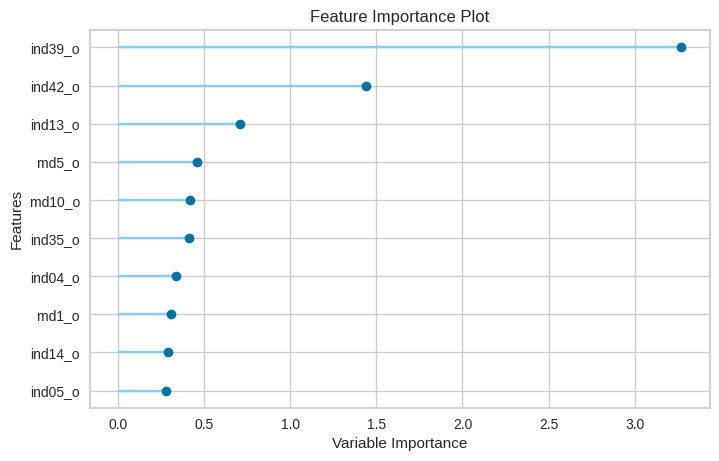

In [ ]:
plot_model(estimator = tuned_rid, plot = 'feature')

In [ ]:
cat = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7710,0.7476,0.1356,0.5000,0.2133,0.1282,0.1660
1,0.7710,0.7295,0.1412,0.5000,0.2203,0.1328,0.1696
2,0.7684,0.7483,0.1299,0.4792,0.2044,0.1183,0.1532
3,0.7966,0.7561,0.1818,0.7111,0.2896,0.2169,0.2865
4,0.7850,0.7689,0.1648,0.6042,0.2589,0.1787,0.2309
5,0.7785,0.7355,0.1307,0.5610,0.2120,0.1377,0.1880
6,0.7785,0.7323,0.1751,0.5536,0.2661,0.1752,0.2158
7,0.7733,0.7223,0.1073,0.5278,0.1784,0.1094,0.1570
8,0.7772,0.7451,0.1412,0.5556,0.2252,0.1458,0.1931
9,0.7707,0.7278,0.1299,0.5000,0.2063,0.1234,0.1621


In [ ]:
cat.get_params

In [ ]:
tuned_cat = tune_model(cat)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7749,0.7360,0.0678,0.5714,0.1212,0.0763,0.1362
1,0.7723,0.7292,0.0282,0.5556,0.0538,0.0323,0.0844
2,0.7684,0.7182,0.0452,0.4444,0.0821,0.0415,0.0792
3,0.7824,0.7584,0.0682,0.7500,0.1250,0.0904,0.1810
4,0.7746,0.7570,0.0511,0.5625,0.0938,0.0580,0.1160
5,0.7798,0.7149,0.0511,0.7500,0.0957,0.0686,0.1564
6,0.7811,0.7069,0.0734,0.7222,0.1333,0.0950,0.1812
7,0.7811,0.7071,0.0734,0.7222,0.1333,0.0950,0.1812
8,0.7798,0.7228,0.0791,0.6667,0.1414,0.0975,0.1740
9,0.7707,0.7302,0.0395,0.5000,0.0733,0.0411,0.0875


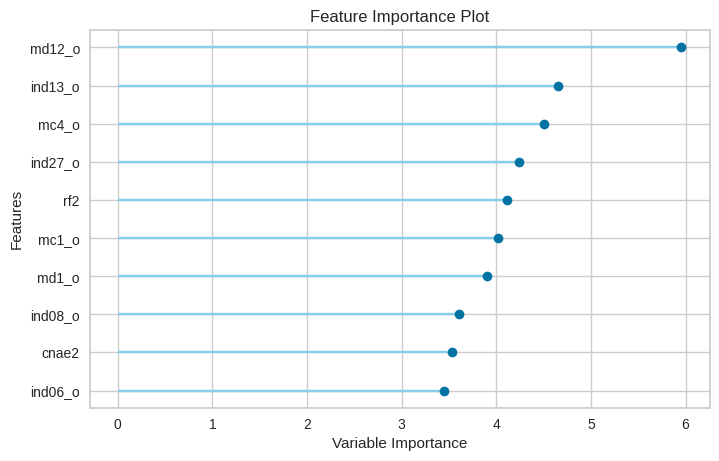

In [ ]:
plot_model(estimator = tuned_cat, plot = 'feature')

###REDE NEURAL

In [ ]:
df_rec_trei_antes_t.head()

,id,cnae2,rf2,target,md1_o,md2_o,md3_o,md4_o,md5_o,md6_o,md7_o,md8_o,md9_o,md10_o,md11_o,md12_o,mc1_o,mc2_o,mc3_o,mc4_o,ind01_o,ind02_o,ind03_o,ind04_o,ind05_o,ind06_o,ind07_o,ind08_o,ind09_o,ind10_o,ind11_o,ind12_o,ind13_o,ind14_o,ind15_o,ind16_o,ind17_o,ind18_o,ind19_o,ind20_o,ind21_o,ind22_o,ind23_o,ind24_o,ind25_o,ind26_o,ind27_o,ind28_o,ind29_o,ind30_o,ind31_o,ind32_o,ind33_o,ind34_o,ind35_o,ind36_o,ind37_o,ind38_o,ind39_o,ind40_o,ind41_o,ind42_o,ind43_o
0,-1.730870,1.654273,0.338212,1,0.011670,0.011256,0.111095,0.003233,0.003233,0.0,0.016366,0.021082,0.004541,0.004541,0.0,0.130930,0.002267,0.001607,0.000138,0.001772,0.0,0.0281,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0000,0.00,0.00,0.0000,0.0000,0.097600,0.0333,0.1000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,-1.730582,-1.765493,-1.033283,0,0.005996,0.019476,0.124770,0.000000,0.009200,0.0,0.029214,0.046445,0.000000,0.011375,0.0,0.134558,0.003186,0.001607,0.002602,0.001772,0.0,0.0000,1.0,0.4167,0.4194,0.7068,0.0076,0.0076,0.0,0.0,0.0,0.140845,0.0286,0.0,0.0,0.0,0.0,0.0,0.0,0.7625,1.00,1.00,0.1429,0.2857,0.000000,0.4444,0.2222,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.911266,1.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,-1.730293,1.050785,-1.033283,0,0.000006,0.002902,0.110160,0.002274,0.002274,0.0,0.002902,0.020058,0.003131,0.003131,0.0,0.130405,0.000015,0.000000,0.000050,0.000209,0.0,0.0000,1.0,1.0000,1.0000,1.0000,0.0000,0.0000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,1.0000,1.00,1.00,1.0000,1.0000,0.000000,1.0000,1.0000,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,-1.730005,-0.206482,1.709708,0,0.000009,0.014526,0.120351,0.000000,0.000000,0.0,0.014526,0.032017,0.000000,0.000000,0.0,0.134558,0.000438,0.000000,0.000042,0.000115,0.0,0.0000,0.0,0.0000,0.0000,0.0000,0.2309,0.2309,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,1.0000,0.25,0.25,0.9167,0.9167,0.094443,0.1667,0.1667,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.0,1.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
4,-1.729717,-0.307064,0.338212,0,0.000191,0.004042,0.111078,0.001121,0.001121,0.0,0.006063,0.023705,0.011886,0.011886,0.0,0.131285,0.001925,0.001607,0.002602,0.000719,0.0,0.0000,0.0,0.0000,0.0000,0.0000,1.0000,1.0000,0.0,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.00,0.00,0.0000,0.0000,0.000000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,0.0,0.0,0.0,0.126892,0.0,0.0,0.161425,0.085969


In [ ]:
df_ind01 = df_rec_trei_antes_t['ind01_o'].value_counts()
df_ind01

0.000000    9761
0.106393    1272
Name: ind01_o, dtype: int64

In [ ]:
df_rec_trei_antes_t['ind01_o'].value_counts()/df_rec_trei_antes_t.shape[0] 

0.000000    0.88471
0.106393    0.11529
Name: ind01_o, dtype: float64

In [ ]:
l_lista_num =['md1_o', 'md2_o', 'md3_o', 'md4_o',
                                'md5_o', 'md6_o', 'md7_o', 'md8_o', 'md9_o', 'md10_o', 'md11_o',
                                'md12_o', 'mc1_o', 'mc2_o', 'mc3_o', 'mc4_o', 'ind01_o', 'ind02_o',
                                'ind03_o', 'ind04_o', 'ind05_o', 'ind06_o', 'ind07_o', 'ind08_o',
                                'ind09_o', 'ind10_o', 'ind11_o', 'ind12_o', 'ind13_o', 'ind14_o',
                                'ind15_o', 'ind16_o', 'ind17_o', 'ind18_o', 'ind19_o', 'ind20_o',
                                'ind21_o', 'ind22_o', 'ind23_o', 'ind24_o', 'ind25_o', 'ind26_o',
                                'ind27_o', 'ind28_o', 'ind29_o', 'ind30_o', 'ind31_o', 'ind32_o',
                                'ind33_o', 'ind34_o', 'ind35_o', 'ind36_o', 'ind37_o', 'ind38_o',
                                'ind39_o', 'ind40_o', 'ind41_o', 'ind42_o', 'ind43_o']


In [ ]:
for j in l_lista_num:
    print(f'++++++')
    print(f'coluna: {j}')
    print(df_rec_trei_antes_t[j].value_counts()/df_rec_trei_antes_t.shape[0] )


++++++
coluna: md1_o
1.166952e-02    0.150276
0.000000e+00    0.123448
2.162232e-09    0.003082
4.324465e-09    0.002175
8.648929e-09    0.001631
                  ...   
1.262744e-06    0.000091
6.478878e-03    0.000091
1.540067e-03    0.000091
5.559177e-03    0.000091
4.480383e-04    0.000091
Name: md1_o, Length: 7172, dtype: float64
++++++
coluna: md2_o
0.012928    0.107043
0.015110    0.000725
0.001655    0.000634
0.001986    0.000544
0.004966    0.000544
              ...   
0.001081    0.000091
0.022229    0.000091
0.006621    0.000091
0.004853    0.000091
0.012397    0.000091
Name: md2_o, Length: 9789, dtype: float64
++++++
coluna: md3_o
0.118267    0.109399
0.108862    0.001450
0.120872    0.000725
0.111818    0.000544
0.109971    0.000363
              ...   
0.109895    0.000091
0.113298    0.000091
0.127316    0.000091
0.113301    0.000091
0.121783    0.000091
Name: md3_o, Length: 9762, dtype: float64
++++++
coluna: md4_o
0.000000e+00    0.250884
1.395764e-02    0.121273
1.5

In [ ]:
df_rec_excluir = df_rec_trei_antes_t.copy()

In [ ]:
l_lista_num =['md1_o', 'md2_o', 'md3_o', 'md4_o',
                                'md5_o', 'md6_o', 'md7_o', 'md8_o', 'md9_o', 'md10_o', 'md11_o',
                                'md12_o', 'mc1_o', 'mc2_o', 'mc3_o', 'mc4_o', 'ind01_o', 'ind02_o',
                                'ind03_o', 'ind04_o', 'ind05_o', 'ind06_o', 'ind07_o', 'ind08_o',
                                'ind09_o', 'ind10_o', 'ind11_o', 'ind12_o', 'ind13_o', 'ind14_o',
                                'ind15_o', 'ind16_o', 'ind17_o', 'ind18_o', 'ind19_o', 'ind20_o',
                                'ind21_o', 'ind22_o', 'ind23_o', 'ind24_o', 'ind25_o', 'ind26_o',
                                'ind27_o', 'ind28_o', 'ind29_o', 'ind30_o', 'ind31_o', 'ind32_o',
                                'ind33_o', 'ind34_o', 'ind35_o', 'ind36_o', 'ind37_o', 'ind38_o',
                                'ind39_o', 'ind40_o', 'ind41_o', 'ind42_o', 'ind43_o']


In [ ]:
df_rec_excluir.drop(columns=['ind09_o', 'ind10_o', 'ind11_o', 'ind14_o',
                                'ind15_o', 'ind16_o', 'ind17_o', 'ind18_o', 'ind28_o', 'ind29_o', 'ind33_o','ind35_o', 'ind40_o', 'ind41_o'], inplace= True)

In [ ]:
df_rec_excluir.drop(columns=['md11_o','mc2_o', 'ind01_o','ind39_o','ind43_o' ], inplace= True)

In [ ]:
df_rec_excluir.shape

(11033, 44)

In [ ]:
X_rec = df_rec_excluir.copy()
X_rec= X_rec.drop(columns= ['target'])
y_rec= df_rec_excluir['target'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X_rec, y_rec, test_size = 0.2, random_state = 20111974)
print(f'X: Treinamento=  {X_treinamento.shape}; X: Teste= {X_teste.shape}')

X: Treinamento=  (8826, 43); X: Teste= (2207, 43)


In [ ]:
print(f'Y: Treinamento=  {y_treinamento.shape}; Y: Teste= {y_teste.shape}')

Y: Treinamento=  (8826,); Y: Teste= (2207,)


In [ ]:
X_rec.shape[1]

43

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf

from tensorflow import keras

In [ ]:
np.set_printoptions(precision = 5)

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
# Número de Neurônios na Input Layer:
N_I = X_rec.shape[1]

# Número de neurônios na Output Layer:
N_O = 1

# Número de neurônios na Hidden Layer:
N_H = 128
N_H1 = 128
N_H2 = 128
N_H3 = 128
N_H4 = 128
N_H5 = 128
N_H6 = 128
N_H7 = 128

# Função de Ativação da Hidden Layer:
FA_H = tf.nn.swish

# Função de Ativação da Output Layer:
FA_O = tf.nn.swish

In [ ]:
#np.random.seed(20111974)
#tf.random.set_seed(20111974)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

RN = Sequential()
RN.add(Dense(units = N_H, input_dim = N_I, kernel_initializer = tf.keras.initializers.GlorotNormal(), activation = FA_H, kernel_constraint = tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(units = N_H1, input_dim = N_I, kernel_initializer = tf.keras.initializers.GlorotNormal(), activation = FA_H, kernel_constraint = tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(units = N_H2, kernel_initializer = tf.keras.initializers.GlorotNormal(), activation = FA_H, kernel_constraint = tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(units = N_H3, kernel_initializer = tf.keras.initializers.GlorotNormal(), activation = FA_H, kernel_constraint = tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(units = N_H4, kernel_initializer = tf.keras.initializers.GlorotNormal(), activation = FA_H, kernel_constraint = tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(units = N_H5, kernel_initializer = tf.keras.initializers.GlorotNormal(), activation = FA_H, kernel_constraint = tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(units = N_H6, kernel_initializer = tf.keras.initializers.GlorotNormal(), activation = FA_H, kernel_constraint = tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))
RN.add(Dense(units = N_H7, kernel_initializer = tf.keras.initializers.GlorotNormal(), activation = FA_H, kernel_constraint = tf.keras.constraints.UnitNorm()))
RN.add(Dropout(0.1))

RN.add(Dense(units = N_O, activation = FA_O))

# Resumo da arquitetura da Rede Neural
print(RN.summary())

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_77 (Dense)             (None, 128)               5632      
_________________________________________________________________
dropout_63 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_78 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_64 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_65 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_80 (Dense)             (None, 128)             

In [ ]:
algoritmo_otimizacao = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name= 'Adam')
loss_function = tf.keras.losses.BinaryCrossentropy()
metrica_performance = tf.keras.metrics.binary_accuracy

RN.compile(optimizer = algoritmo_otimizacao, loss = loss_function, metrics = metrica_performance)

In [ ]:
callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, min_delta = 0.001)]
RNA_processo = RN.fit(X_treinamento, y_treinamento, epochs = 1000, validation_data = (X_teste, y_teste), callbacks = callbacks)

Epoch 1/1000
276/276 [==============================] - 1s 5ms/step - loss: 2.5053 - binary_accuracy: 0.7632 - val_loss: 3.4526 - val_binary_accuracy: 0.7762
Epoch 2/1000
276/276 [==============================] - 1s 4ms/step - loss: 3.5408 - binary_accuracy: 0.7705 - val_loss: 3.4526 - val_binary_accuracy: 0.7762
Epoch 3/1000
276/276 [==============================] - 1s 4ms/step - loss: 3.5408 - binary_accuracy: 0.7705 - val_loss: 3.4526 - val_binary_accuracy: 0.7762
Epoch 4/1000
276/276 [==============================] - 1s 4ms/step - loss: 3.5408 - binary_accuracy: 0.7705 - val_loss: 3.4526 - val_binary_accuracy: 0.7762
Epoch 5/1000
276/276 [==============================] - 1s 4ms/step - loss: 3.5408 - binary_accuracy: 0.7705 - val_loss: 3.4526 - val_binary_accuracy: 0.7762
Epoch 6/1000
276/276 [==============================] - 1s 4ms/step - loss: 3.5408 - binary_accuracy: 0.7705 - val_loss: 3.4526 - val_binary_accuracy: 0.7762
Epoch 7/1000
276/276 [==============================

####ANALISE TESTE

In [ ]:
df_rec_test.columns

Index(['id', 'cnae2', 'rf2', 'md1', 'md2', 'md3', 'md4', 'md5', 'md6', 'md7',
       'md8', 'md9', 'md10', 'md11', 'md12', 'mc1', 'mc2', 'mc3', 'mc4',
       'ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20', 'ind21', 'ind22', 'ind23', 'ind24',
       'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32',
       'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40',
       'ind41', 'ind42', 'ind43'],
      dtype='object')

In [ ]:
l_rec_test_ind01_18 = ['ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18']
l_rec_test_ind21_43 =[ 'ind21', 'ind22', 'ind23', 'ind24',
       'ind25', 'ind26', 'ind27', 'ind28', 'ind29', 'ind30', 'ind31', 'ind32',
       'ind33', 'ind34', 'ind35', 'ind36', 'ind37', 'ind38', 'ind39', 'ind40',
       'ind41', 'ind42', 'ind43']

In [ ]:
df5_test = df_rec_test[['ind01', 'ind02', 'ind03', 'ind04', 'ind05', 'ind06', 'ind07', 'ind08',
       'ind09', 'ind10', 'ind11', 'ind12', 'ind13', 'ind14', 'ind15', 'ind16',
       'ind17', 'ind18', 'ind19', 'ind20']]

In [ ]:
l_rec_test_ind19_20 =['ind19', 'ind20']

In [ ]:
for i in l_rec_test_ind01_18:
    print(f'coluna: {i}')
    print(f'mode: {df_rec_test[i].mode()}')
    print(f'mediana: {df_rec_test[i].median()}')  
    print(f'+++++++++++')

coluna: ind01
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind02
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind03
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind04
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind05
mode: 0    0.0
dtype: float64
mediana: 0.021100000000000008
+++++++++++
coluna: ind06
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind07
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind08
mode: 0    0.0
dtype: float64
mediana: 0.019299999999999984
+++++++++++
coluna: ind09
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind10
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind11
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind12
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind13
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
coluna: ind14
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++


In [ ]:
#opção de substituir tudo pela moda dos ind01 a ind18

for i in l_rec_test_ind01_18:
    df_rec_test[i].fillna(0.0, inplace=True)

In [ ]:
#opção de substituir tudo pela moda dos ind01 a ind18

for i in l_rec_test_ind19_20:
    df_rec_test[i].fillna(1.0, inplace=True)

In [ ]:
for i in l_rec_test_ind21_43:
    print(f'indicador: {i}')
    print(f'mode: {df_rec_test[i].mode()}')
    print(f'mediana: {df_rec_test[i].median()}')  
    print(f'+++++++++++')

indicador: ind21
mode: 0    1.0
dtype: float64
mediana: 0.5
+++++++++++
indicador: ind22
mode: 0    1.0
dtype: float64
mediana: 0.5832999999999999
+++++++++++
indicador: ind23
mode: 0    0.0
dtype: float64
mediana: 0.08330000000000004
+++++++++++
indicador: ind24
mode: 0    0.0
dtype: float64
mediana: 0.08330000000000004
+++++++++++
indicador: ind25
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
indicador: ind26
mode: 0    1.0
dtype: float64
mediana: 0.5417000000000001
+++++++++++
indicador: ind27
mode: 0    1.0
dtype: float64
mediana: 0.5
+++++++++++
indicador: ind28
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
indicador: ind29
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
indicador: ind30
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
indicador: ind31
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
indicador: ind32
mode: 0    0.0
dtype: float64
mediana: 0.0
+++++++++++
indicador: ind33
mode: 0    1.0
dtype: float64
mediana: 1.0
+++++++++++
in